# Зависимость надоя и кормежки

In [1]:
import datetime
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
sns.set_theme(context='talk', style='whitegrid', palette='deep')
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['figure.titlesize'] = 32
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = 'true'
plt.rcParams['figure.frameon'] = 'false'
plt.rcParams['axes.spines.left'] = 'false'
plt.rcParams['axes.spines.right'] = 'false'
plt.rcParams['axes.spines.top'] = 'false'
plt.rcParams['legend.fancybox'] = 'false'
plt.rcParams['axes.spines.bottom'] = 'false'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
# для графиков, где надо много цветов, юзайте воть:
sns.set_palette(sns.color_palette('deep'))
# а по дефолту воть:
sns.set_palette(sns.color_palette('BuGn_r', n_colors=10)[2::3])
pd.set_option('display.max_columns', 60)

In [2]:
herd_metrics = pd.read_excel("datasets/Ekoniva_dataset.xlsx", sheet_name="Herd maintenance").replace("-", np.nan)
production_indicators = pd.read_excel("datasets/Ekoniva_dataset.xlsx", sheet_name="Dairy indicators").replace("-", np.nan)

F-statistic: 21.25097003237594
p-value: 9.497623767458321e-54


<Axes: xlabel='cluster_hdbscan', ylabel='weekly_milking_per_cow'>

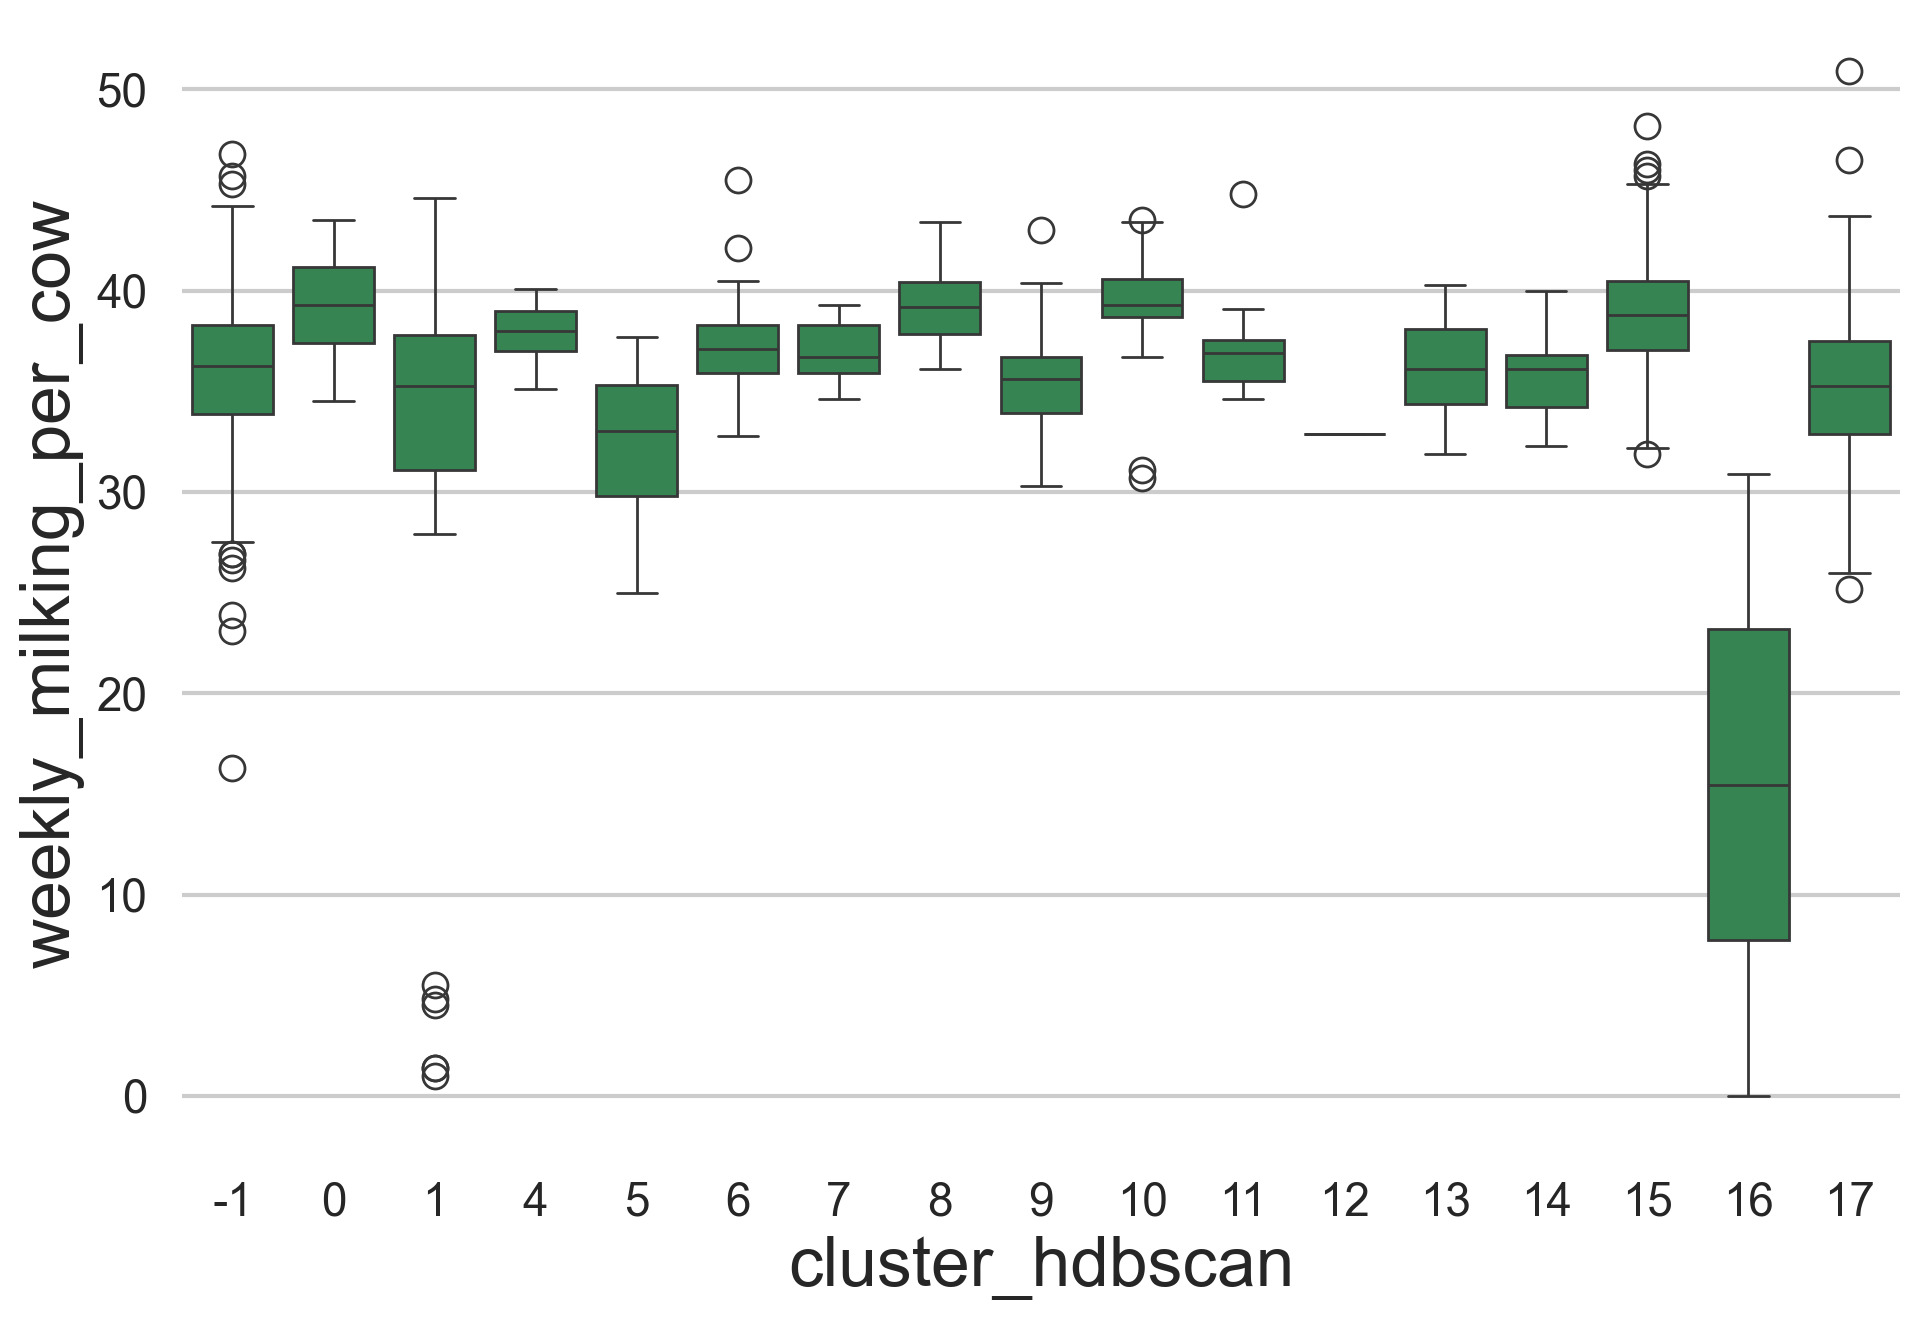

In [33]:
from scipy.stats import f_oneway

div_vectors = pd.read_csv("monthly_div_vectors.csv", index_col=0)
production_indicators["year_month"] = (production_indicators["date"]).dt.to_period('M').astype(str)
milking_feeding = pd.merge(production_indicators, div_vectors.rename(columns={"FarmName": "farm_name"}), on=["year_month", "farm_name"])
milking_feeding

groups = [
    g["weekly_milking_per_cow"].dropna().values
    for _, g in milking_feeding.groupby("cluster_hdbscan")
]

f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)

sns.boxplot(milking_feeding, x="cluster_hdbscan", y="weekly_milking_per_cow")

In [137]:
herd_metrics["year_month"] = (herd_metrics["date"] - pd.DateOffset(months=1)).dt.to_period('M').astype(str)
herd_metrics

date   region             prod_farm_name farm_type  \
0    2020-01-01  Воронеж                 ЭНА Восток        ЖК   
1    2020-01-01  Воронеж                 ЭНА Восток        ЖК   
2    2020-01-01  Воронеж                 ЭНА Восток        ЖК   
3    2020-01-01  Воронеж                 ЭНА Восток        ЖК   
4    2020-01-01  Воронеж                 ЭНА Восток       МТФ   
...         ...      ...                        ...       ...   
4296 2025-07-01   Сибирь   Сибирская Нива Маслянино        ЖК   
4297 2025-07-01   Сибирь   Сибирская Нива Маслянино        ЖК   
4298 2025-07-01   Сибирь   Сибирская Нива Маслянино        РМ   
4299 2025-07-01   Сибирь  Сибирская Нива Черепаново        ЖК   
4300 2025-07-01   Сибирь                   ЭН Алтай        ЖК   

              farm_name  ls_capacity  ls_occupancy  forage_cow  milk_cow  \
0             ЖК Бобров       2800.0     95.535714      2675.0    2329.0   
1           ЖК Бобров-2       2800.0    101.678571      2847.0    2378.0   
2     ЖК Верхний Икорец       2800.0    101.071429      2830.0    2363.0   
3      ЖК Петропавловка       2800.0     59.321429      1661.0    1632.0   
4      МТФ Владимировка        467.0     37.473233       175.0     175.0   
...                 ...          ...           ...         ...       ...   
4296          ЖК Елбань       6200.0     95.000000      5882.0    5468.0   
4297        ЖК Пеньково       4700.0     99.000000      4666.0    4172.0   
4298        РМ Пеньково          NaN           NaN         NaN       NaN   
4299   ЖК Огнева Заимка       3550.0    100.000000      3544.0    3141.0   
4300       ЖК Курочкино       3550.0     97.000000      3429.0    3189.0   

      dry_cow  milk_marketab_prc  forcow_milk_yeild  forcow_milk_yeild_stand  \
0       346.0               94.0                NaN                      NaN   
1       469.0               96.0                NaN                      NaN   
2       467.0               96.0                NaN                      NaN   
3        29.0               99.0                NaN                      NaN   
4         0.0               96.0                NaN                      NaN   
...       ...                ...                ...                      ...   
4296    414.0               98.0              32.20                     33.9   
4297    494.0               95.0              30.11                     31.8   
4298      NaN                NaN                NaN                      NaN   
4299    403.0               94.0              34.95                     36.0   
4300    240.0               98.0              36.40                     37.3   

      milk_fat  milk_protein  somatic_cells  bac_contam  cow_retired  \
0          NaN           NaN           92.0       41.00         52.0   
1          NaN           NaN           90.0       29.00         30.0   
2          NaN           NaN          161.0       72.00         52.0   
3          NaN           NaN           69.0        8.00         35.0   
4          NaN           NaN          259.0       58.00         17.0   
...        ...           ...            ...         ...          ...   
4296       3.9           3.4          102.5       39.36        526.0   
4297       3.9           3.4          114.0       46.00        189.0   
4298       NaN           NaN            NaN         NaN          NaN   
4299       3.8           3.3           91.0       38.00        115.0   
4300       3.7           3.4           75.0       30.00         76.0   

      cow_lame cow_mastits  calves  cow_metrit  ph_urine_avr year_month  
0         90.0          57     NaN         NaN           NaN    2019-12  
1         44.0          27     NaN         NaN           NaN    2019-12  
2         57.0          77     NaN         NaN           NaN    2019-12  
3        120.0          26     NaN         NaN           NaN    2019-12  
4          2.0          10     NaN         NaN           NaN    2019-12  
...        ...         ...     ...         ... 

In [10]:
herd_metrics = pd.read_excel("datasets/Ekoniva_dataset.xlsx", sheet_name="Herd maintenance").replace("-", np.nan)
herd_metrics["year_month"] = (herd_metrics["date"] - pd.DateOffset(months=1)).dt.to_period('M').astype(str)
herd_metrics

date   region             prod_farm_name farm_type  \
0    2020-01-01  Воронеж                 ЭНА Восток        ЖК   
1    2020-01-01  Воронеж                 ЭНА Восток        ЖК   
2    2020-01-01  Воронеж                 ЭНА Восток        ЖК   
3    2020-01-01  Воронеж                 ЭНА Восток        ЖК   
4    2020-01-01  Воронеж                 ЭНА Восток       МТФ   
...         ...      ...                        ...       ...   
4296 2025-07-01   Сибирь   Сибирская Нива Маслянино        ЖК   
4297 2025-07-01   Сибирь   Сибирская Нива Маслянино        ЖК   
4298 2025-07-01   Сибирь   Сибирская Нива Маслянино        РМ   
4299 2025-07-01   Сибирь  Сибирская Нива Черепаново        ЖК   
4300 2025-07-01   Сибирь                   ЭН Алтай        ЖК   

              farm_name  ls_capacity  ls_occupancy  forage_cow  milk_cow  \
0             ЖК Бобров       2800.0     95.535714      2675.0    2329.0   
1           ЖК Бобров-2       2800.0    101.678571      2847.0    2378.0   
2     ЖК Верхний Икорец       2800.0    101.071429      2830.0    2363.0   
3      ЖК Петропавловка       2800.0     59.321429      1661.0    1632.0   
4      МТФ Владимировка        467.0     37.473233       175.0     175.0   
...                 ...          ...           ...         ...       ...   
4296          ЖК Елбань       6200.0     95.000000      5882.0    5468.0   
4297        ЖК Пеньково       4700.0     99.000000      4666.0    4172.0   
4298        РМ Пеньково          NaN           NaN         NaN       NaN   
4299   ЖК Огнева Заимка       3550.0    100.000000      3544.0    3141.0   
4300       ЖК Курочкино       3550.0     97.000000      3429.0    3189.0   

      dry_cow  milk_marketab_prc  forcow_milk_yeild  forcow_milk_yeild_stand  \
0       346.0               94.0                NaN                      NaN   
1       469.0               96.0                NaN                      NaN   
2       467.0               96.0                NaN                      NaN   
3        29.0               99.0                NaN                      NaN   
4         0.0               96.0                NaN                      NaN   
...       ...                ...                ...                      ...   
4296    414.0               98.0              32.20                     33.9   
4297    494.0               95.0              30.11                     31.8   
4298      NaN                NaN                NaN                      NaN   
4299    403.0               94.0              34.95                     36.0   
4300    240.0               98.0              36.40                     37.3   

      milk_fat  milk_protein  somatic_cells  bac_contam  cow_retired  \
0          NaN           NaN           92.0       41.00         52.0   
1          NaN           NaN           90.0       29.00         30.0   
2          NaN           NaN          161.0       72.00         52.0   
3          NaN           NaN           69.0        8.00         35.0   
4          NaN           NaN          259.0       58.00         17.0   
...        ...           ...            ...         ...          ...   
4296       3.9           3.4          102.5       39.36        526.0   
4297       3.9           3.4          114.0       46.00        189.0   
4298       NaN           NaN            NaN         NaN          NaN   
4299       3.8           3.3           91.0       38.00        115.0   
4300       3.7           3.4           75.0       30.00         76.0   

      cow_lame cow_mastits  calves  cow_metrit  ph_urine_avr year_month  
0         90.0          57     NaN         NaN           NaN    2019-12  
1         44.0          27     NaN         NaN           NaN    2019-12  
2         57.0          77     NaN         NaN           NaN    2019-12  
3        120.0          26     NaN         NaN           NaN    2019-12  
4          2.0          10     NaN         NaN           NaN    2019-12  
...        ...         ...     ...         ... 

In [ ]:

mont

FarmName  additive  byproduct    energy       fat  \
year_month                                                               
2022-01            ЖК Добрино  0.690146   0.000000  3.049944  0.102566   
2022-01            ЖК Коршево  0.000000   0.000000  3.448251  0.131827   
2022-02           ЖК Бодеевка  1.028818   0.044332  3.784134  0.081540   
2022-02     ЖК Верхний Икорец  0.000000   0.000000  4.440503  0.091023   
2022-02            ЖК Высокое  0.028128   0.054202  6.048612  0.133000   
...                       ...       ...        ...       ...       ...   
2025-10           РМ Кольцово  0.053208   0.725853  0.752733  0.000000   
2025-10           РМ Пеньково  0.000000   1.234935  0.362325  0.000000   
2025-10             РМ Поляна  0.000000   0.855039  0.854804  0.000000   
2025-10           РМ Торопово  0.000000   0.915310  0.753350  0.000000   
2025-10              ЭФ Родня  0.000000   0.000000  0.000000  0.000000   

               forage  mineral_vit    premix  premix_blend   protein  \
year_month                                                             
2022-01     20.279771     0.106902  0.935654      2.225204  2.957036   
2022-01     19.288947     0.197169  0.130818      2.839590  3.595399   
2022-02     16.978726     0.055622  1.068799      2.294108  2.804451   
2022-02     23.210609     0.140188  1.132515      2.889317  3.384732   
2022-02     24.216540     0.311952  0.349712      2.647383  4.680028   
...               ...          ...       ...           ...       ...   
2025-10     14.754344     0.022402  0.198021      1.834785  1.264398   
2025-10     11.158143     0.000000  0.171187      1.885980  0.889811   
2025-10     12.758559     0.000000  0.177924      2.398640  1.194372   
2025-10     22.149921     0.000000  0.204942      0.000000  1.399994   
2025-10     36.854161     0.334250  0.000000      0.000000  2.766224   

               water  dist_to_center_euclid  dist_to_center_manhattan  \
year_month                                                              
2022-01     3.093953               6.341987                  9.642435   
2022-01     8.470061               2.648598                  6.736866   
2022-02     4.094209               9.629220                 12.789652   
2022-02     7.793154               2.091716                  4.847044   
2022-02     9.218110               3.614517                  8.058023   
...              ...                    ...                       ...   
2025-10     4.775724               2.676532                  6.478563   
2025-10     6.414120               3.556504                  9.048446   
2025-10     0.000000               3.602458                  9.012252   
2025-10     0.000000               3.306698                  8.601691   
2025-10     6.000000               3.885565                 10.116611   

                pca1      pca2  pca_drift  cluster_kmeans  cluster_hdbscan  \
year_month                                                                   
2022-01     2.231174  0.249549        NaN               6               -1   
2022-01     0.285326  0.548915        NaN               9               -1   
2022-02     3.000701  0.645958        NaN               6               -1   
2022-02     0.235235  0.608326        NaN               2               -1   
2022-02     1.677584  1.426259        NaN               9               -1   
...              ...       ...        ...             ...              ...   
2025-10    -1.740998 -1.385301   0.054939               1               12   
2025-10    -2.400896 -1.531608   0.029521               1               12   
2025-10    -2.166189 -1.341760   0.060281               1                8   
2025-10    -1.249404 -2.267993   0.281206               1                6   
2025-10     0.941482 -1.849194   0.245539               7               -1   

            cluster_dbscan  
year_month                  
2022-01                 -1  
2022-01                 -1  
2022-02                 -1  
2022-02    

F-statistic: nan
p-value: nan


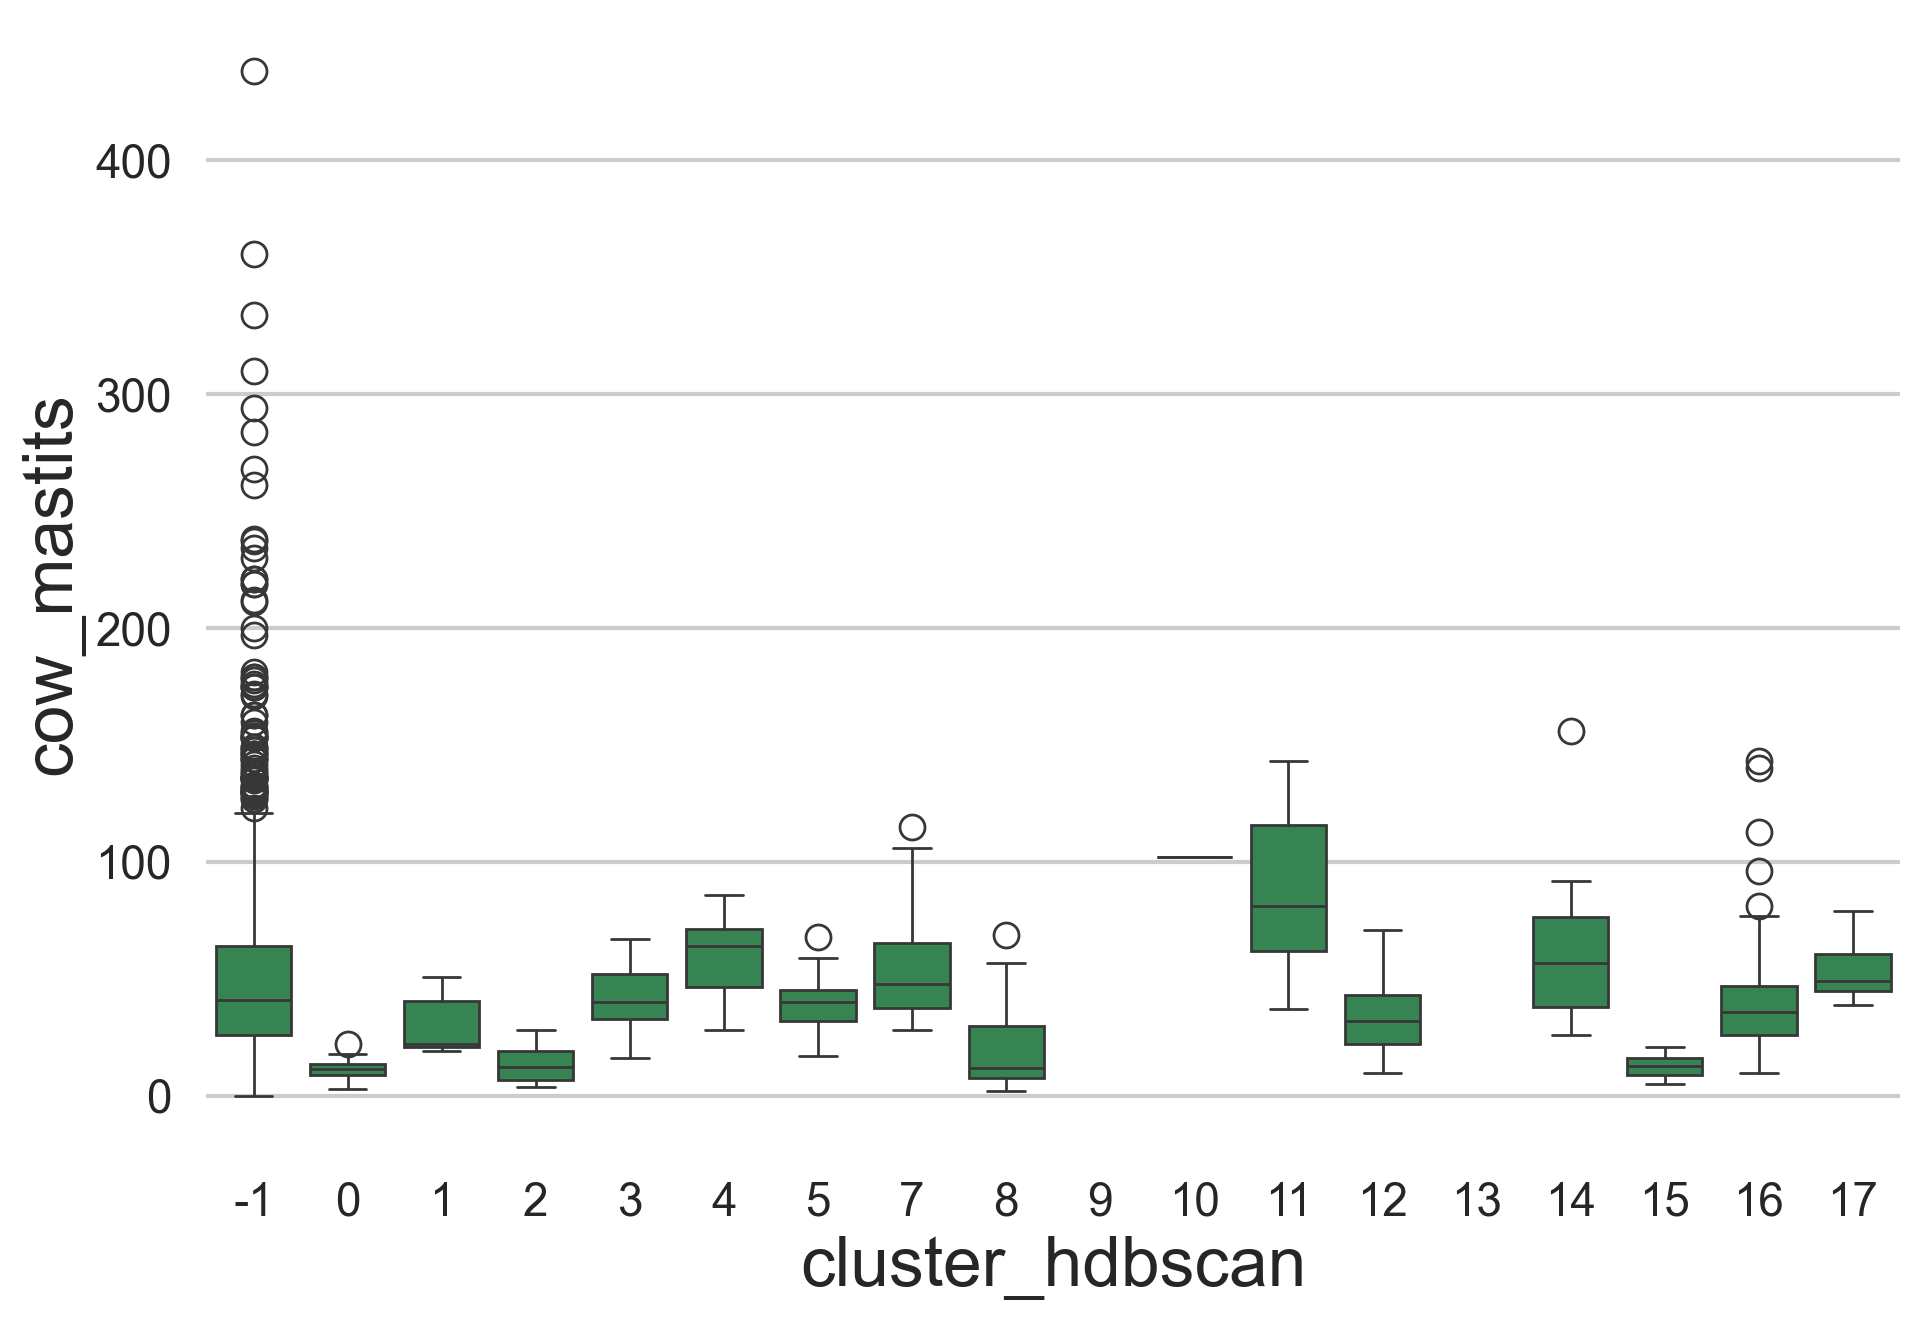

In [12]:
mont = pd.read_csv('monthly_vectors.csv', index_col=0)

herd_metrics.rename(columns={'farm_name': 'FarmName'}, inplace=True)
df = pd.merge(mont, herd_metrics, on=['year_month', 'FarmName'], how='inner')
df['cow_mastits'] = df["cow_mastits"].replace({"83-": "83"})
df['cow_mastits'] = pd.to_numeric(df['cow_mastits'], errors='coerce')
sns.boxplot(df, x="cluster_hdbscan", y="cow_mastits")
groups = [
    g["cow_mastits"].dropna().values
    for _, g in df.groupby("cluster_hdbscan")
]

f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)

In [ ]:
herd_metrics


date   region             prod_farm_name farm_type  \
0    2020-01-01  Воронеж                 ЭНА Восток        ЖК   
1    2020-01-01  Воронеж                 ЭНА Восток        ЖК   
2    2020-01-01  Воронеж                 ЭНА Восток        ЖК   
3    2020-01-01  Воронеж                 ЭНА Восток        ЖК   
4    2020-01-01  Воронеж                 ЭНА Восток       МТФ   
...         ...      ...                        ...       ...   
4296 2025-07-01   Сибирь   Сибирская Нива Маслянино        ЖК   
4297 2025-07-01   Сибирь   Сибирская Нива Маслянино        ЖК   
4298 2025-07-01   Сибирь   Сибирская Нива Маслянино        РМ   
4299 2025-07-01   Сибирь  Сибирская Нива Черепаново        ЖК   
4300 2025-07-01   Сибирь                   ЭН Алтай        ЖК   

               FarmName  ls_capacity  ls_occupancy  forage_cow  milk_cow  \
0             ЖК Бобров       2800.0     95.535714      2675.0    2329.0   
1           ЖК Бобров-2       2800.0    101.678571      2847.0    2378.0   
2     ЖК Верхний Икорец       2800.0    101.071429      2830.0    2363.0   
3      ЖК Петропавловка       2800.0     59.321429      1661.0    1632.0   
4      МТФ Владимировка        467.0     37.473233       175.0     175.0   
...                 ...          ...           ...         ...       ...   
4296          ЖК Елбань       6200.0     95.000000      5882.0    5468.0   
4297        ЖК Пеньково       4700.0     99.000000      4666.0    4172.0   
4298        РМ Пеньково          NaN           NaN         NaN       NaN   
4299   ЖК Огнева Заимка       3550.0    100.000000      3544.0    3141.0   
4300       ЖК Курочкино       3550.0     97.000000      3429.0    3189.0   

      dry_cow  milk_marketab_prc  forcow_milk_yeild  forcow_milk_yeild_stand  \
0       346.0               94.0                NaN                      NaN   
1       469.0               96.0                NaN                      NaN   
2       467.0               96.0                NaN                      NaN   
3        29.0               99.0                NaN                      NaN   
4         0.0               96.0                NaN                      NaN   
...       ...                ...                ...                      ...   
4296    414.0               98.0              32.20                     33.9   
4297    494.0               95.0              30.11                     31.8   
4298      NaN                NaN                NaN                      NaN   
4299    403.0               94.0              34.95                     36.0   
4300    240.0               98.0              36.40                     37.3   

      milk_fat  milk_protein  somatic_cells  bac_contam  cow_retired  \
0          NaN           NaN           92.0       41.00         52.0   
1          NaN           NaN           90.0       29.00         30.0   
2          NaN           NaN          161.0       72.00         52.0   
3          NaN           NaN           69.0        8.00         35.0   
4          NaN           NaN          259.0       58.00         17.0   
...        ...           ...            ...         ...          ...   
4296       3.9           3.4          102.5       39.36        526.0   
4297       3.9           3.4          114.0       46.00        189.0   
4298       NaN           NaN            NaN         NaN          NaN   
4299       3.8           3.3           91.0       38.00        115.0   
4300       3.7           3.4           75.0       30.00         76.0   

      cow_lame cow_mastits  calves  cow_metrit  ph_urine_avr year_month  
0         90.0          57     NaN         NaN           NaN    2019-12  
1         44.0          27     NaN         NaN           NaN    2019-12  
2         57.0          77     NaN         NaN           NaN    2019-12  
3        120.0          26     NaN         NaN           NaN    2019-12  
4          2.0          10     NaN         NaN           NaN    2019-12  
...        ...         ...     ...         ... 

In [ ]:
df["date"] = 

year_month           FarmName  additive  byproduct    energy       fat  \
0       2022-01         ЖК Добрино  0.690146   0.000000  3.049944  0.102566   
1       2022-01         ЖК Коршево  0.000000   0.000000  3.448251  0.131827   
2       2022-02        ЖК Бодеевка  1.028818   0.044332  3.784134  0.081540   
3       2022-02  ЖК Верхний Икорец  0.000000   0.000000  4.440503  0.091023   
4       2022-02         ЖК Высокое  0.028128   0.054202  6.048612  0.133000   
...         ...                ...       ...        ...       ...       ...   
1420    2025-06          МТФ Щучье  0.013447   0.000000  2.006511  0.000000   
1421    2025-06        РМ Кольцово  0.035985   1.055845  1.126633  0.000000   
1422    2025-06        РМ Пеньково  0.000000   4.126426  0.403649  0.000000   
1423    2025-06          РМ Поляна  0.000000   0.436810  1.086431  0.000000   
1424    2025-06        РМ Торопово  0.000000   0.000000  0.000000  0.000000   

         forage  mineral_vit    premix  premix_blend   protein     water  \
0     20.279771     0.106902  0.935654      2.225204  2.957036  3.093953   
1     19.288947     0.197169  0.130818      2.839590  3.595399  8.470061   
2     16.978726     0.055622  1.068799      2.294108  2.804451  4.094209   
3     23.210609     0.140188  1.132515      2.889317  3.384732  7.793154   
4     24.216540     0.311952  0.349712      2.647383  4.680028  9.218110   
...         ...          ...       ...           ...       ...       ...   
1420  21.579423     0.000000  0.727689      6.297963  1.767991  4.528192   
1421  13.758991     0.030981  0.183708      1.370990  2.303529  4.900036   
1422   9.777002     0.000000  0.173390      1.829527  0.710989  7.681399   
1423  14.225463     0.000000  0.166236      2.514286  1.179154  0.000000   
1424  19.541051     0.000000  0.202922      0.000000  1.578317  0.000000   

      dist_to_center_euclid  dist_to_center_manhattan      pca1      pca2  \
0                  6.341987                  9.642435  2.231174  0.249549   
1                  2.648598                  6.736866  0.285326  0.548915   
2                  9.629220                 12.789652  3.000701  0.645958   
3                  2.091716                  4.847044  0.235235  0.608326   
4                  3.614517                  8.058023  1.677584  1.426259   
...                     ...                       ...       ...       ...   
1420               2.978704                  6.823603 -1.693810  0.589713   
1421               2.523465                  5.906434 -1.493313 -0.922087   
1422               3.984168                  9.837620 -2.591662 -1.458185   
1423               3.426885                  8.748211 -2.044865 -1.309300   
1424               3.484412                  9.302603 -1.461009 -2.296641   

      pca_drift  cluster_kmeans  cluster_hdbscan  cluster_dbscan       date  \
0           NaN               6               -1              -1 2022-02-01   
1           NaN               9               -1              -1 2022-02-01   
2           NaN               6               -1              -1 2022-03-01   
3           NaN               2               -1               0 2022-03-01   
4           NaN               9               -1              -1 2022-03-01   
...         ...             ...              ...             ...        ...   
1420   0.117228               2               15               0 2025-07-01   
1421   0.187207               1               13               0 2025-07-01   
1422   0.110446               1               13               0 2025-07-01   
1423   0.110790               1               10               7 2025-07-01   
1424   0.048065               1                9               9 2025-07-01   

       region            prod_farm_name farm_type  ls_capacity  ls_occupancy  \
0     Воронеж           ЭНА Левый берег        ЖК       2800.0    105.857143   
1     Воронеж                 ЭНА Север        ЖК       2800.0    101.714286   
2     Воронеж           ЭНА Л

<Axes: xlabel='date', ylabel='cow_metrit'>

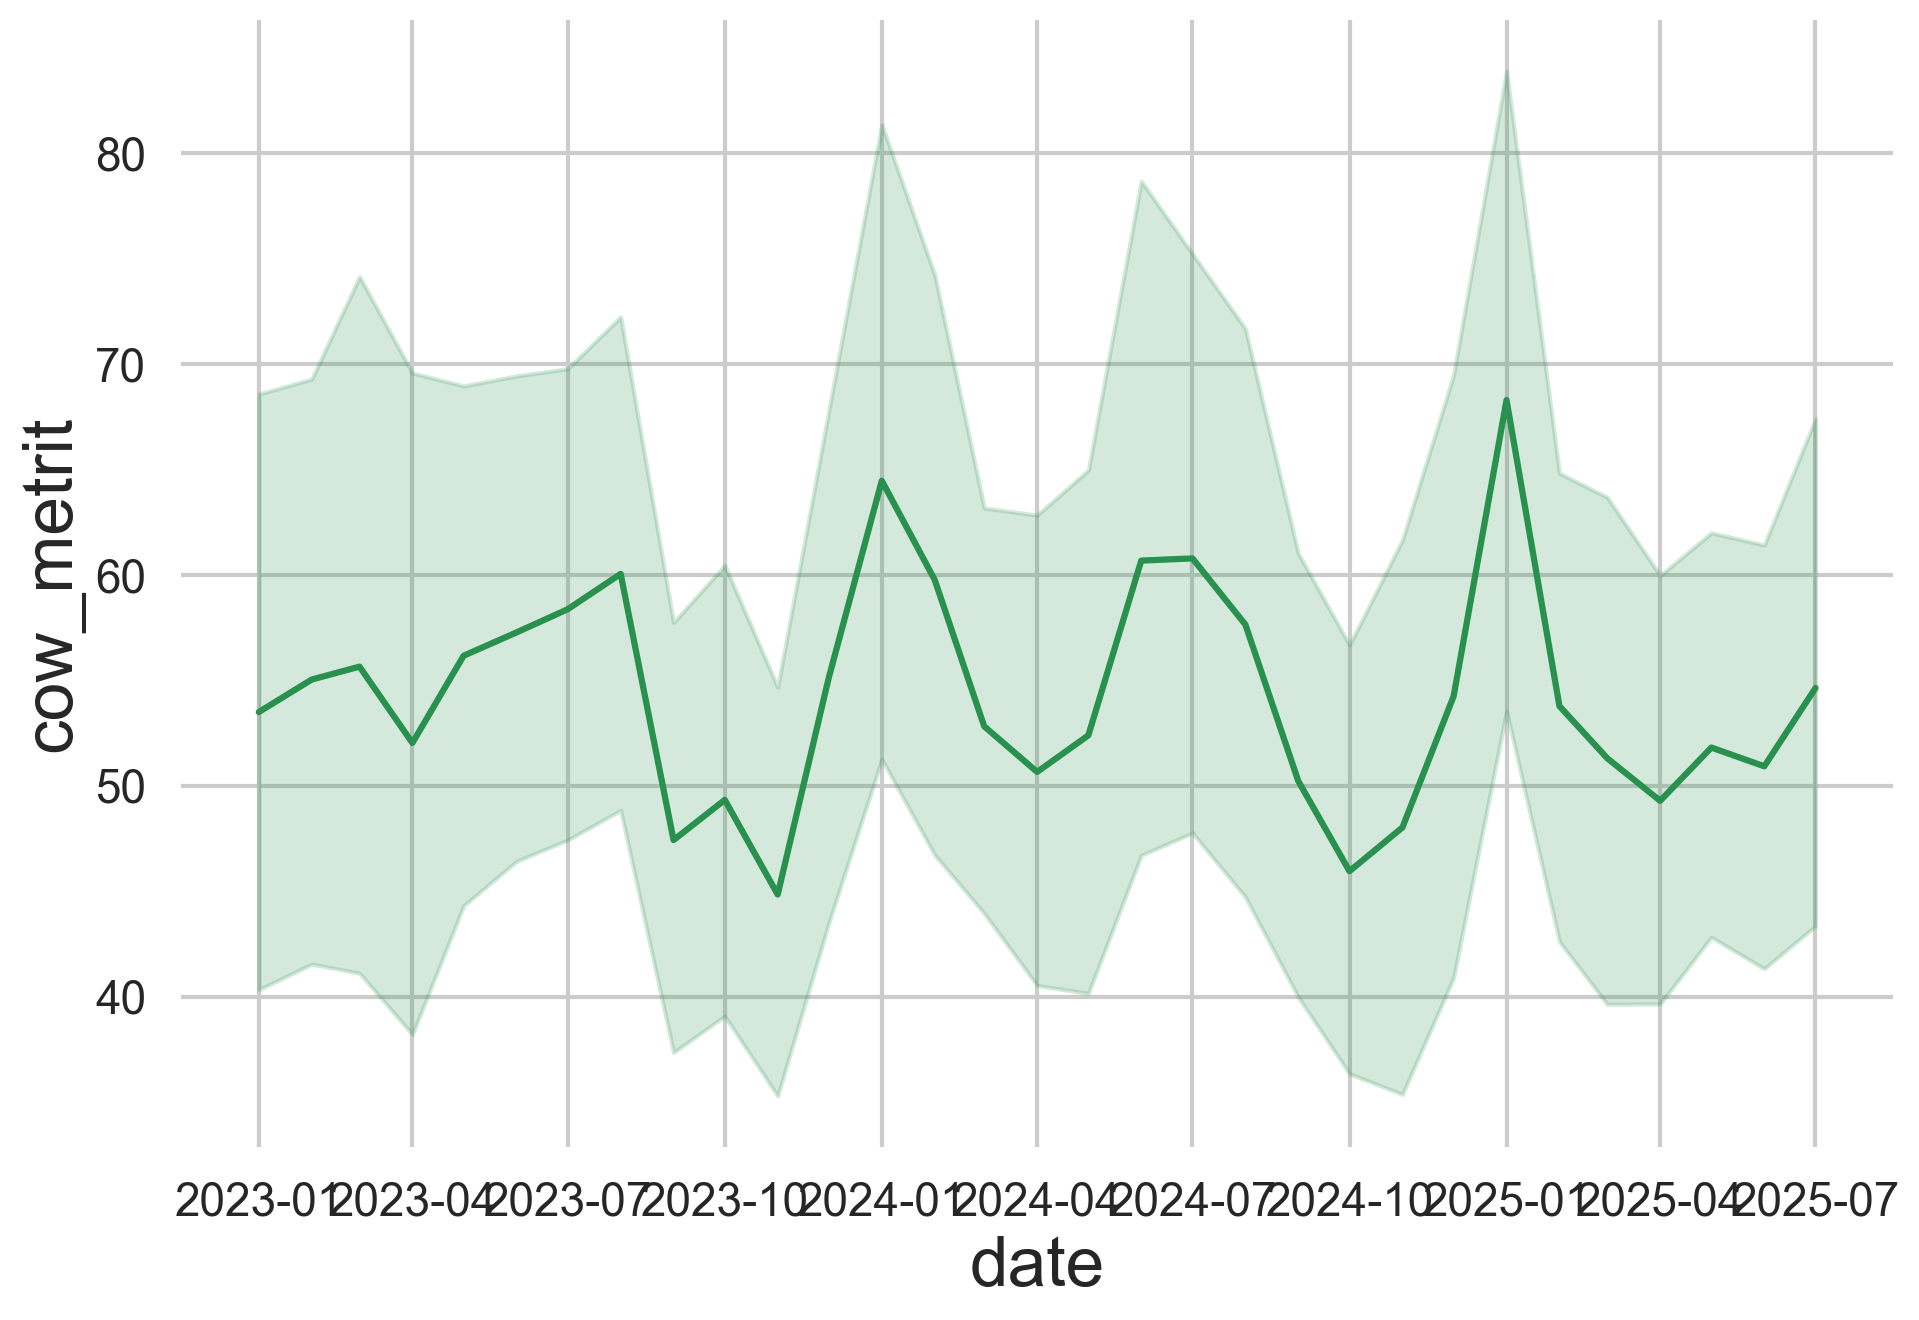

In [16]:
sns.lineplot(df, x="date", y="cow_metrit")

In [ ]:
g = sns.FacetGrid(df, col="FarmName", col_wrap=4, sharey=False, height=3)
g.map_dataframe(sns.lineplot, x="date", y="cow_metrit")
g.set_titles("{col_name}")
g.set_axis_labels("date", "cow_metrit")
plt.tight_layout()
plt.show()


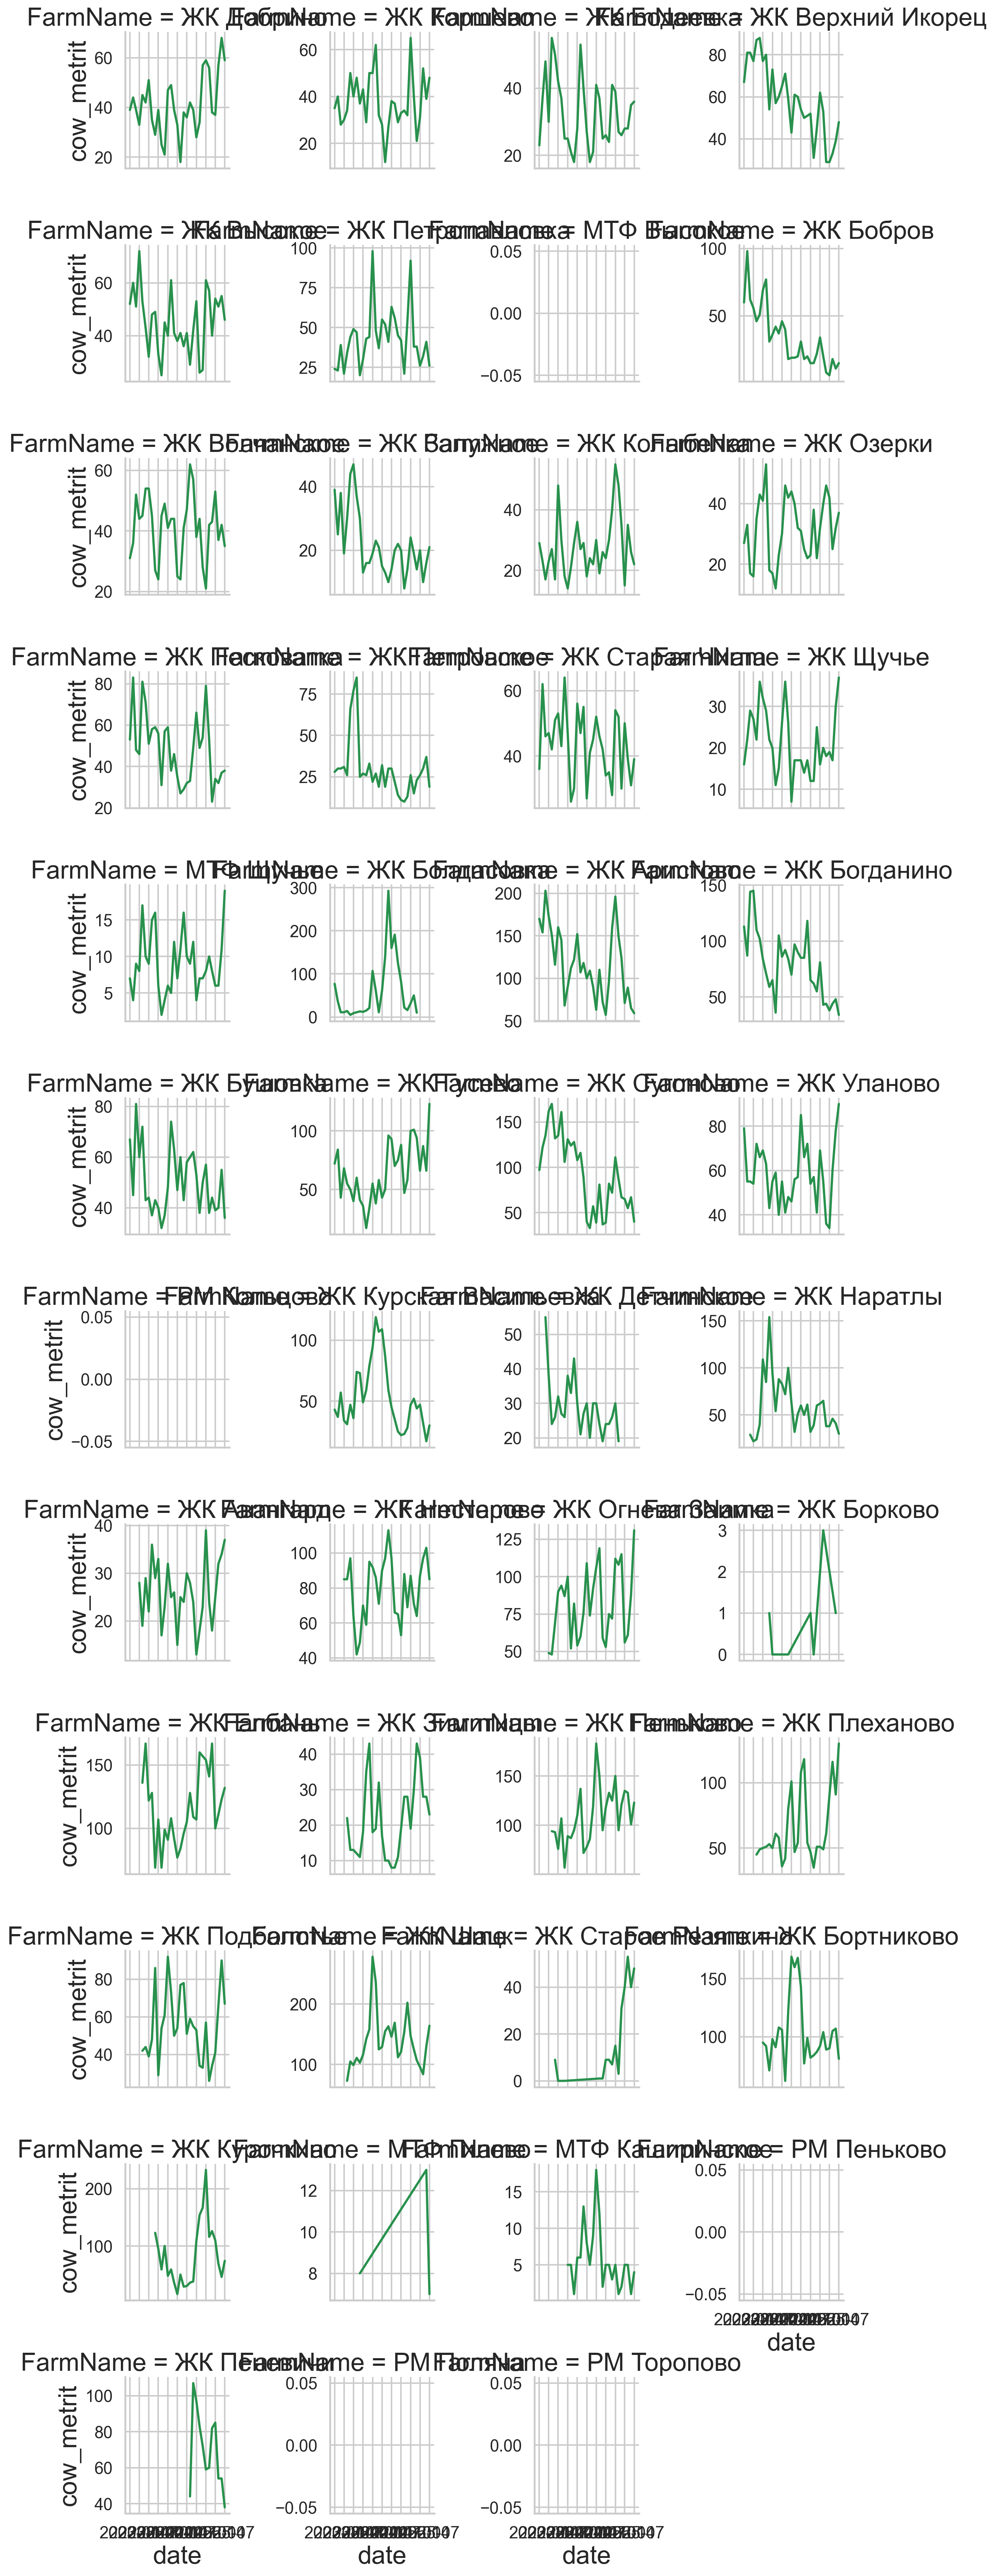

In [ ]:
g = sns.relplot(
    data=df,
    x="date",
    y="cow_metrit",
    col="FarmName",
    kind="line",
    col_wrap=4,
    height=3,
    facet_kws=dict(sharey=False)
)
plt.show()


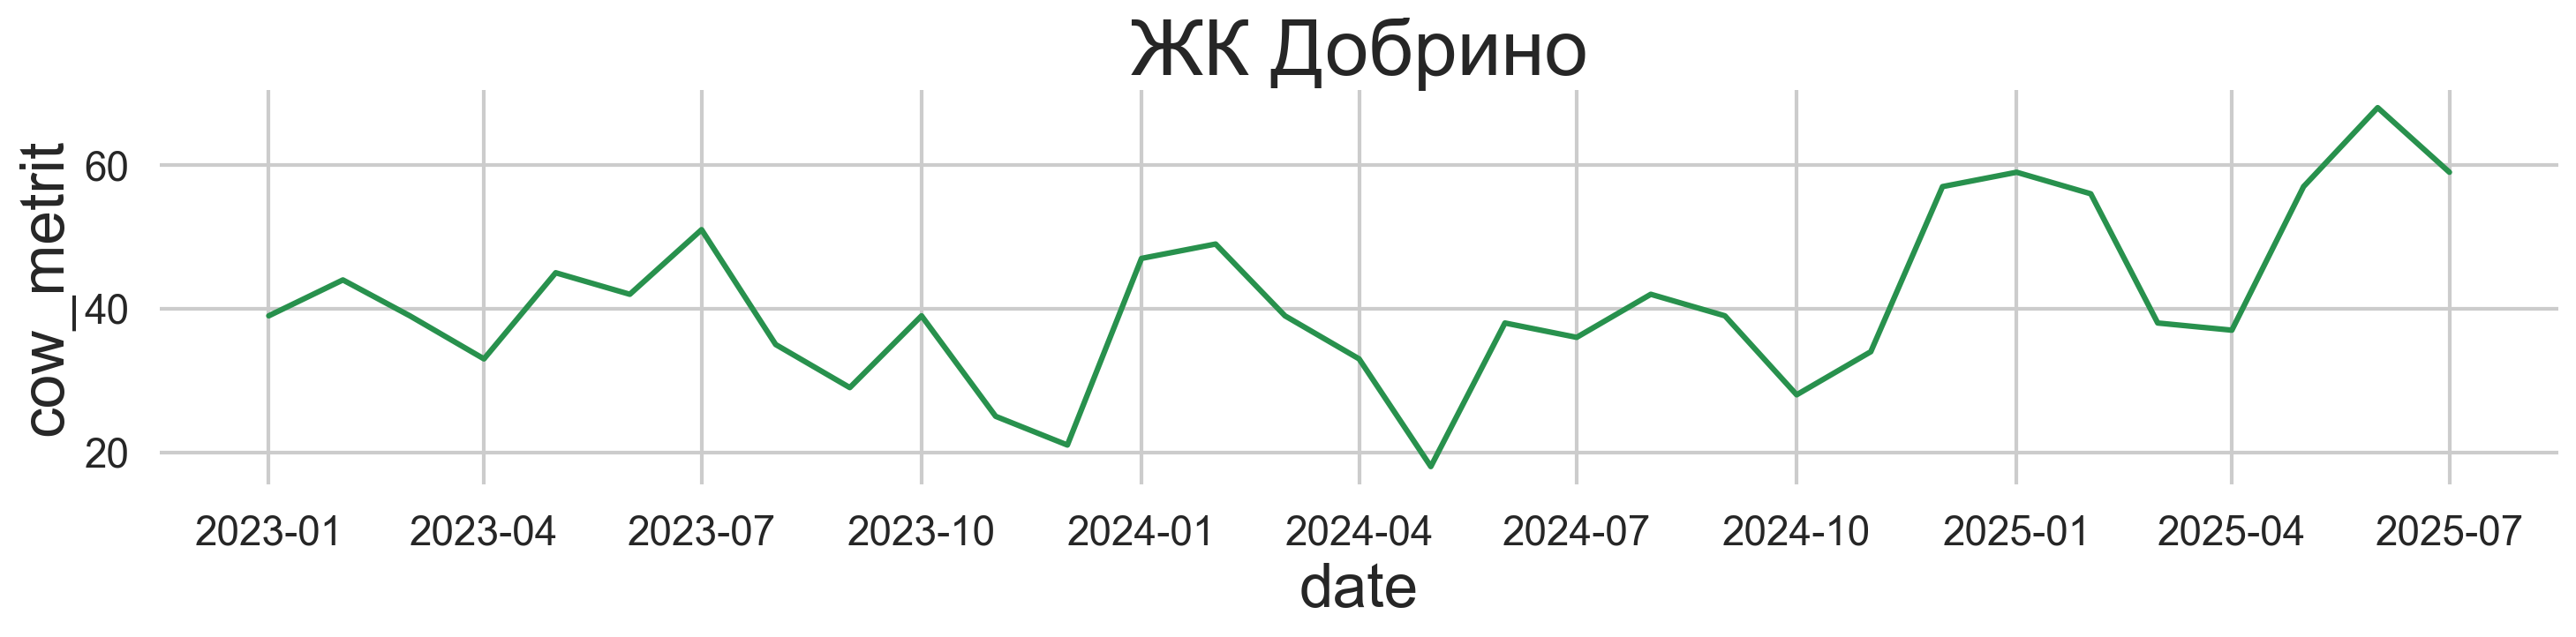

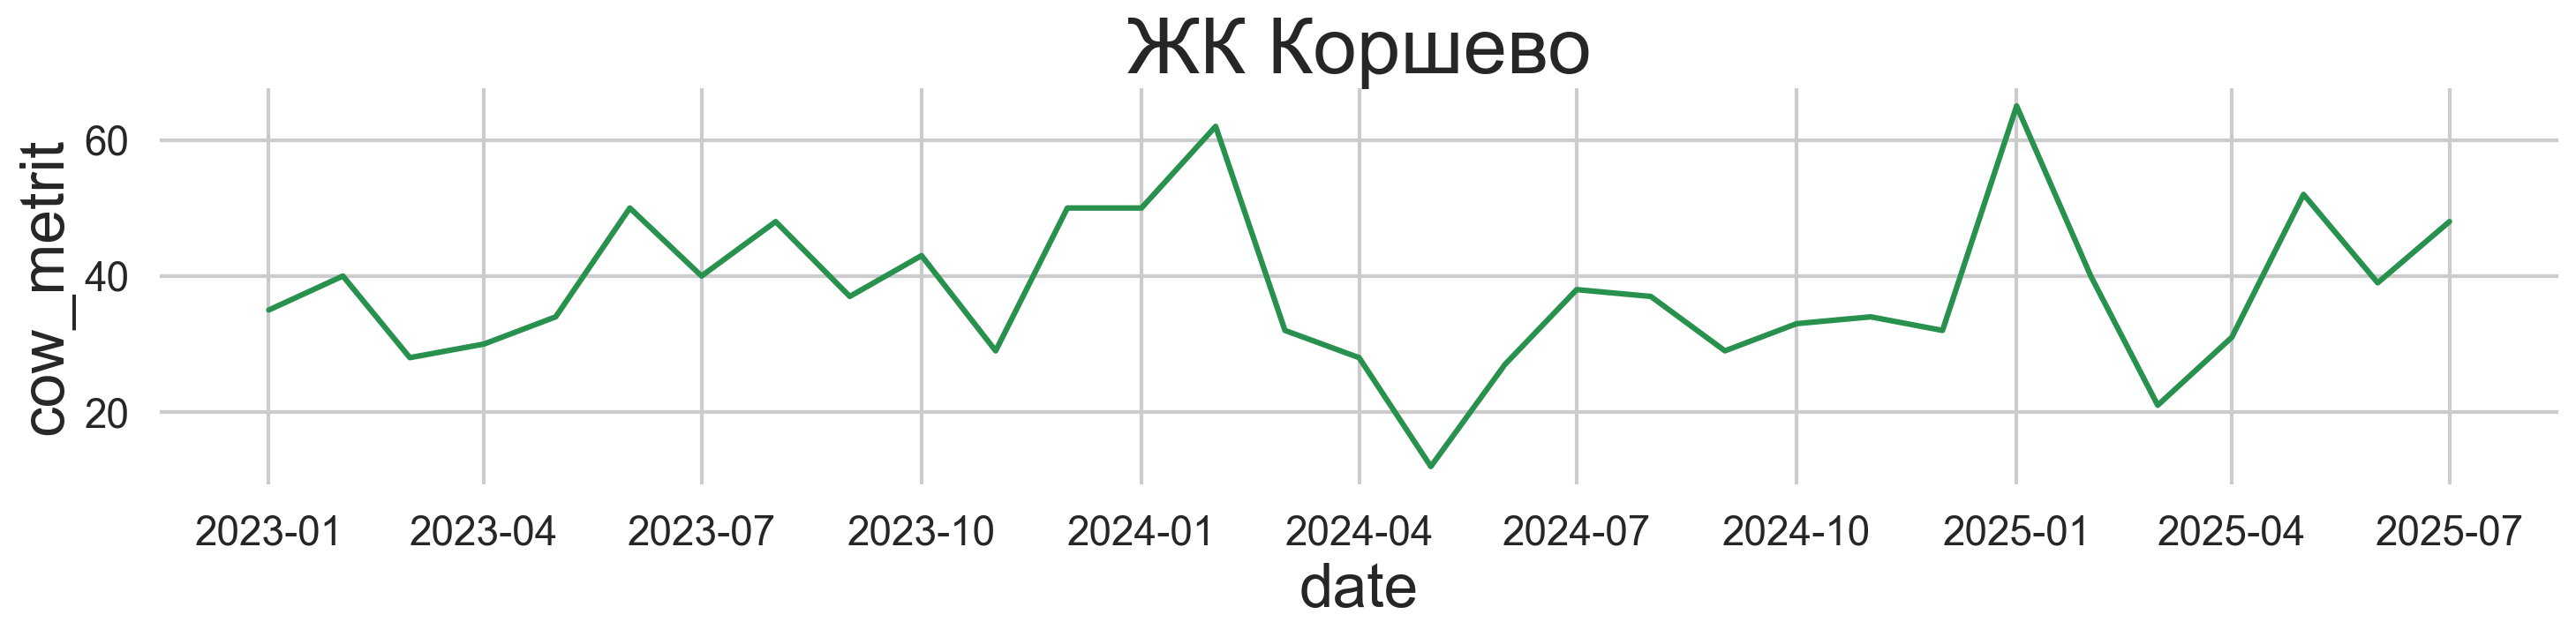

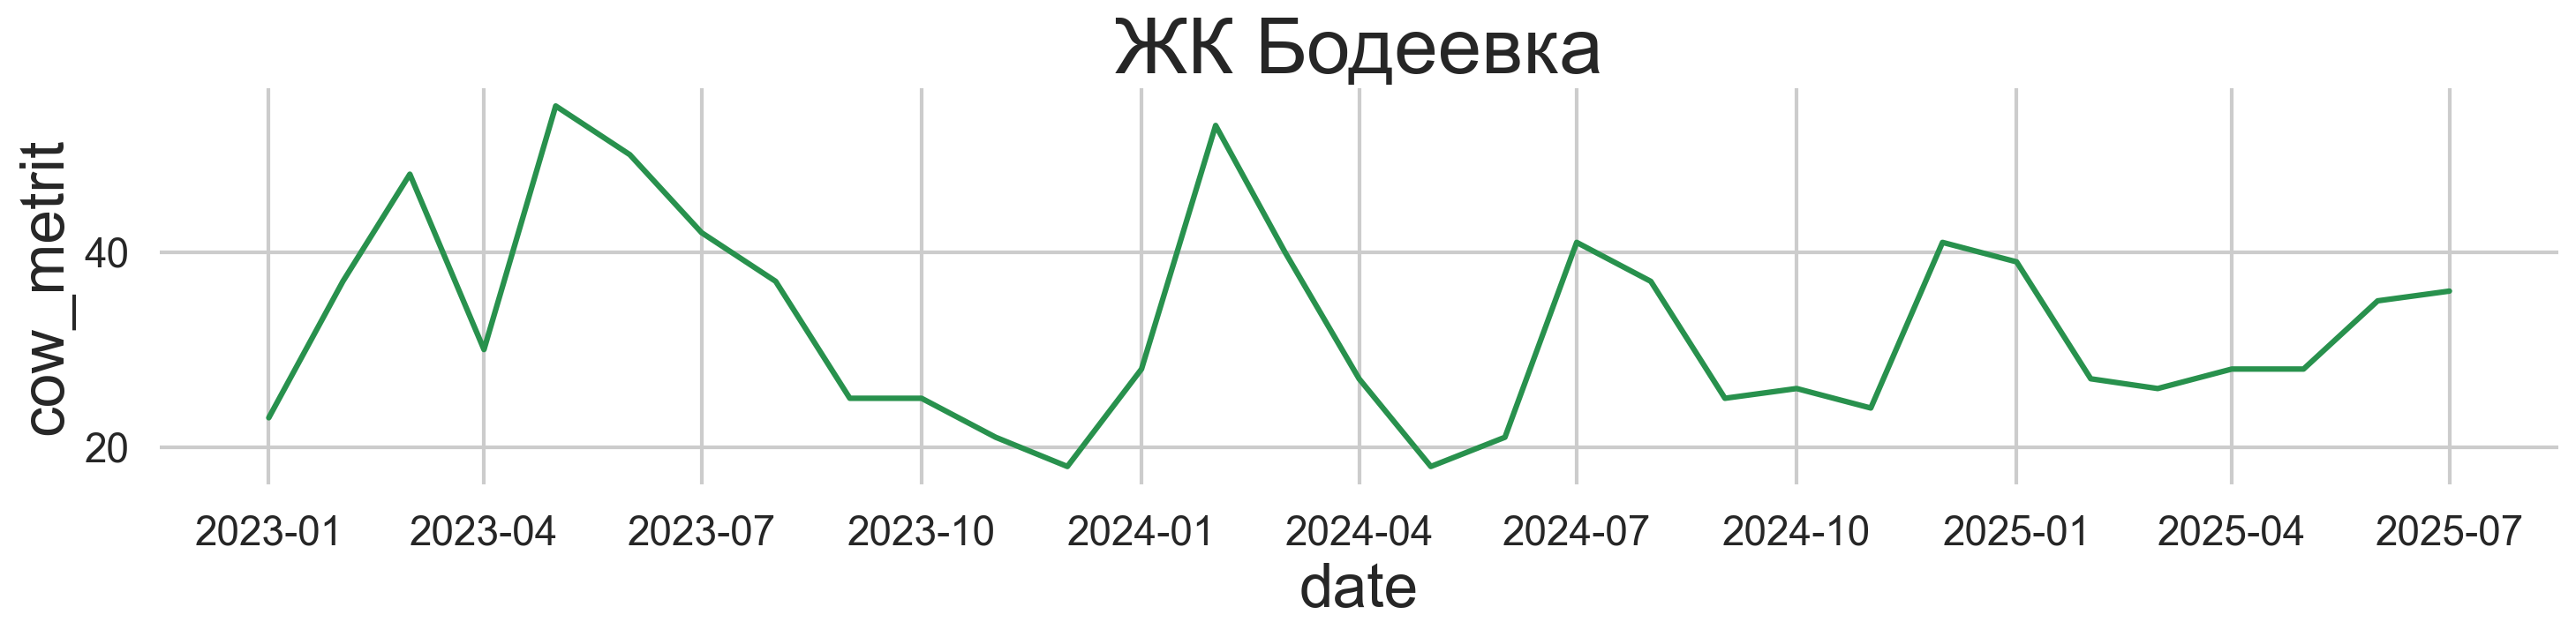

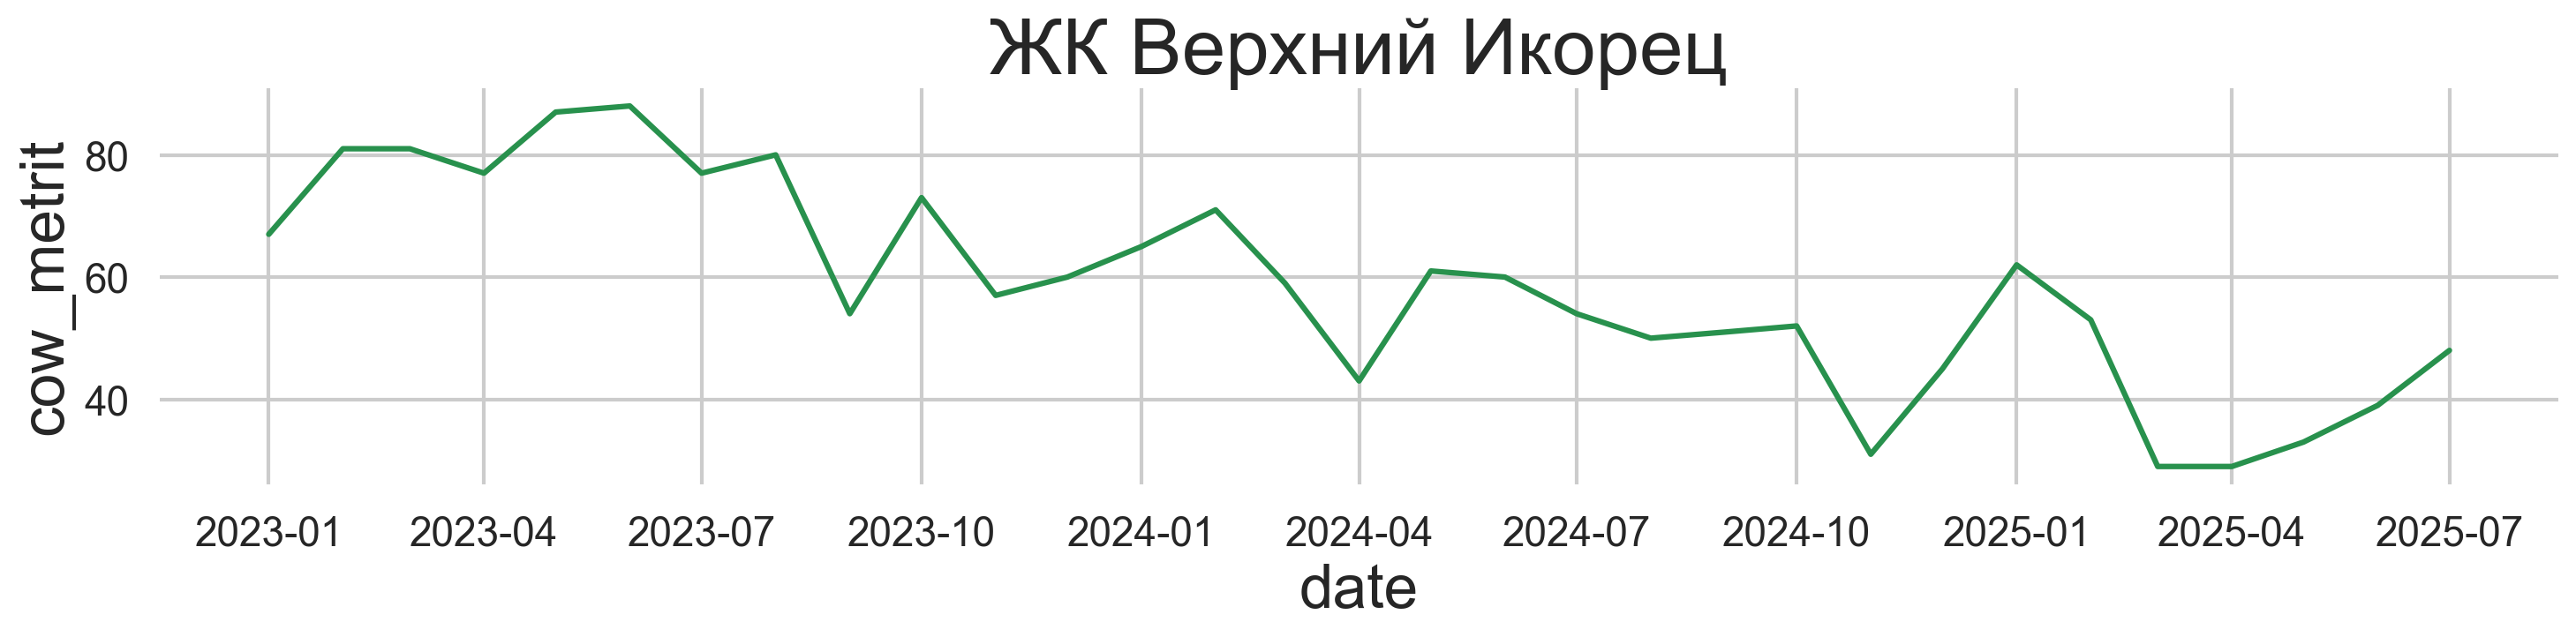

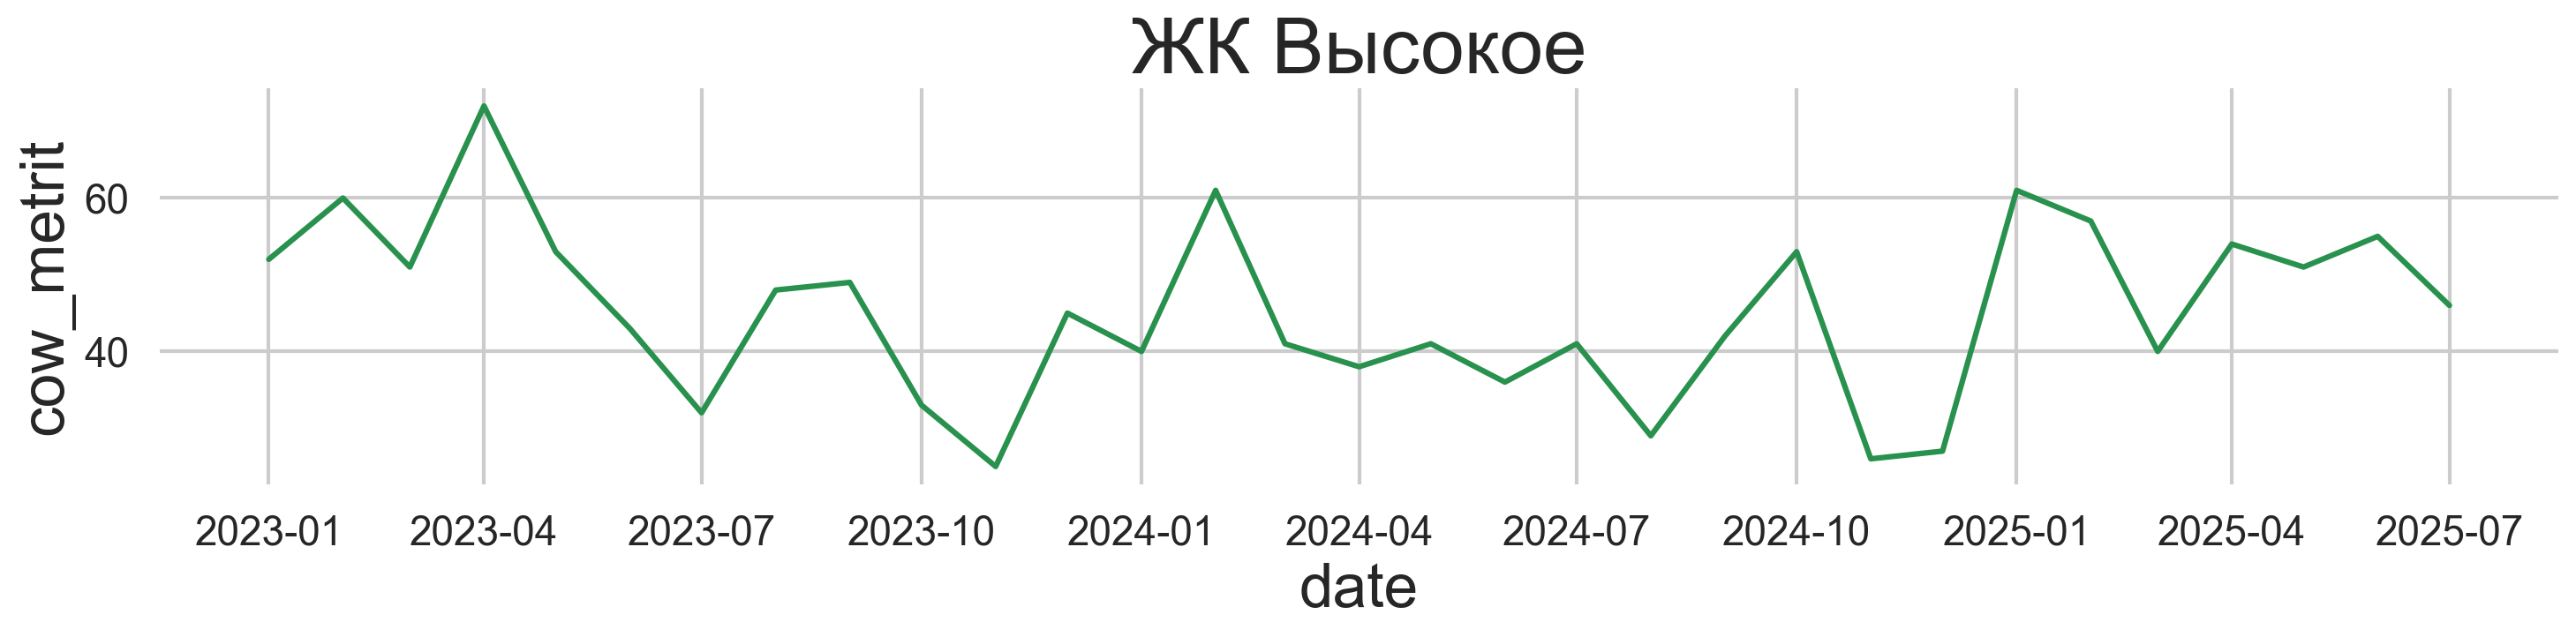

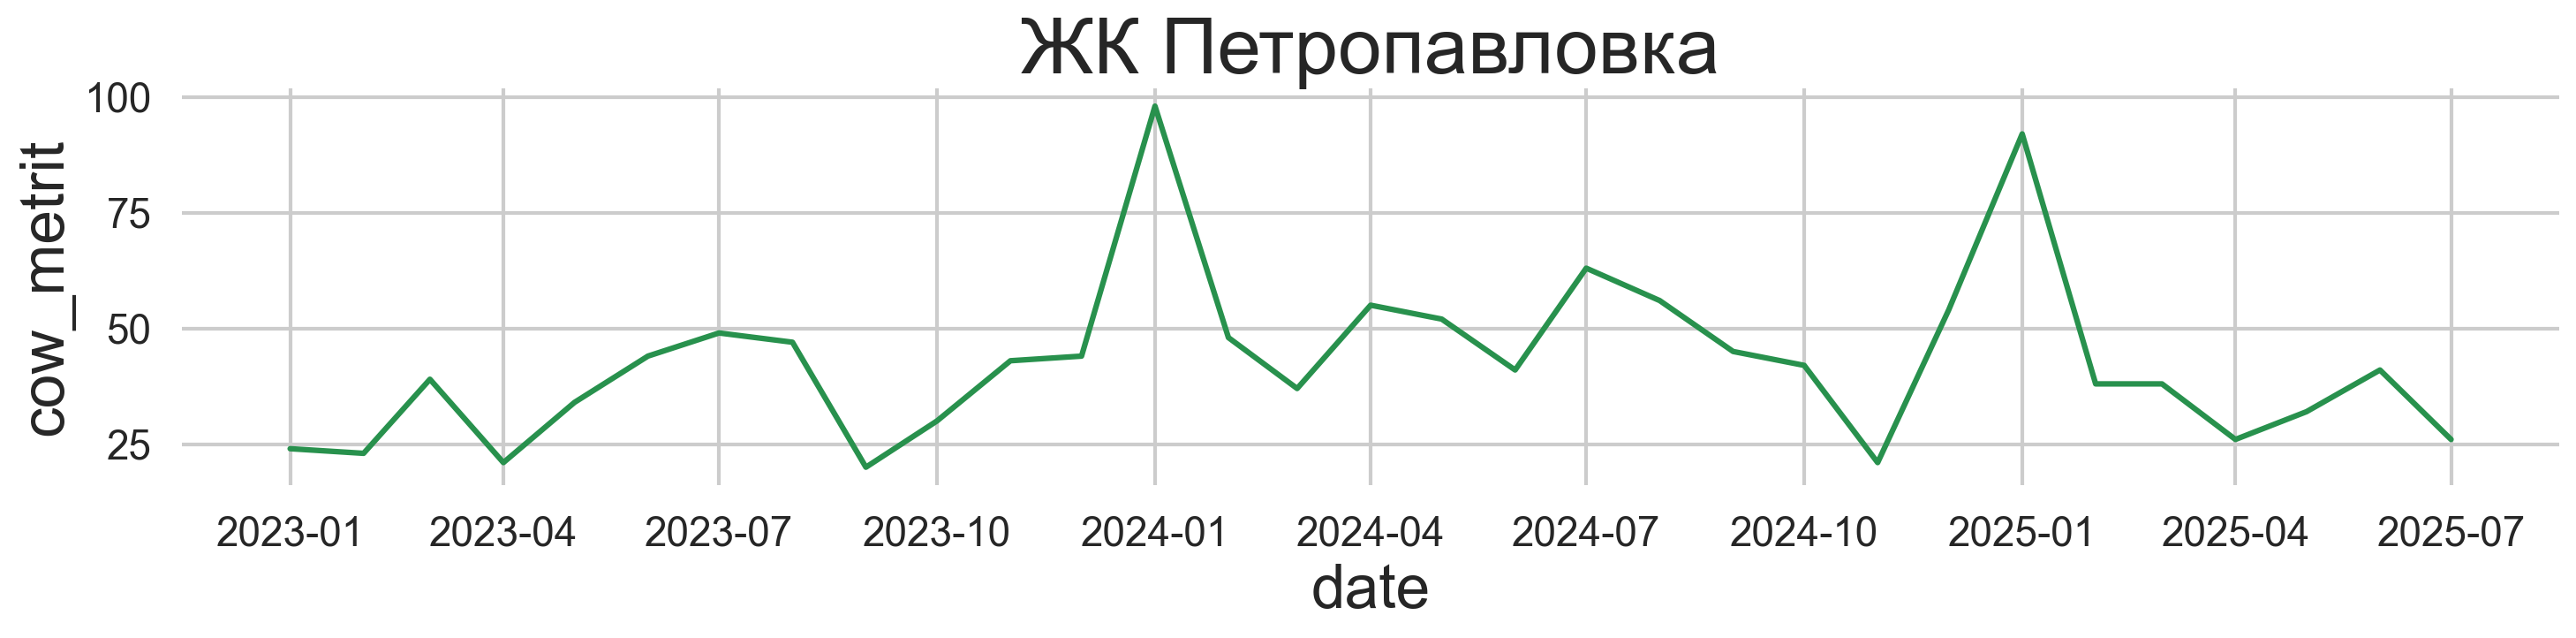

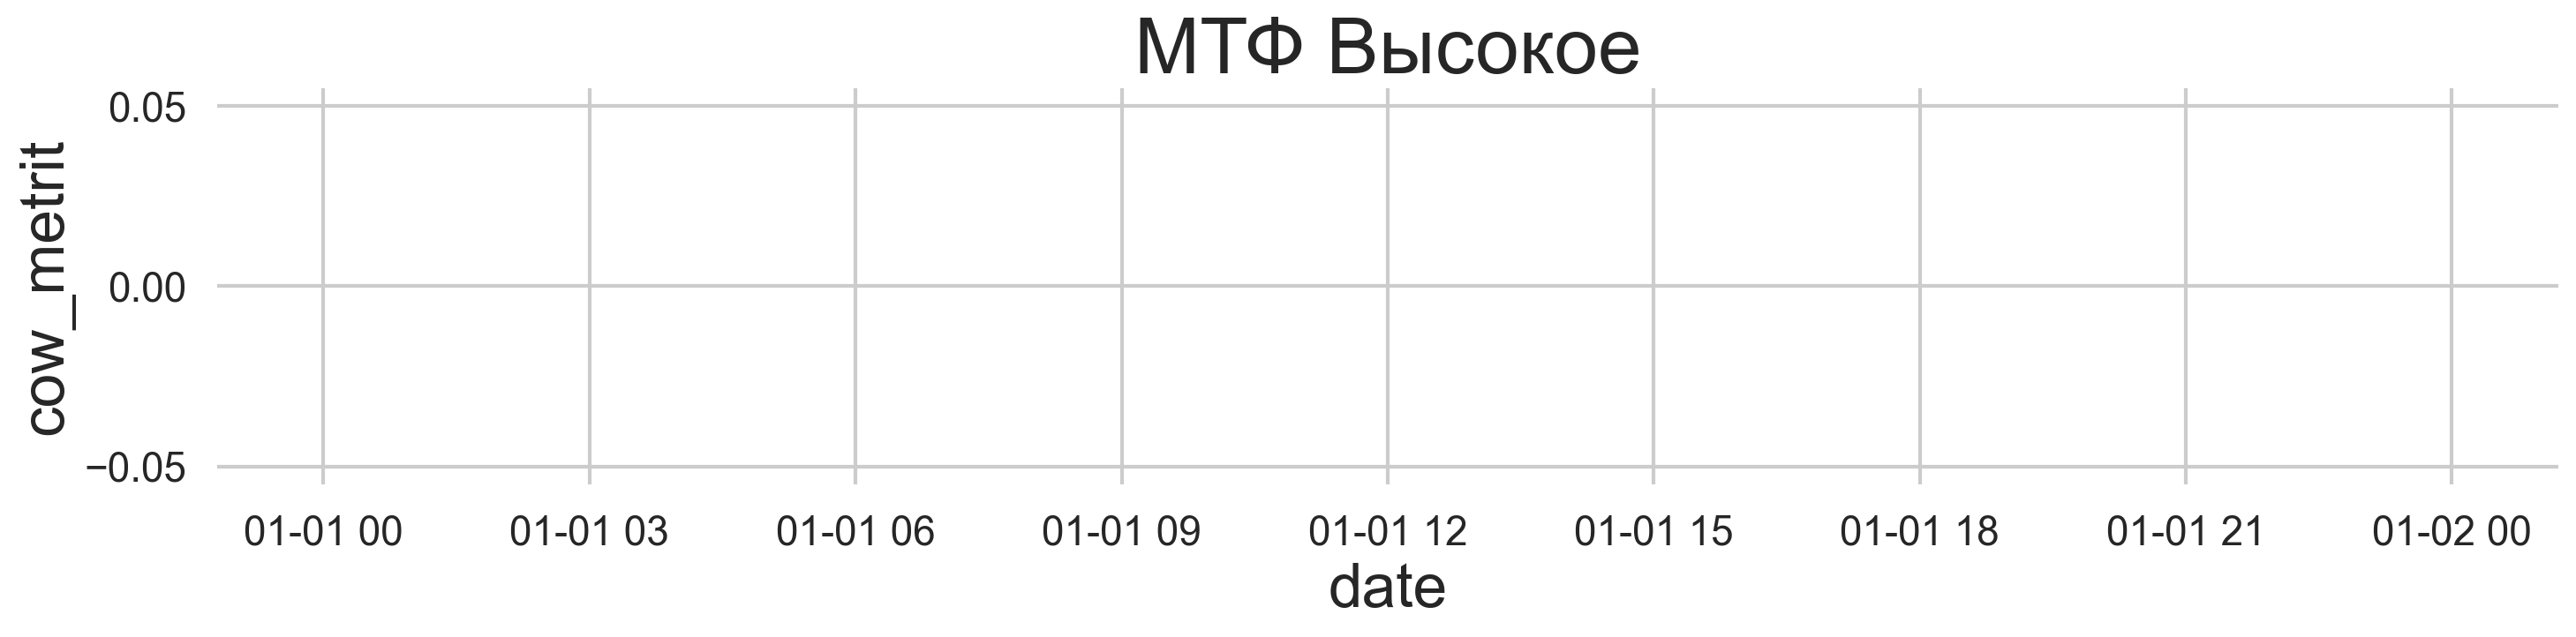

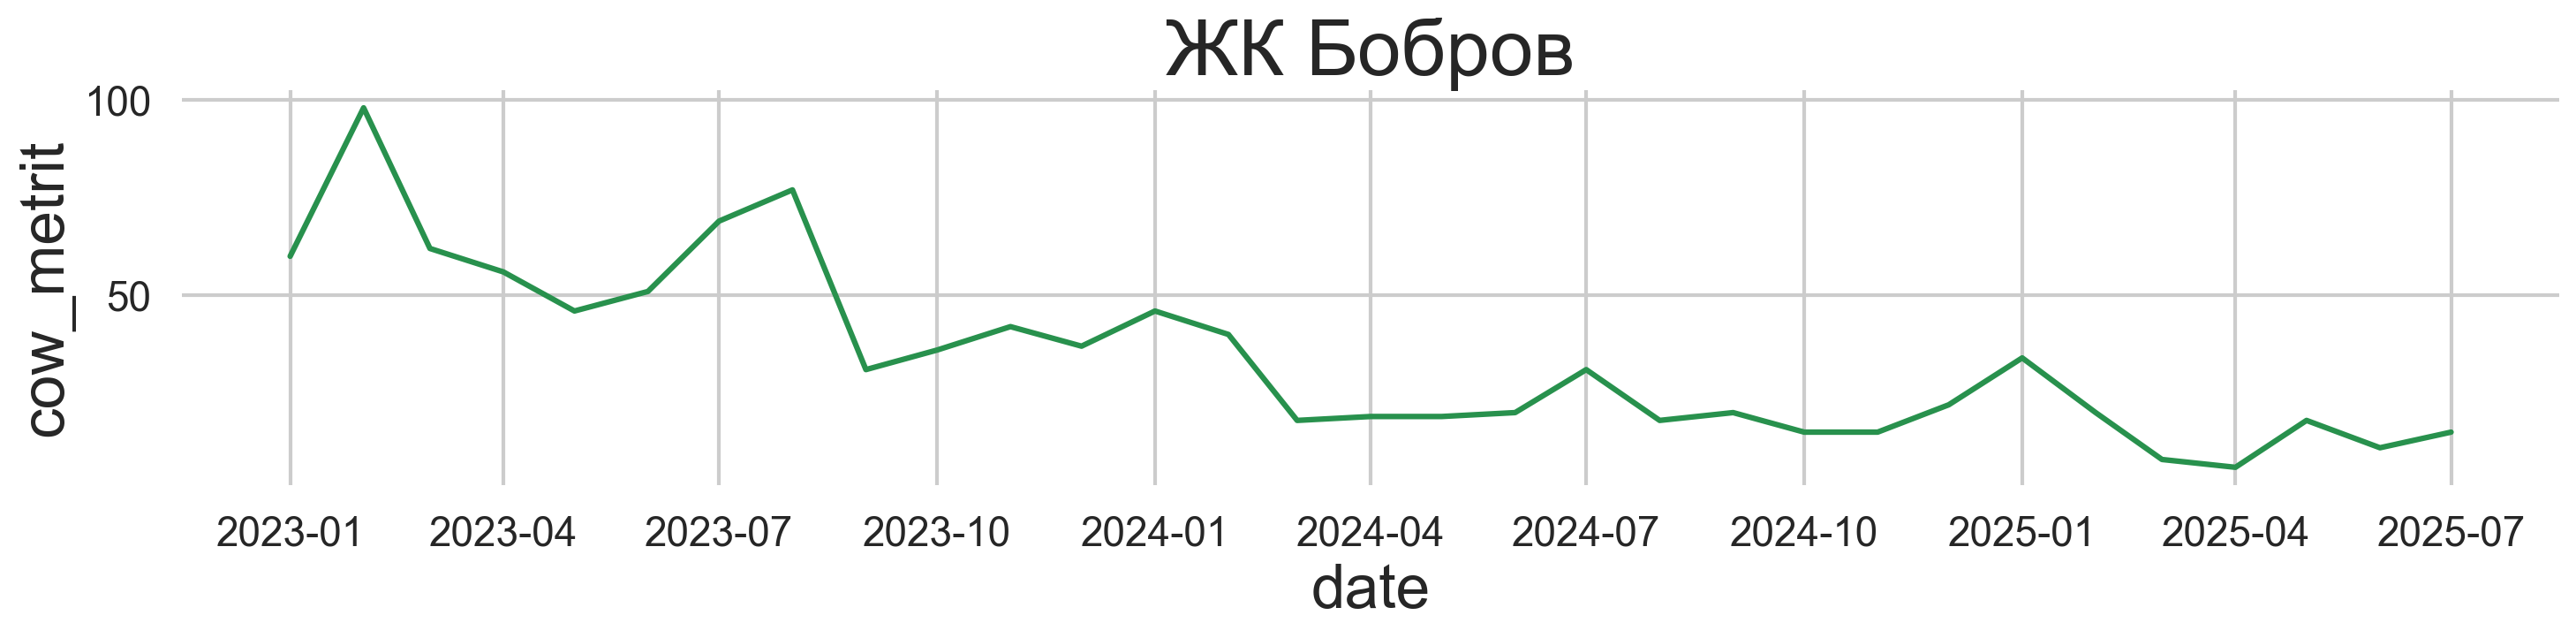

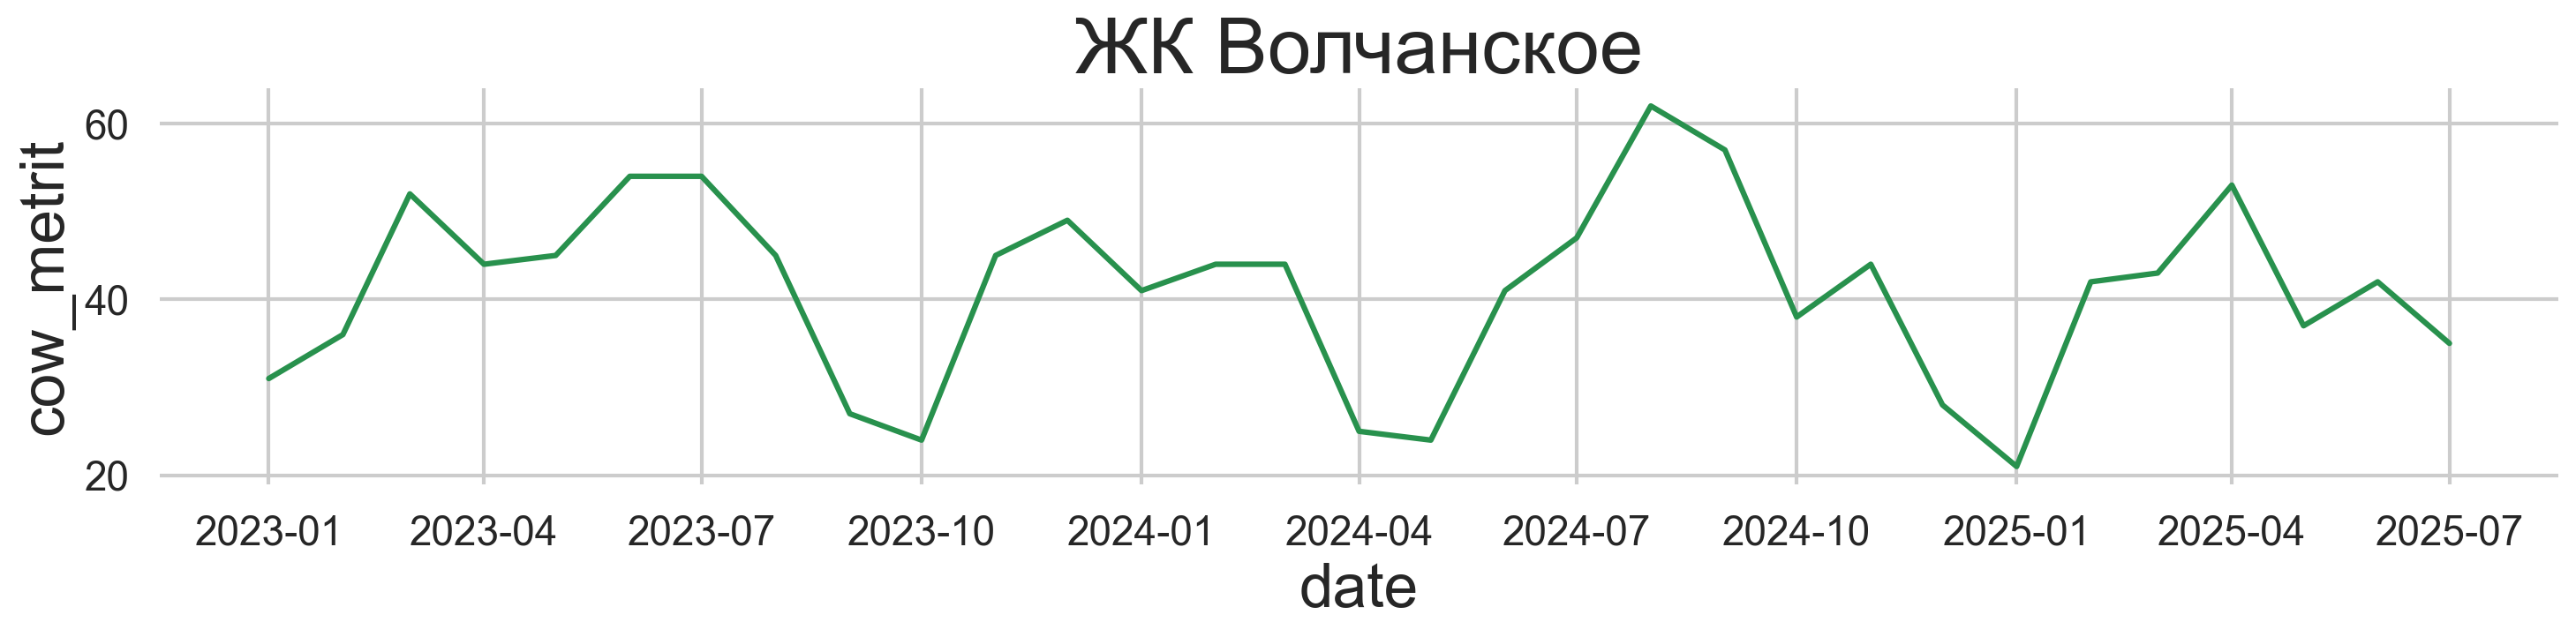

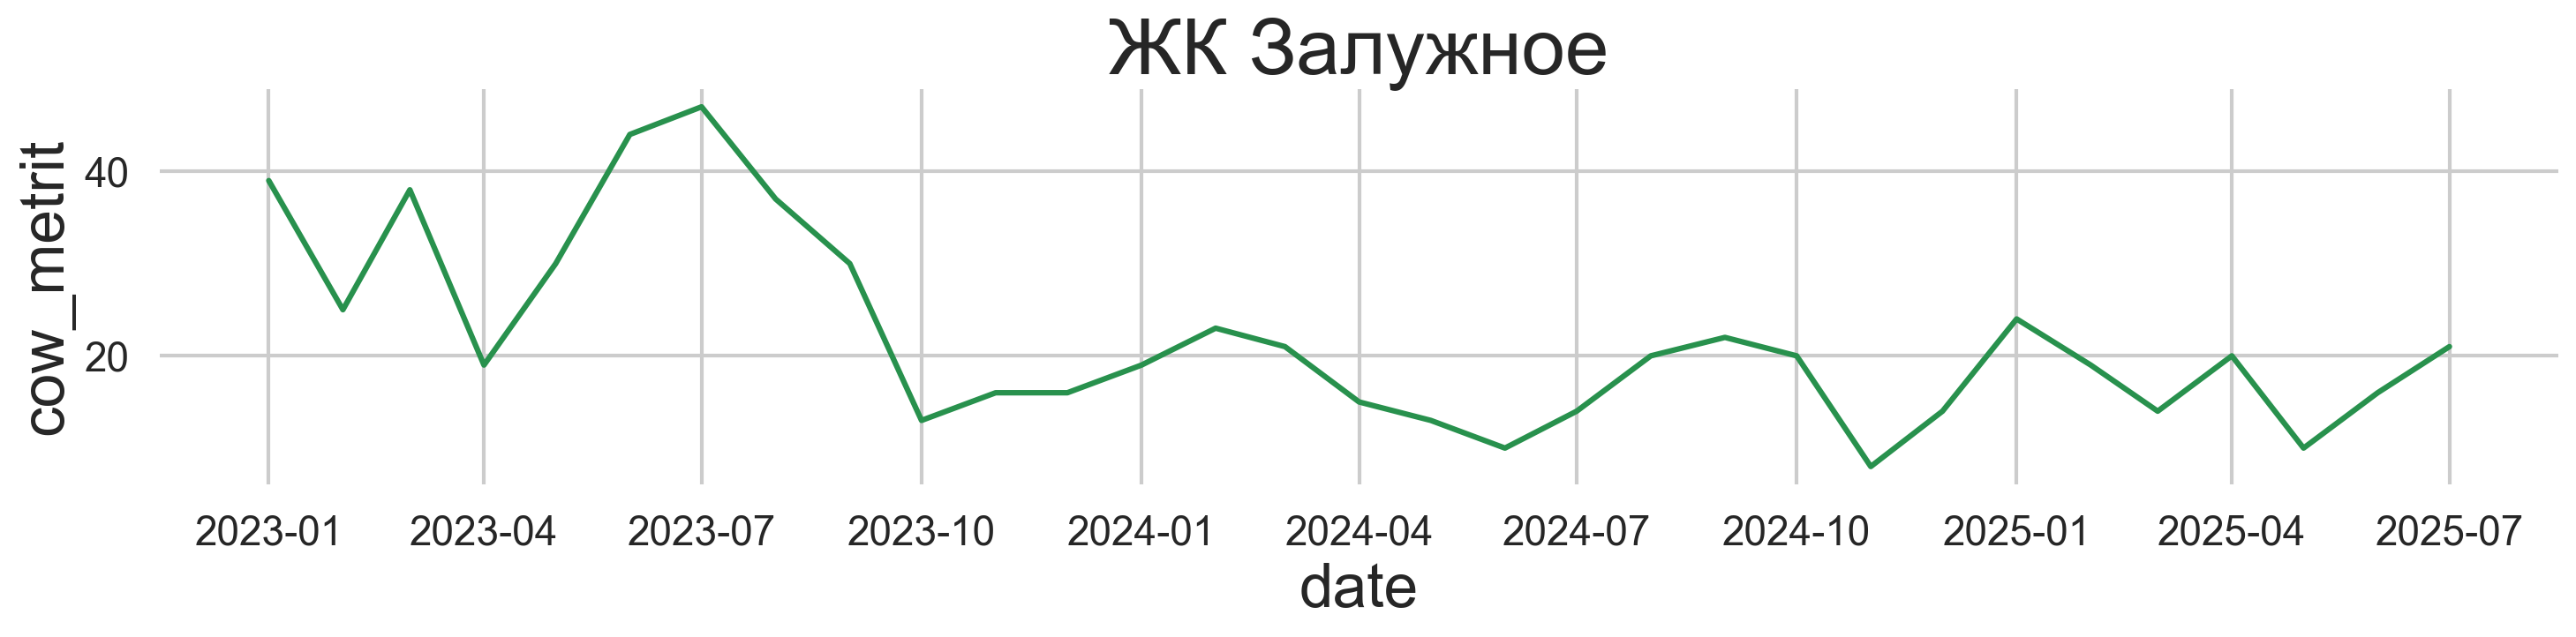

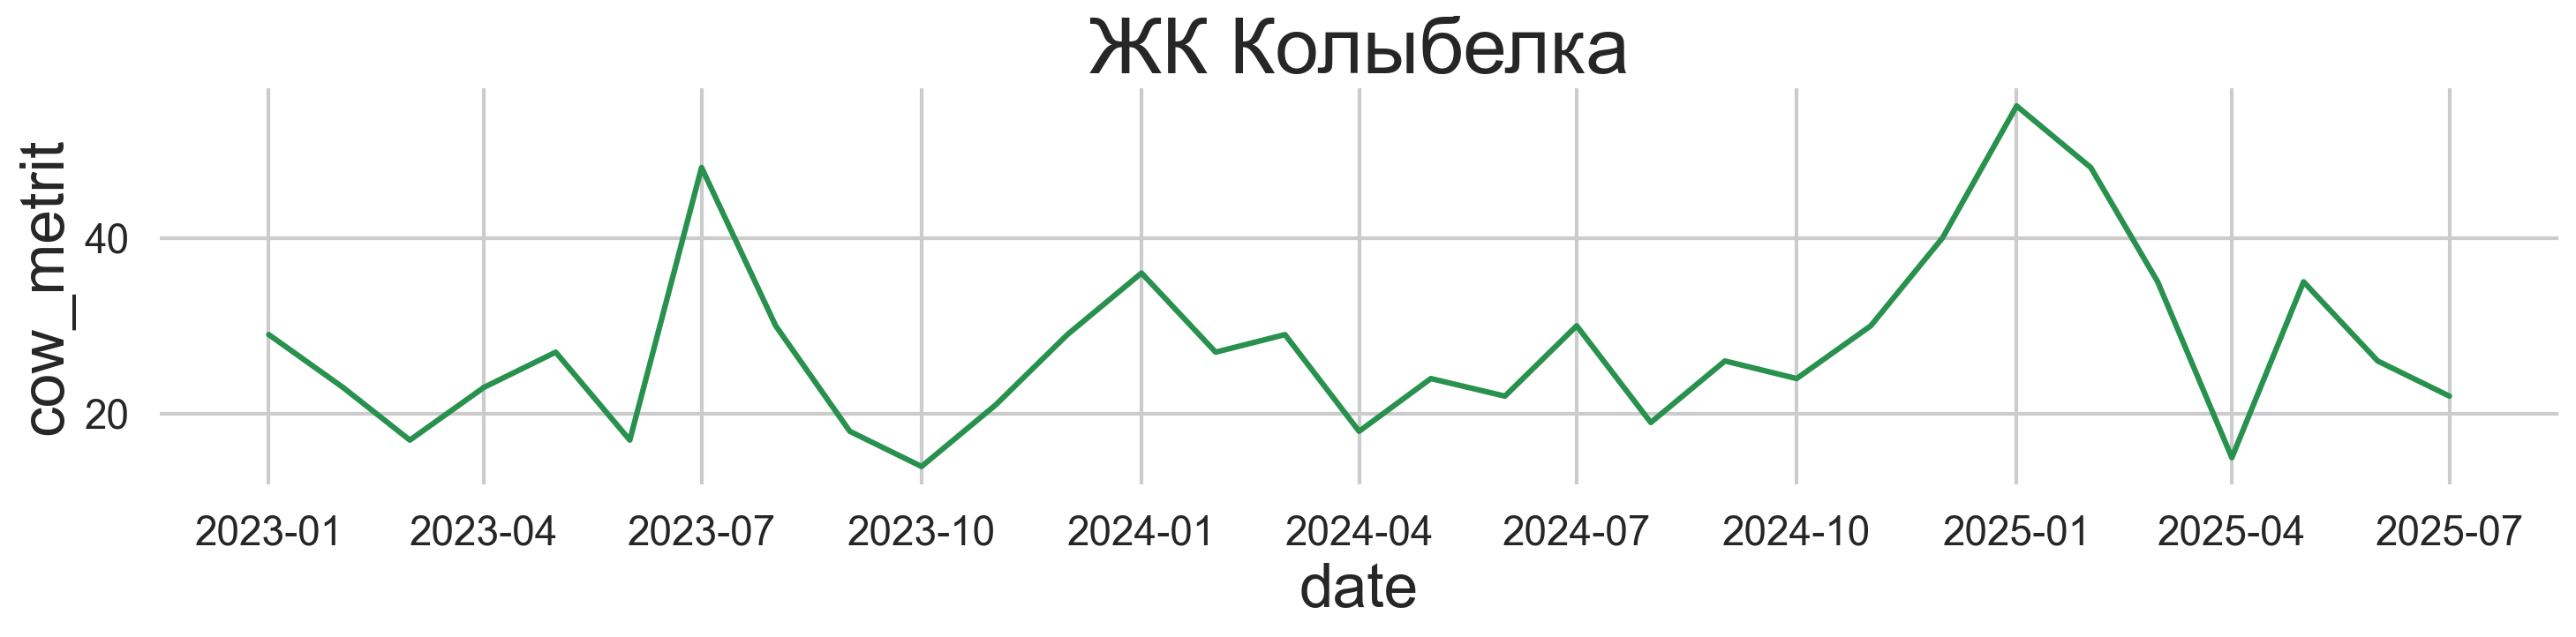

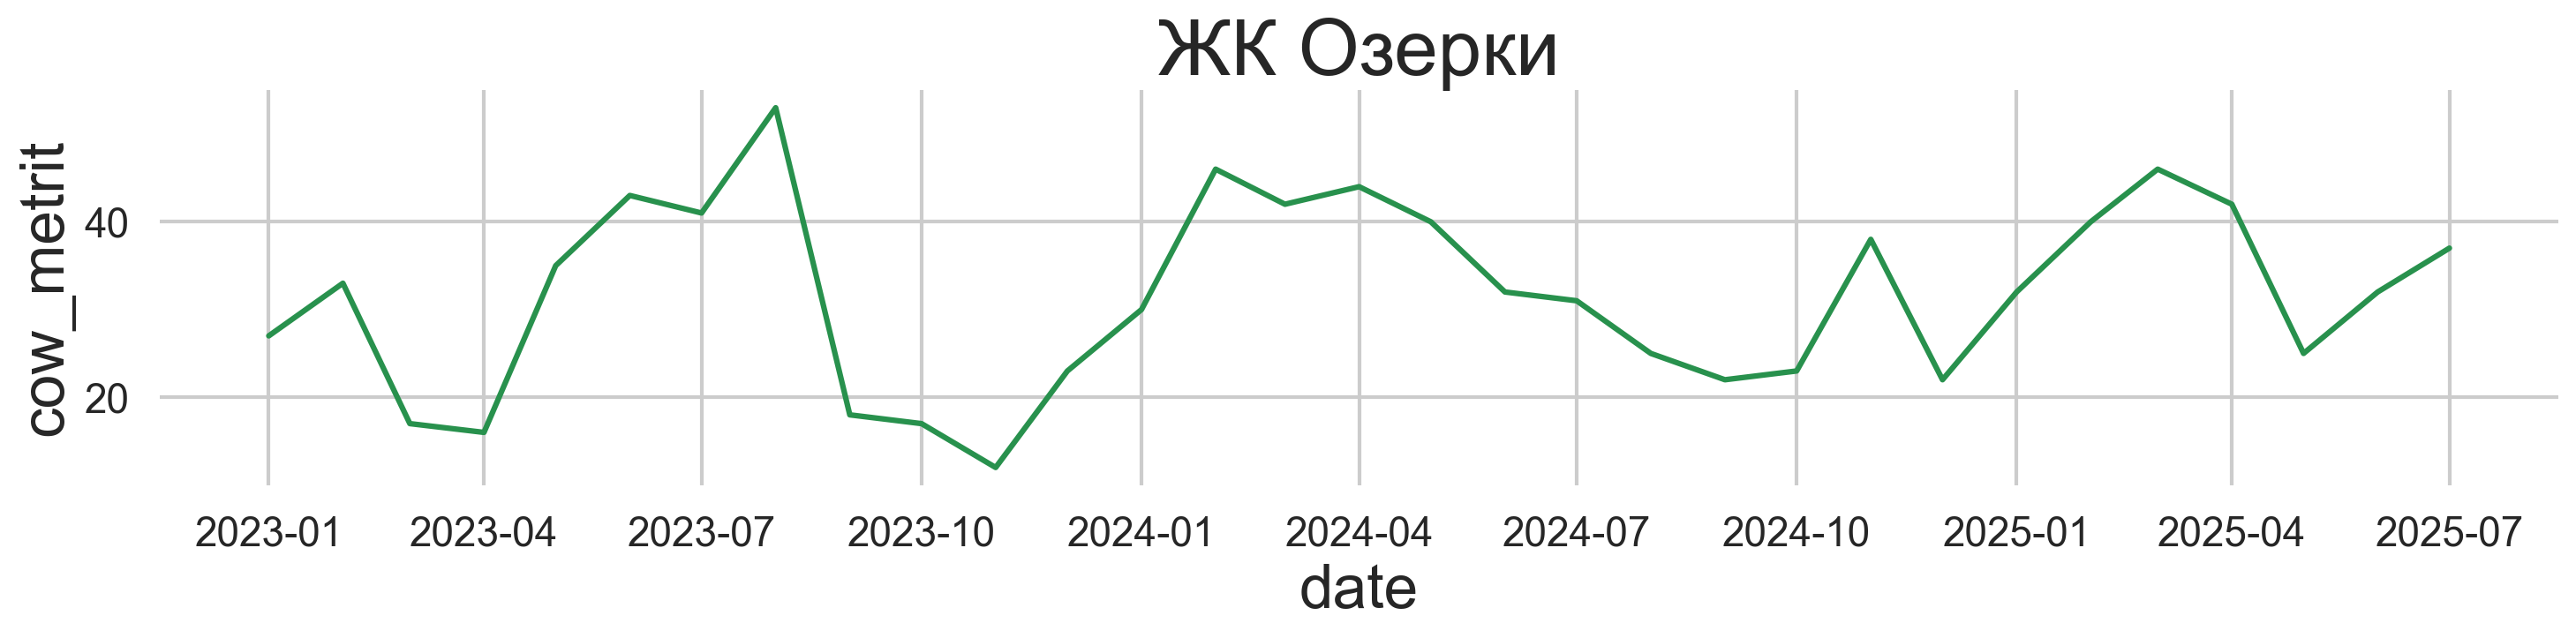

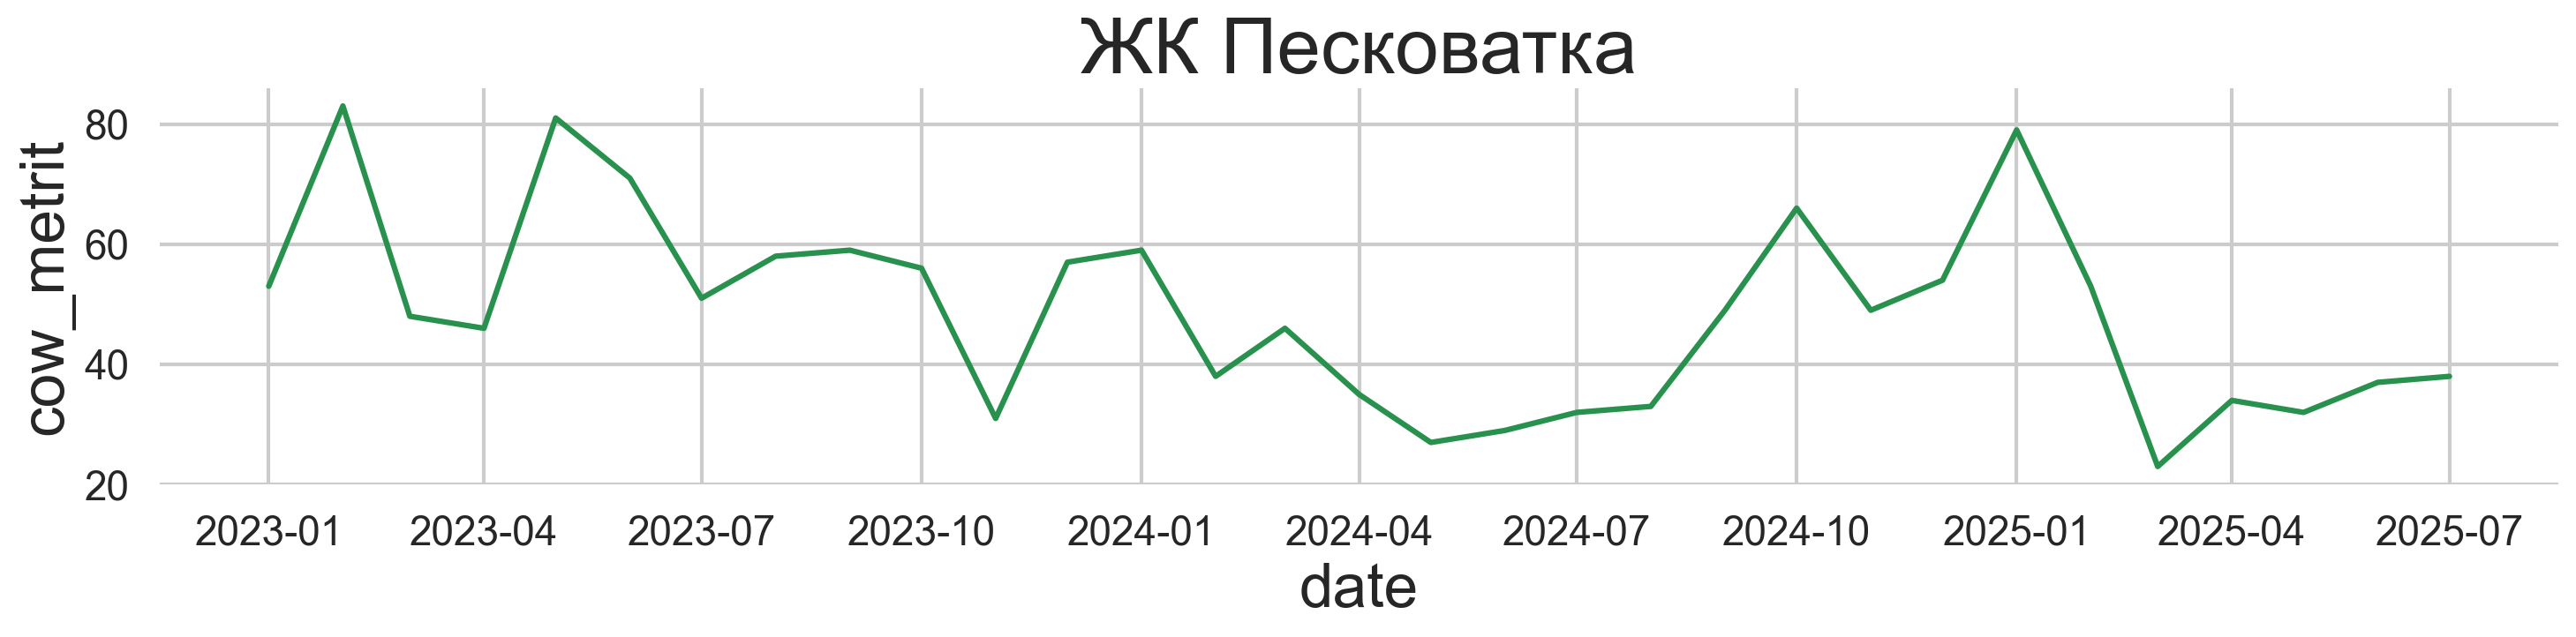

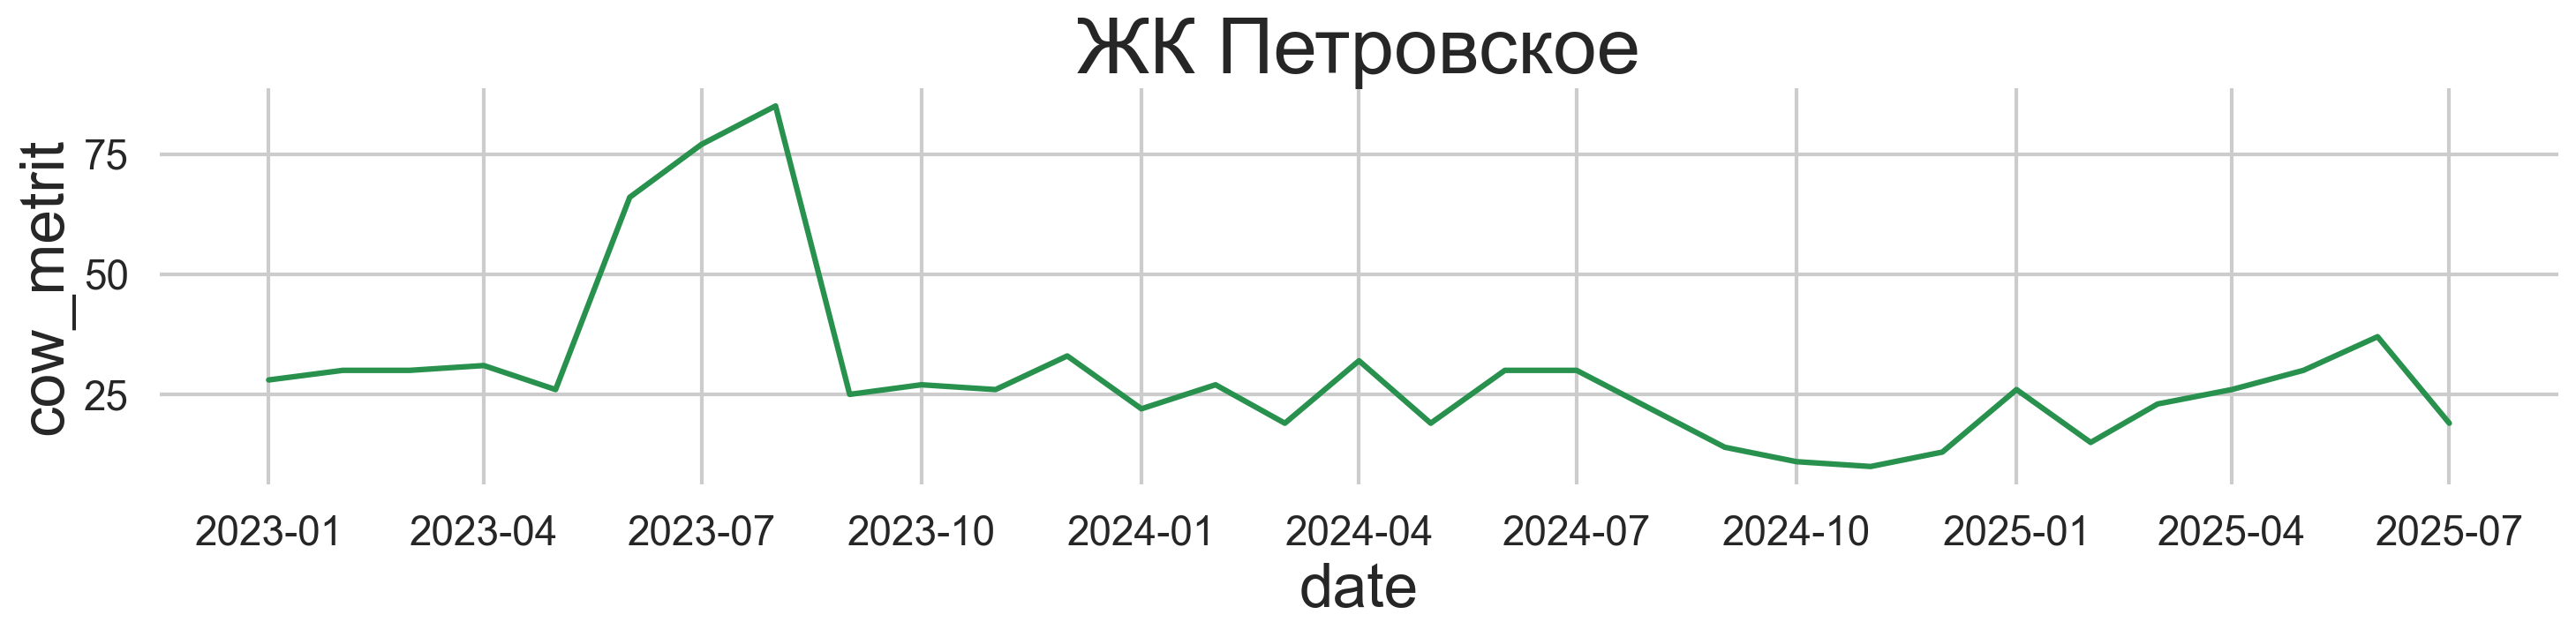

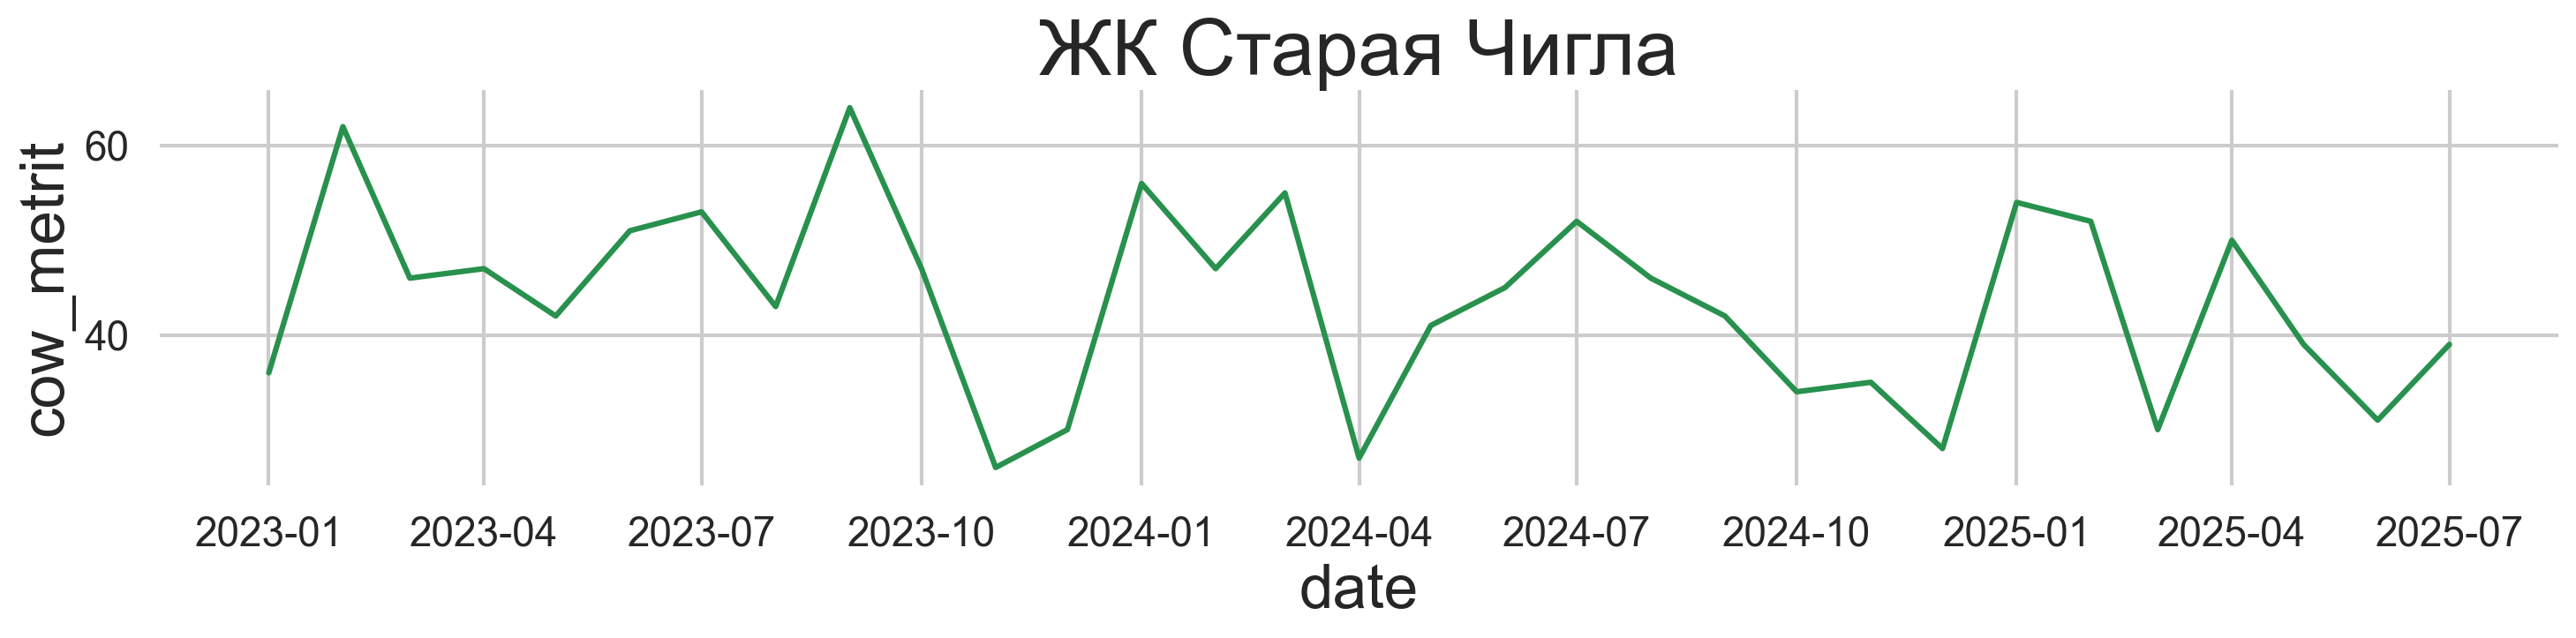

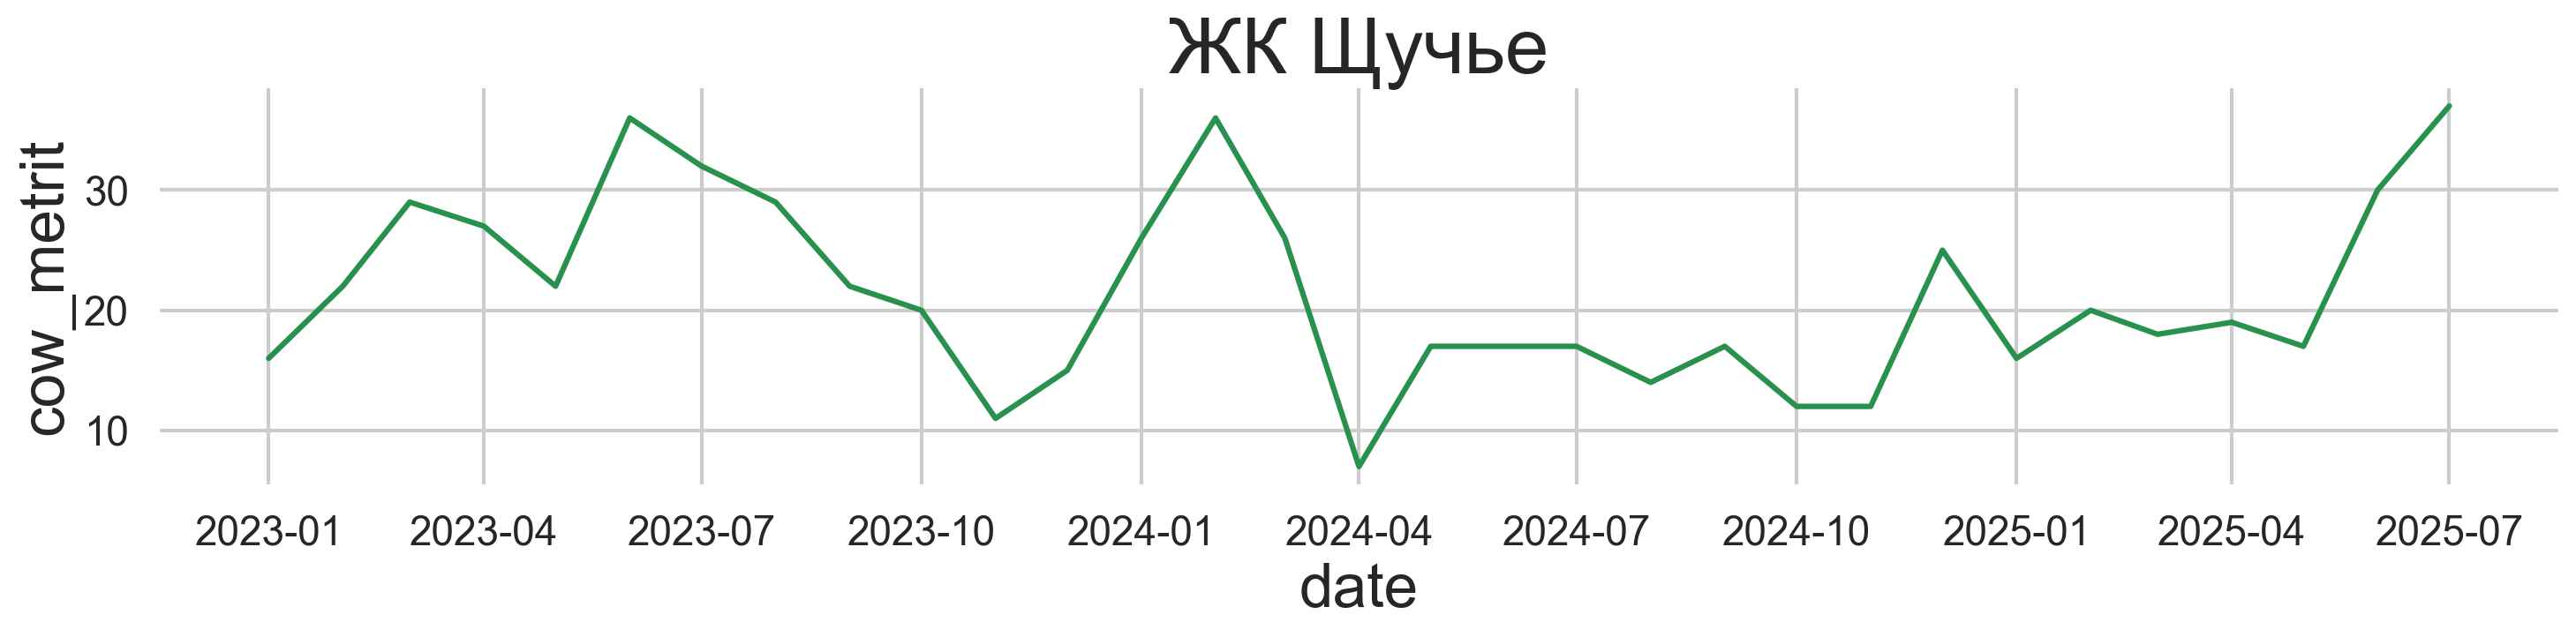

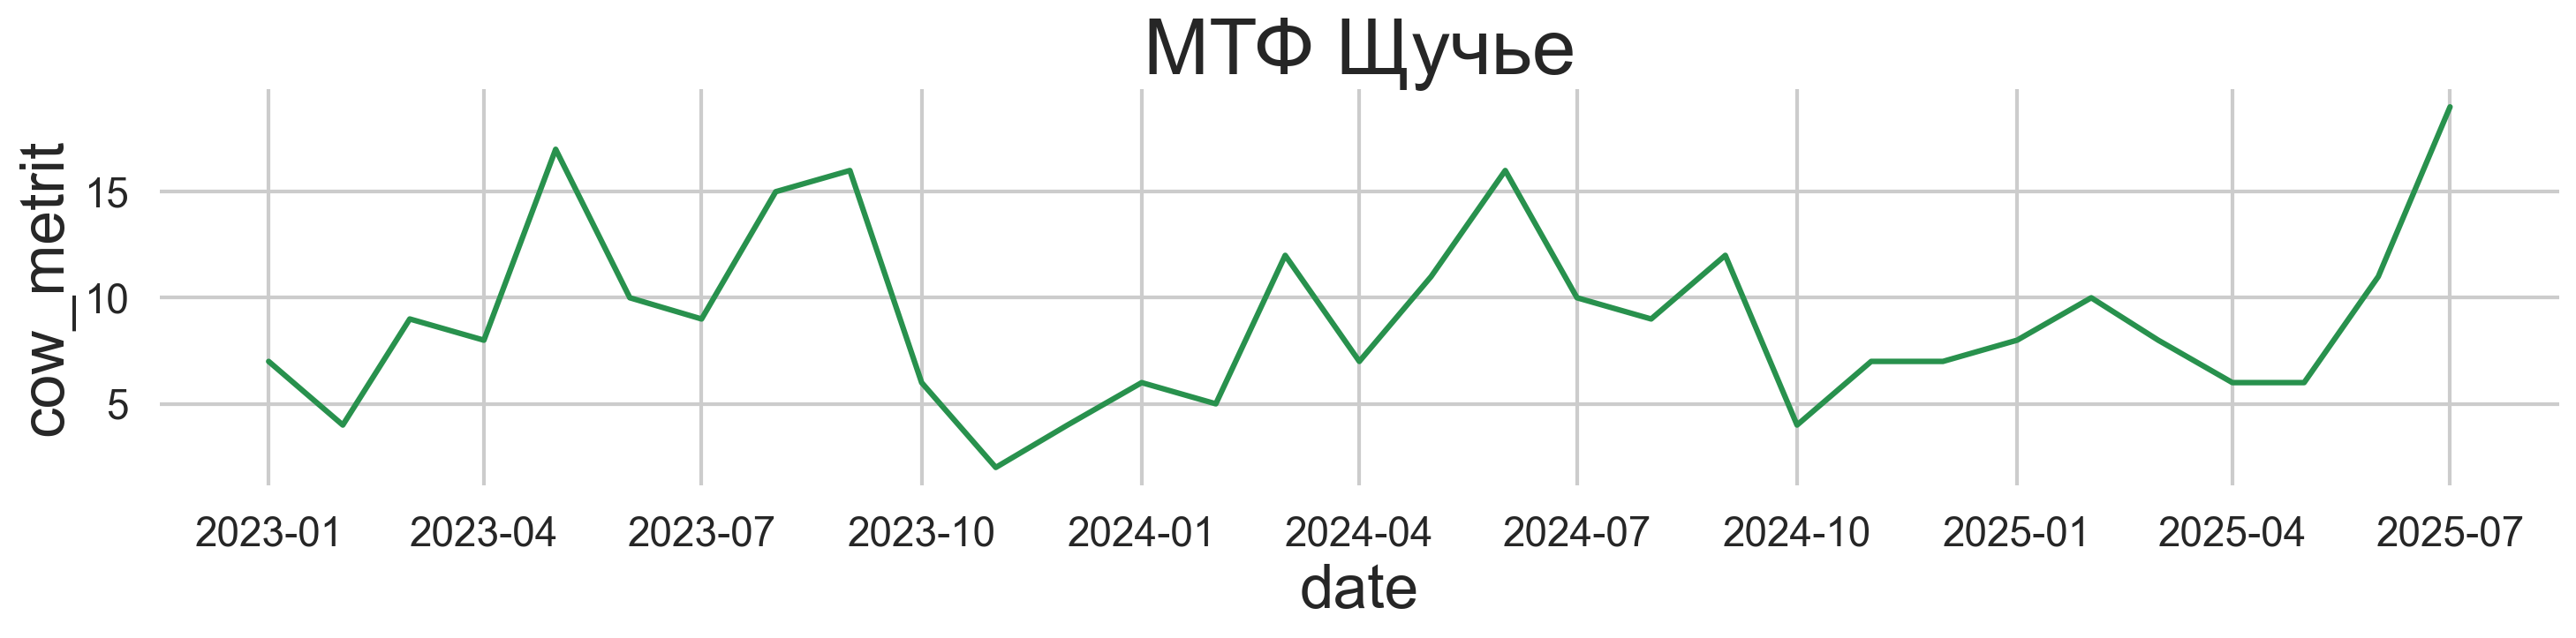

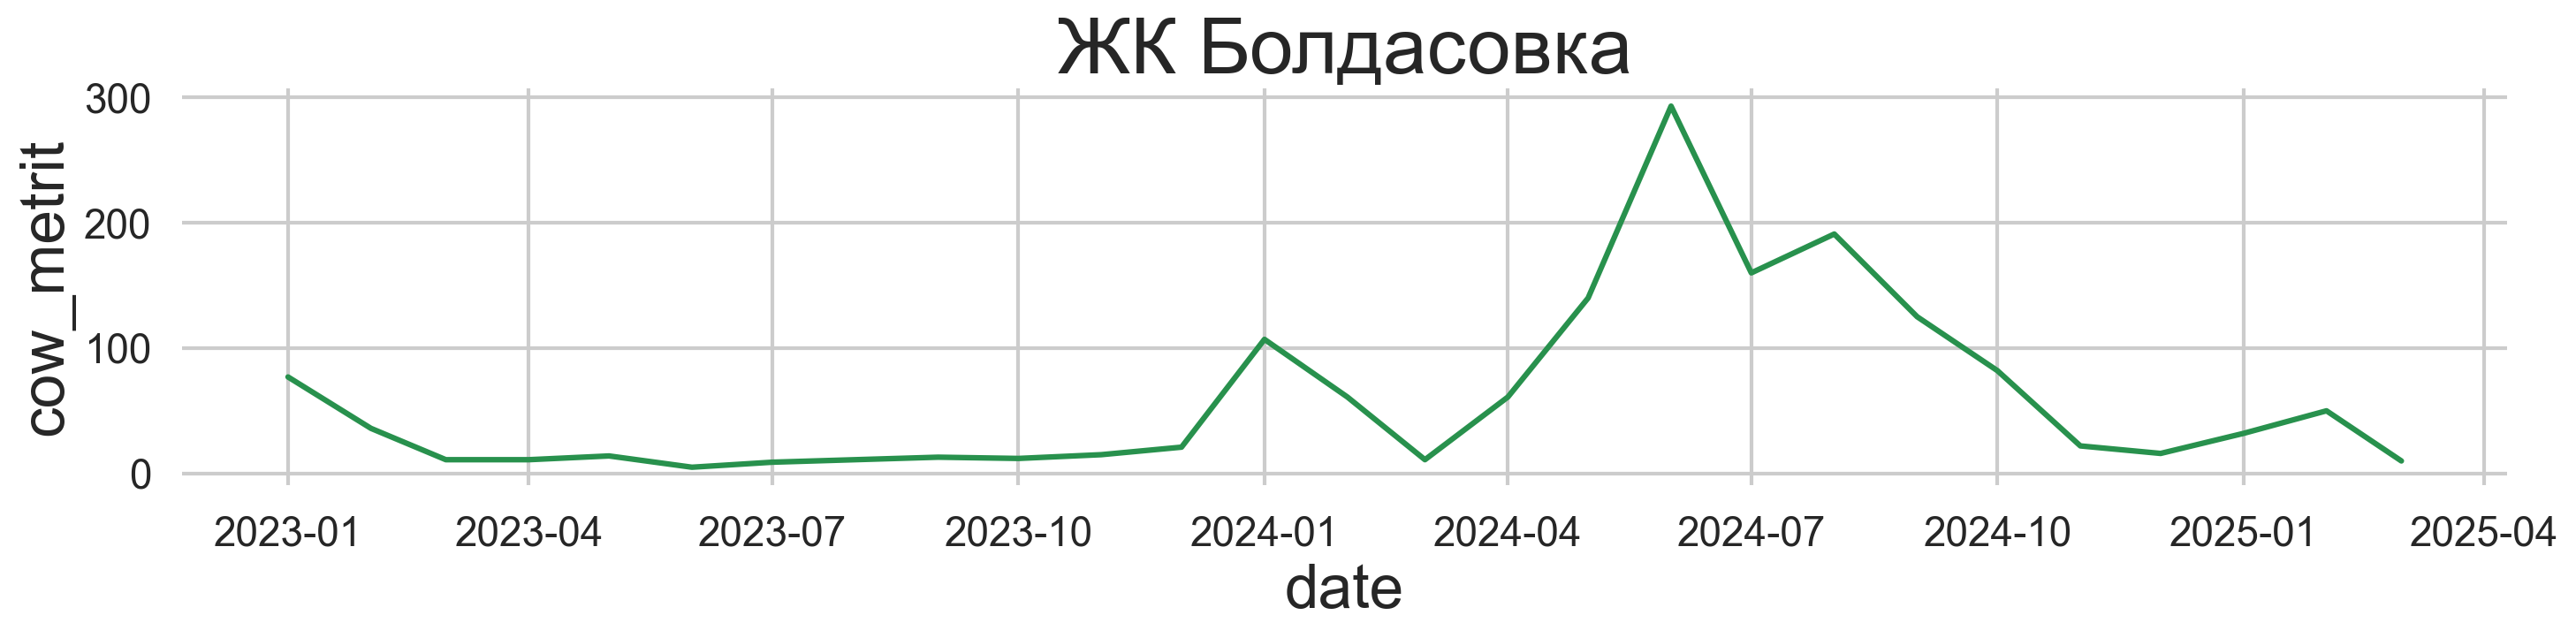

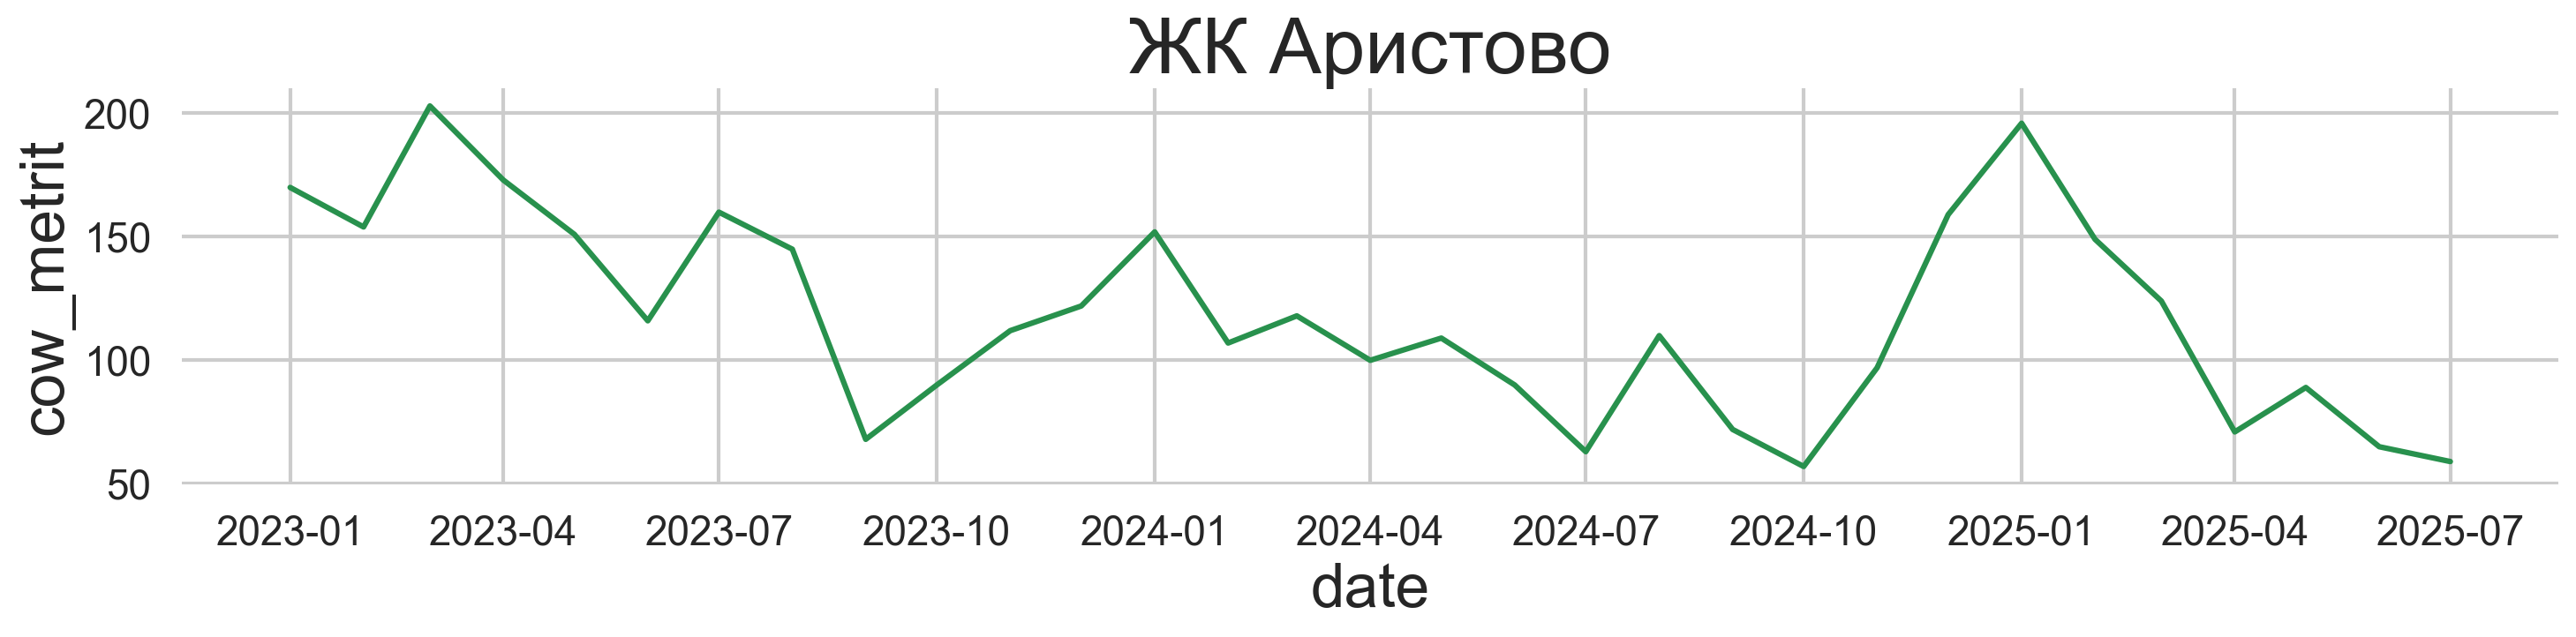

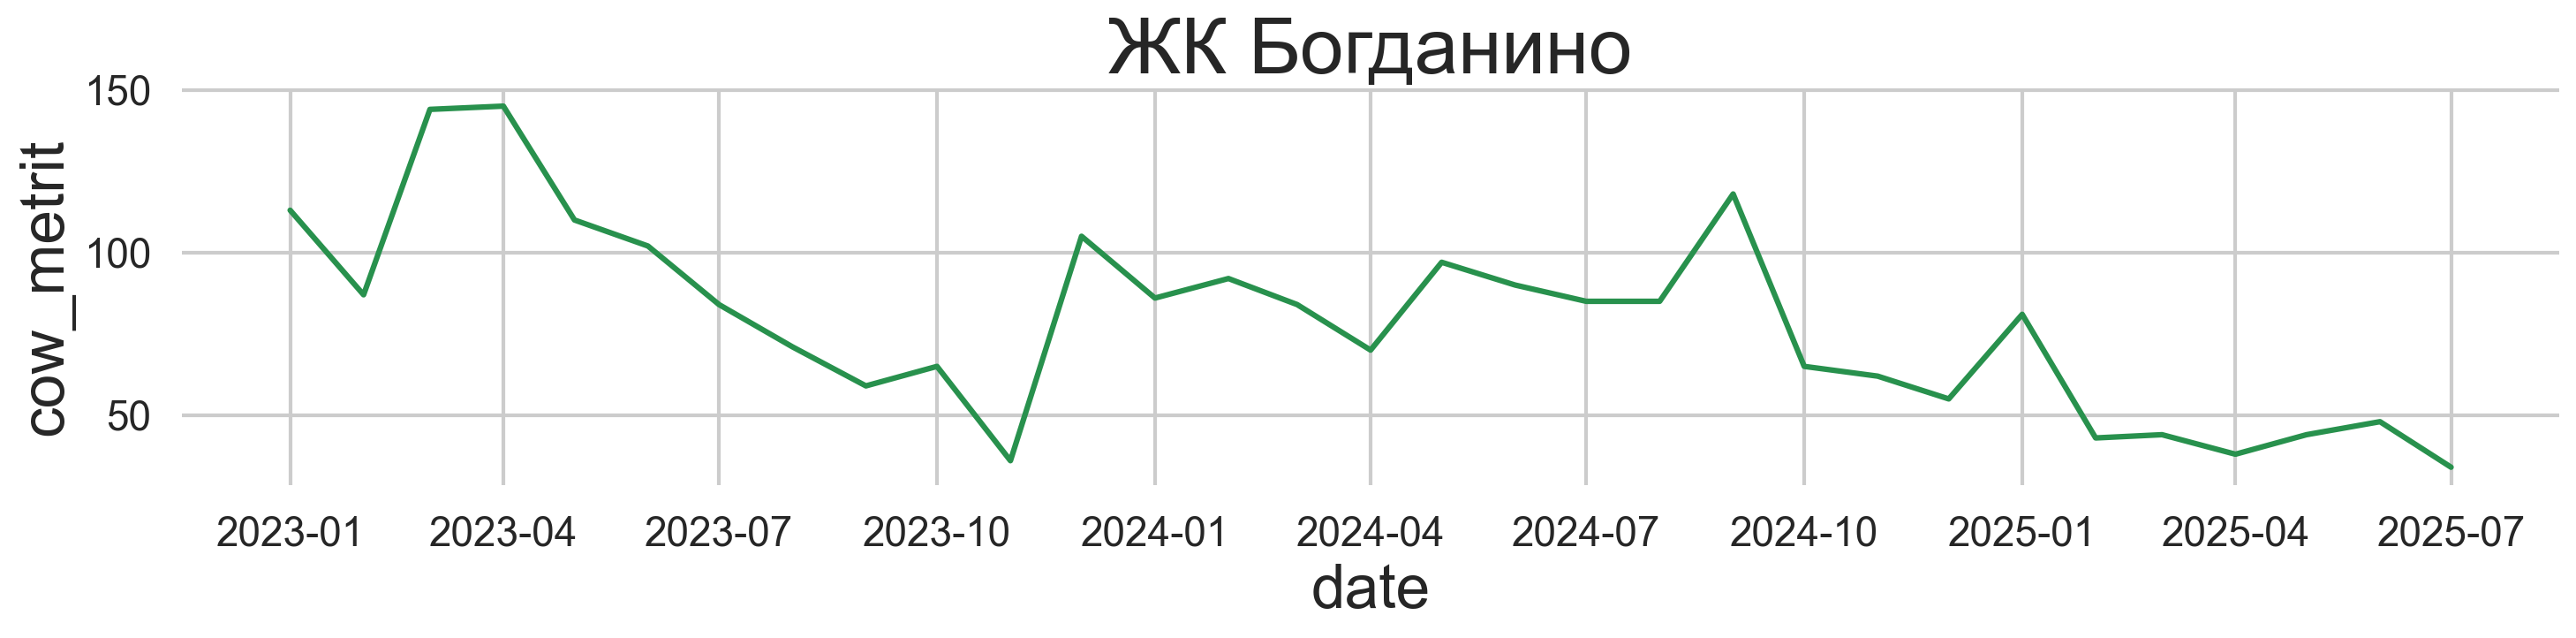

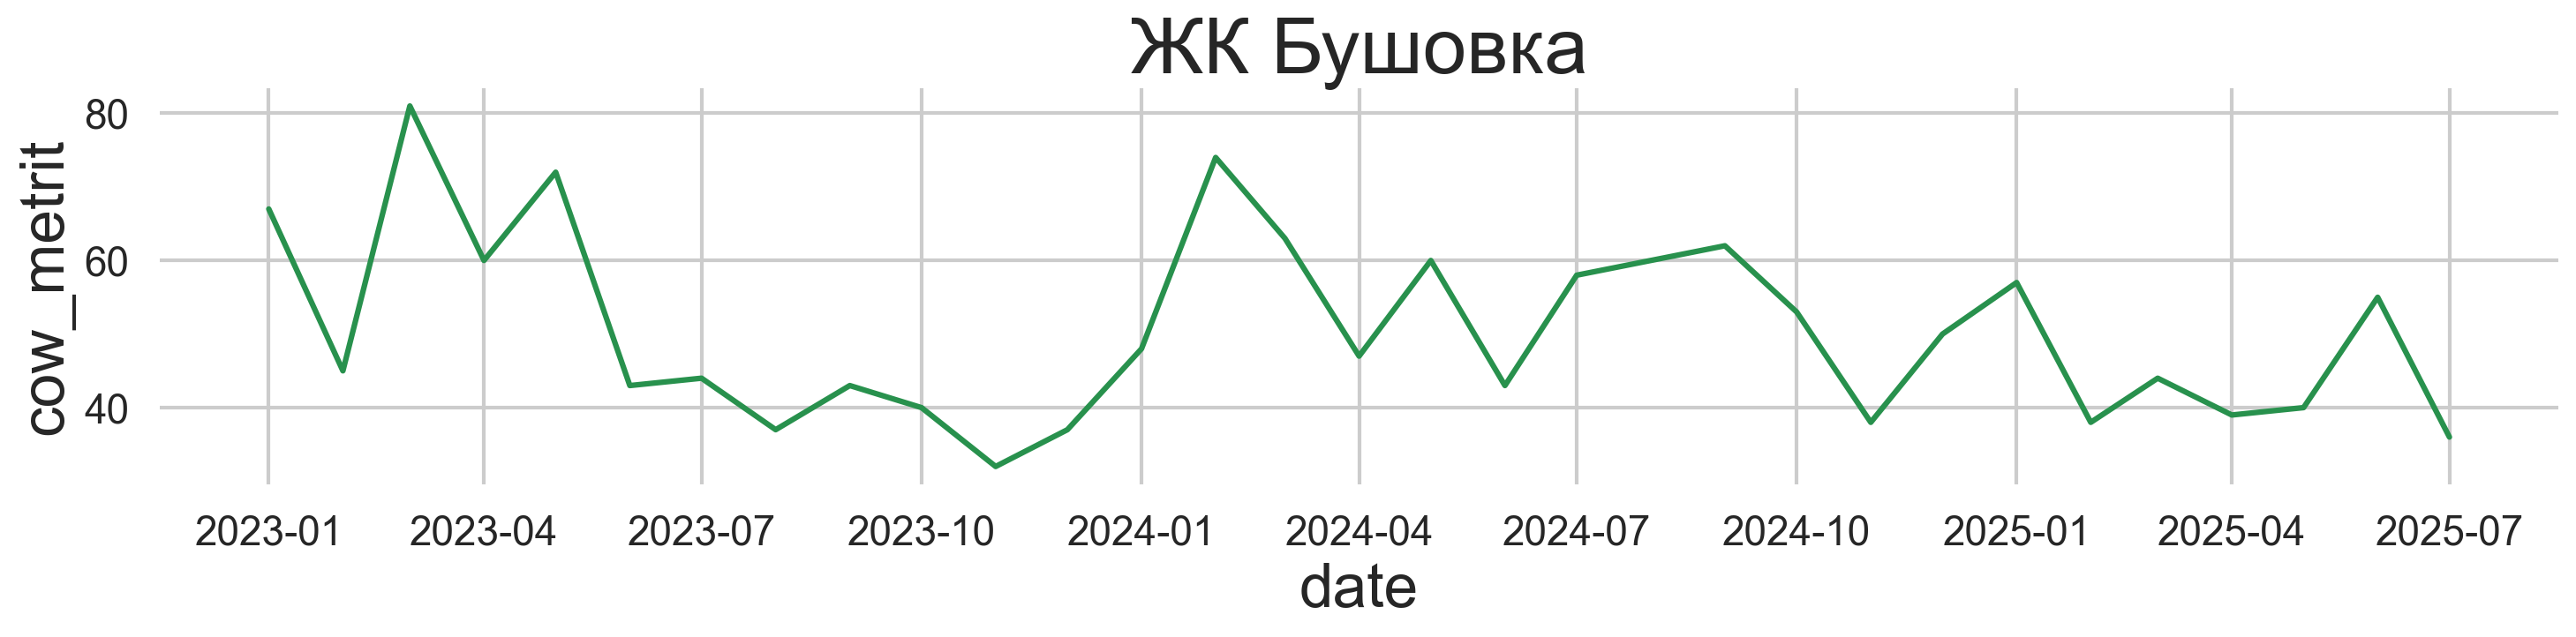

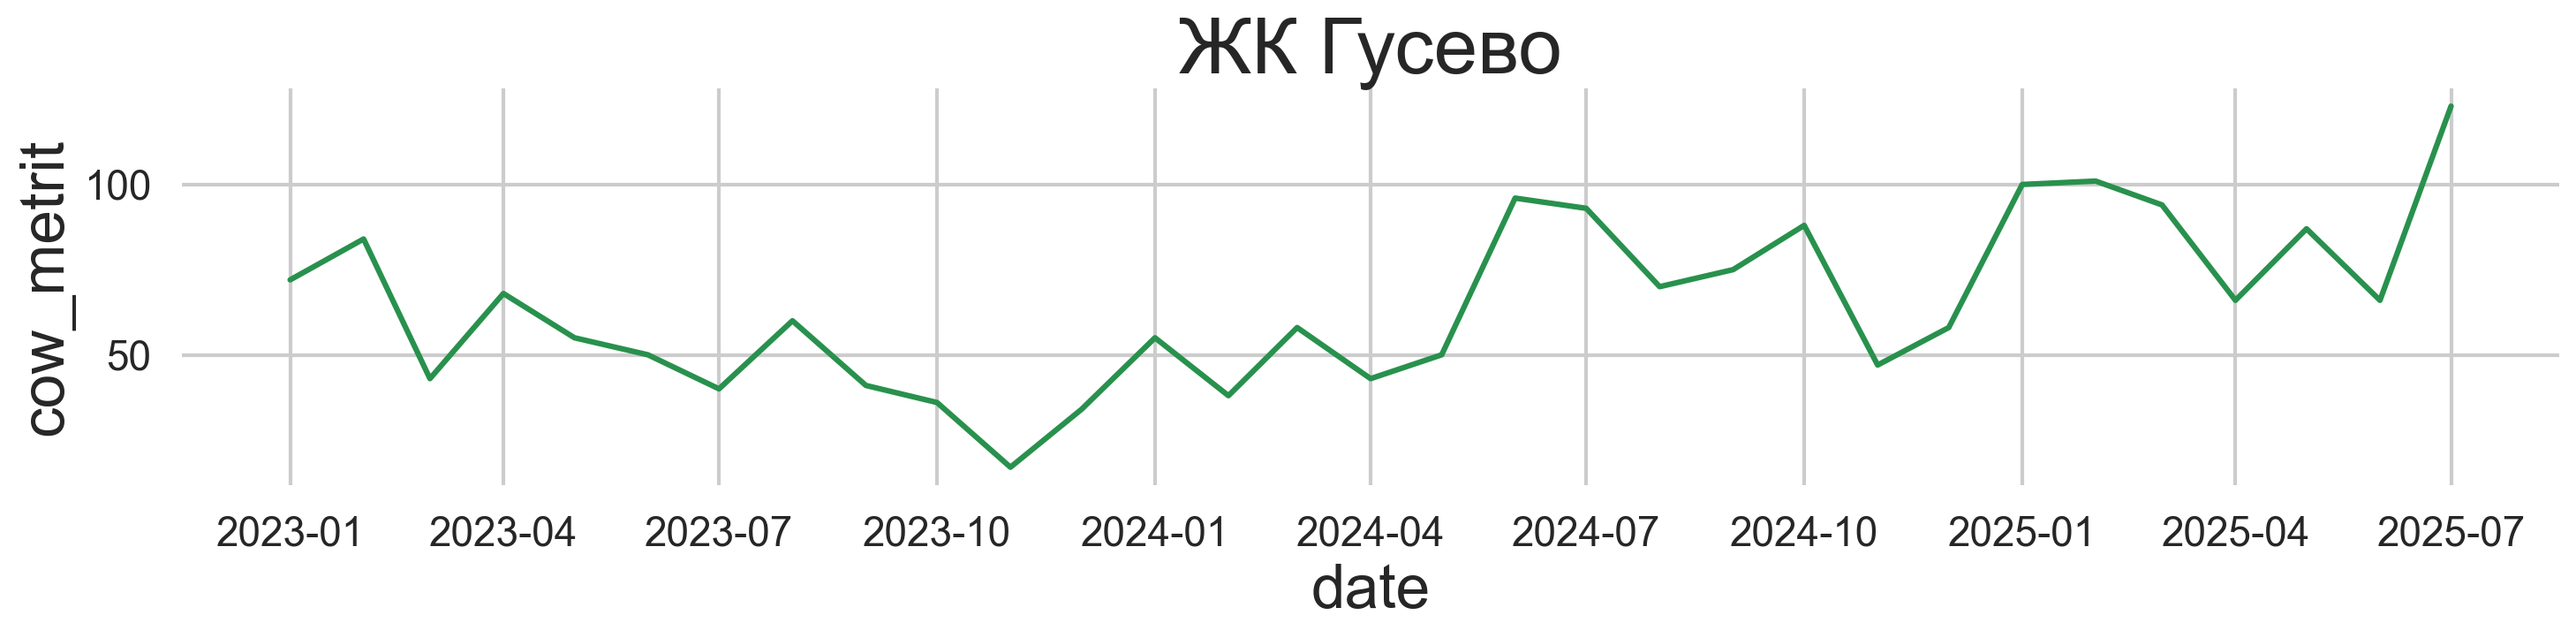

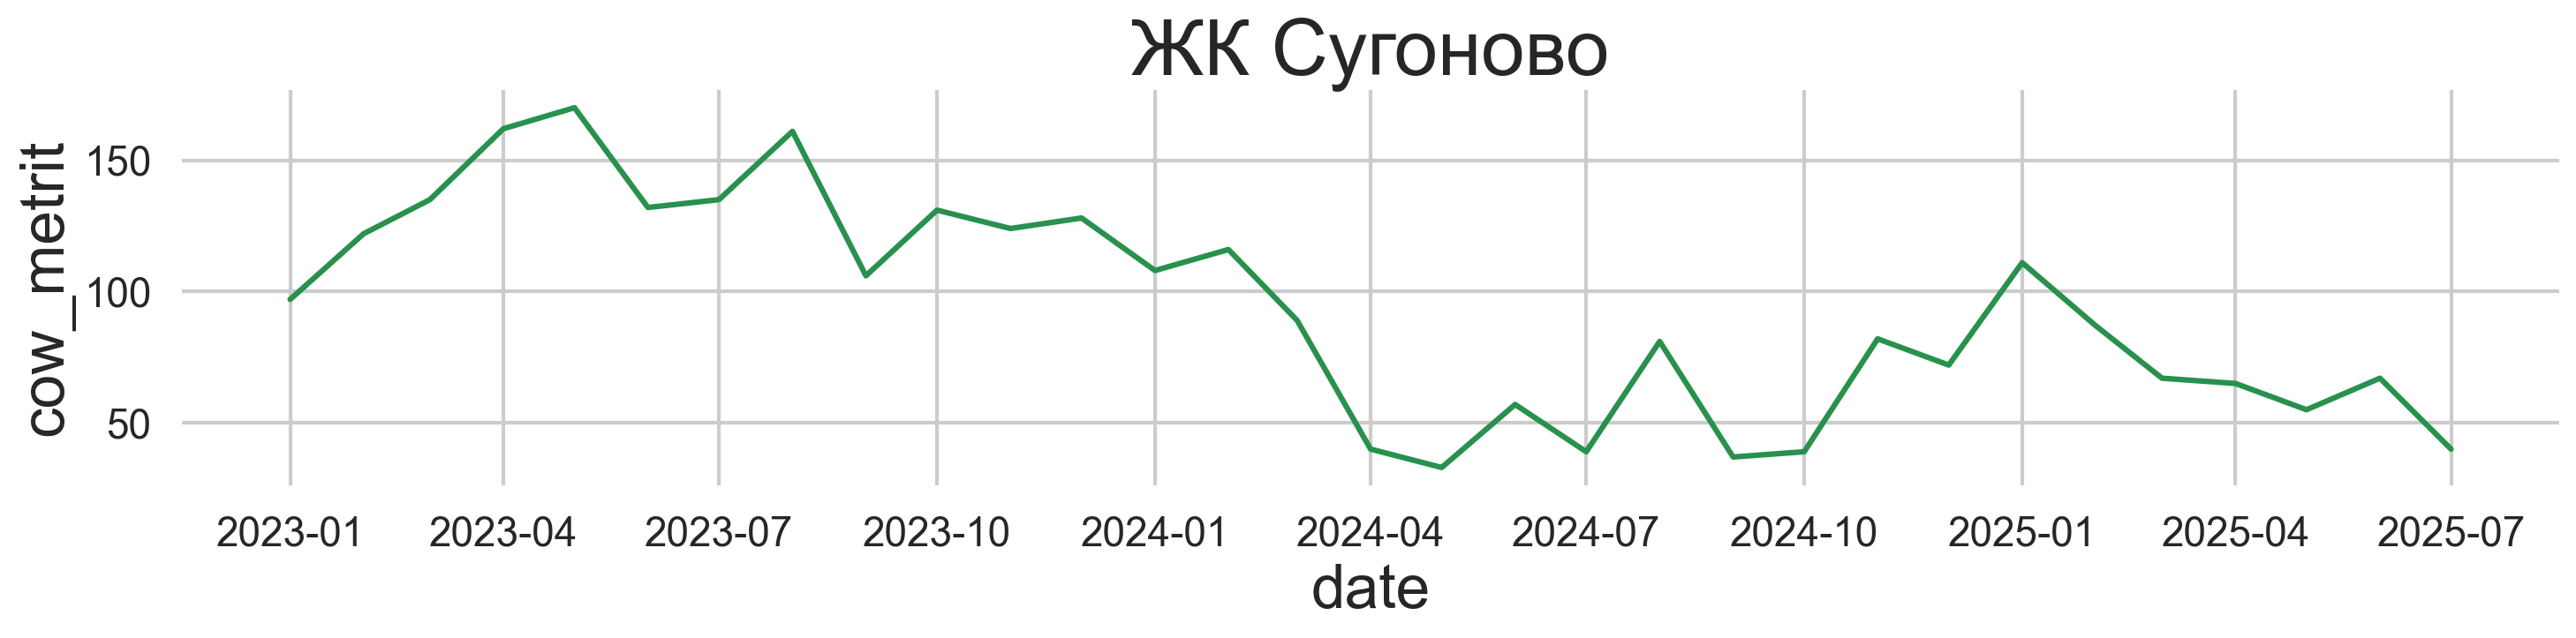

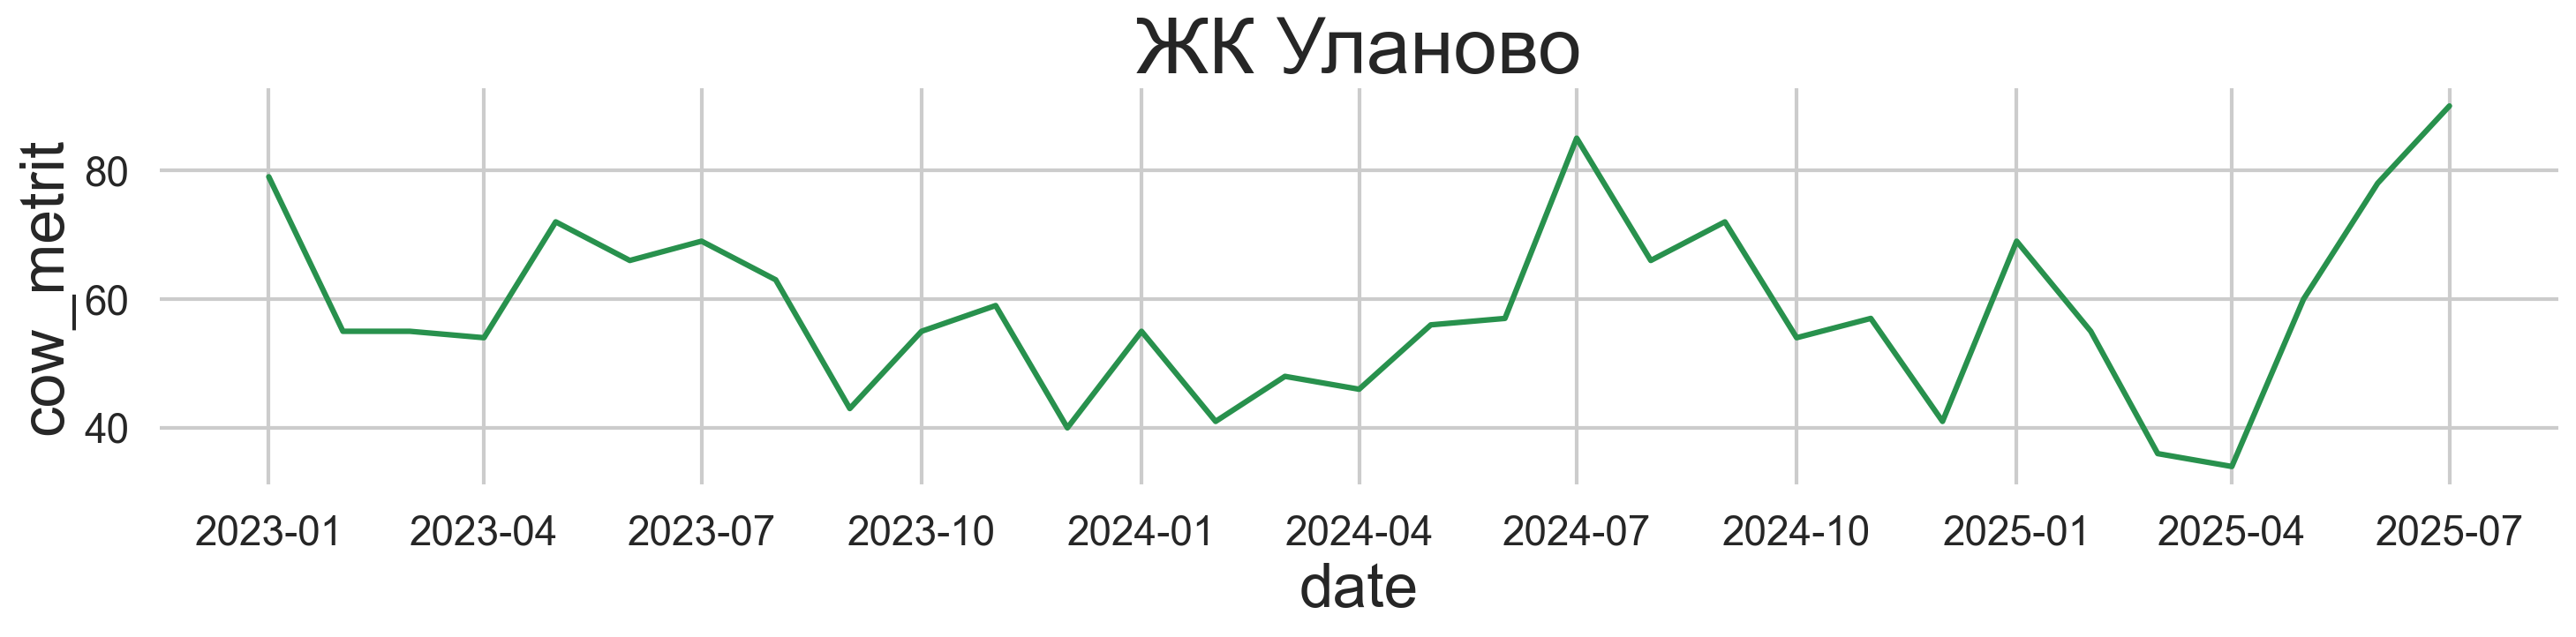

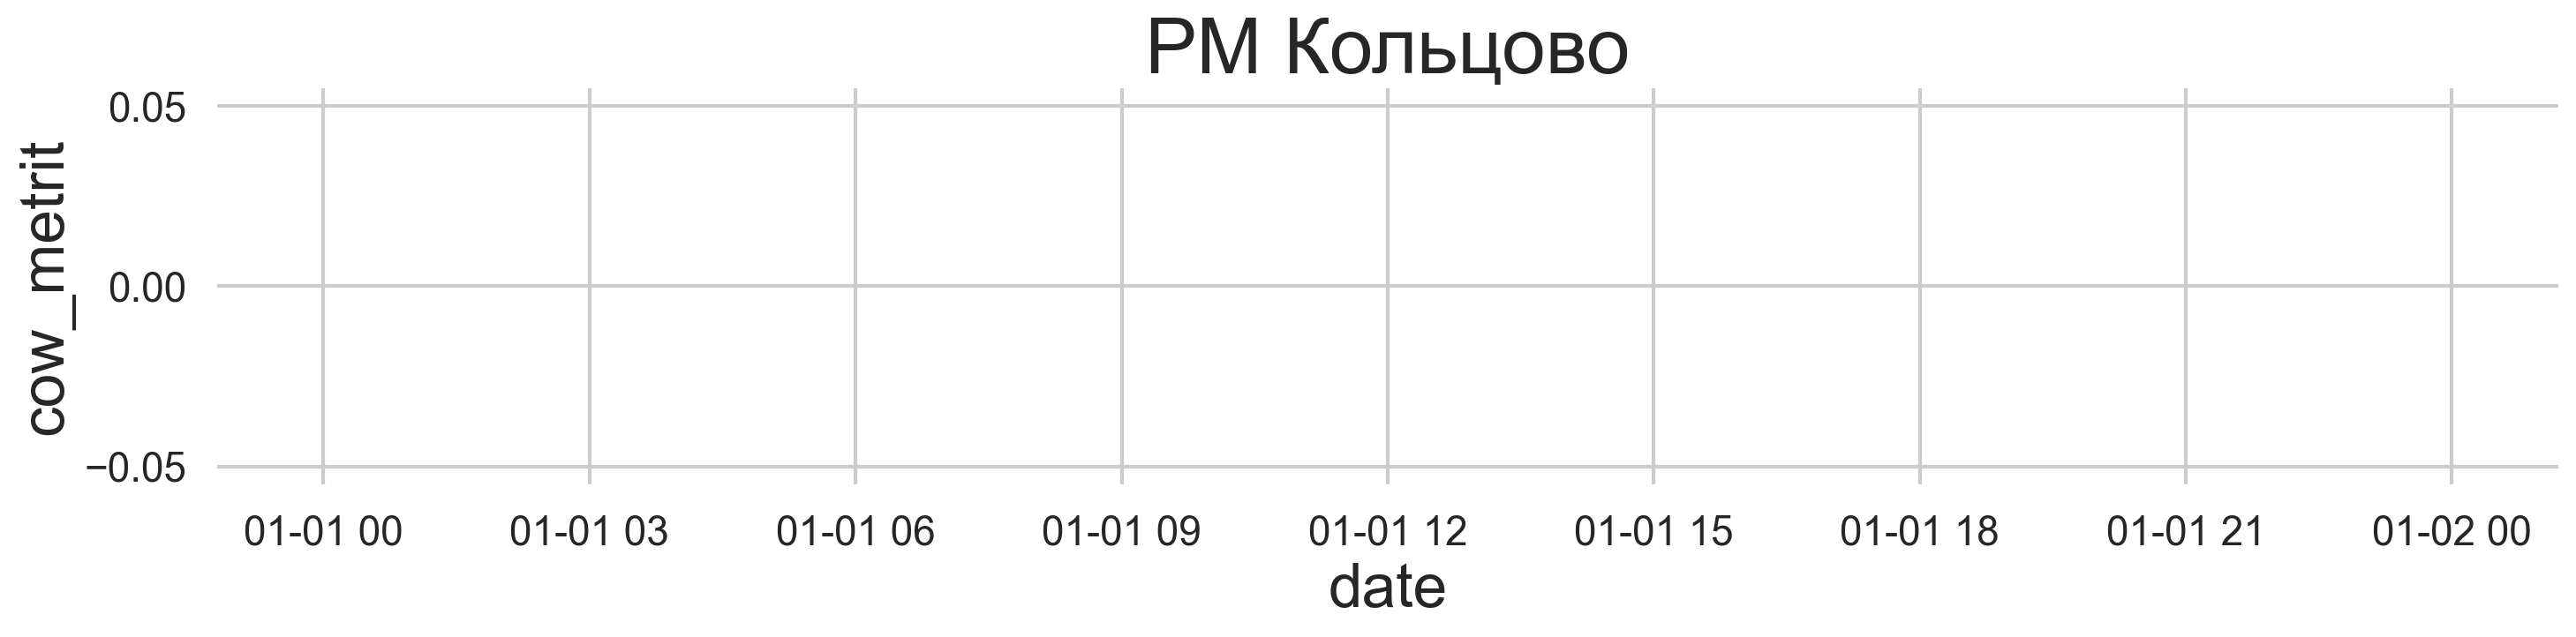

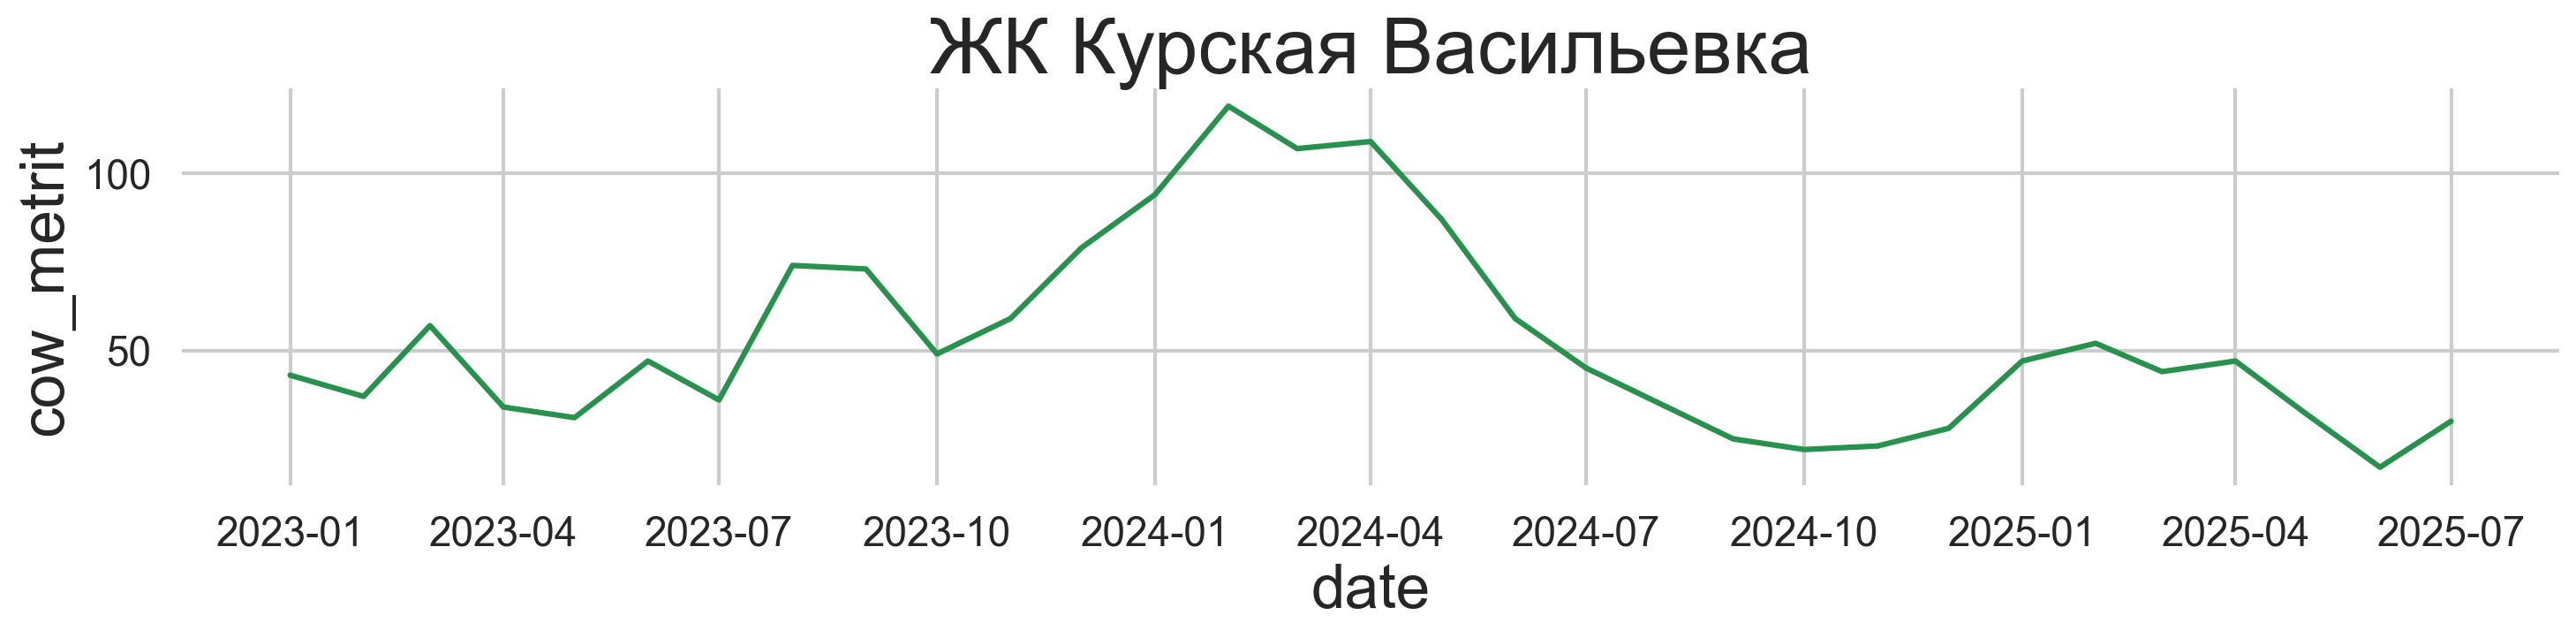

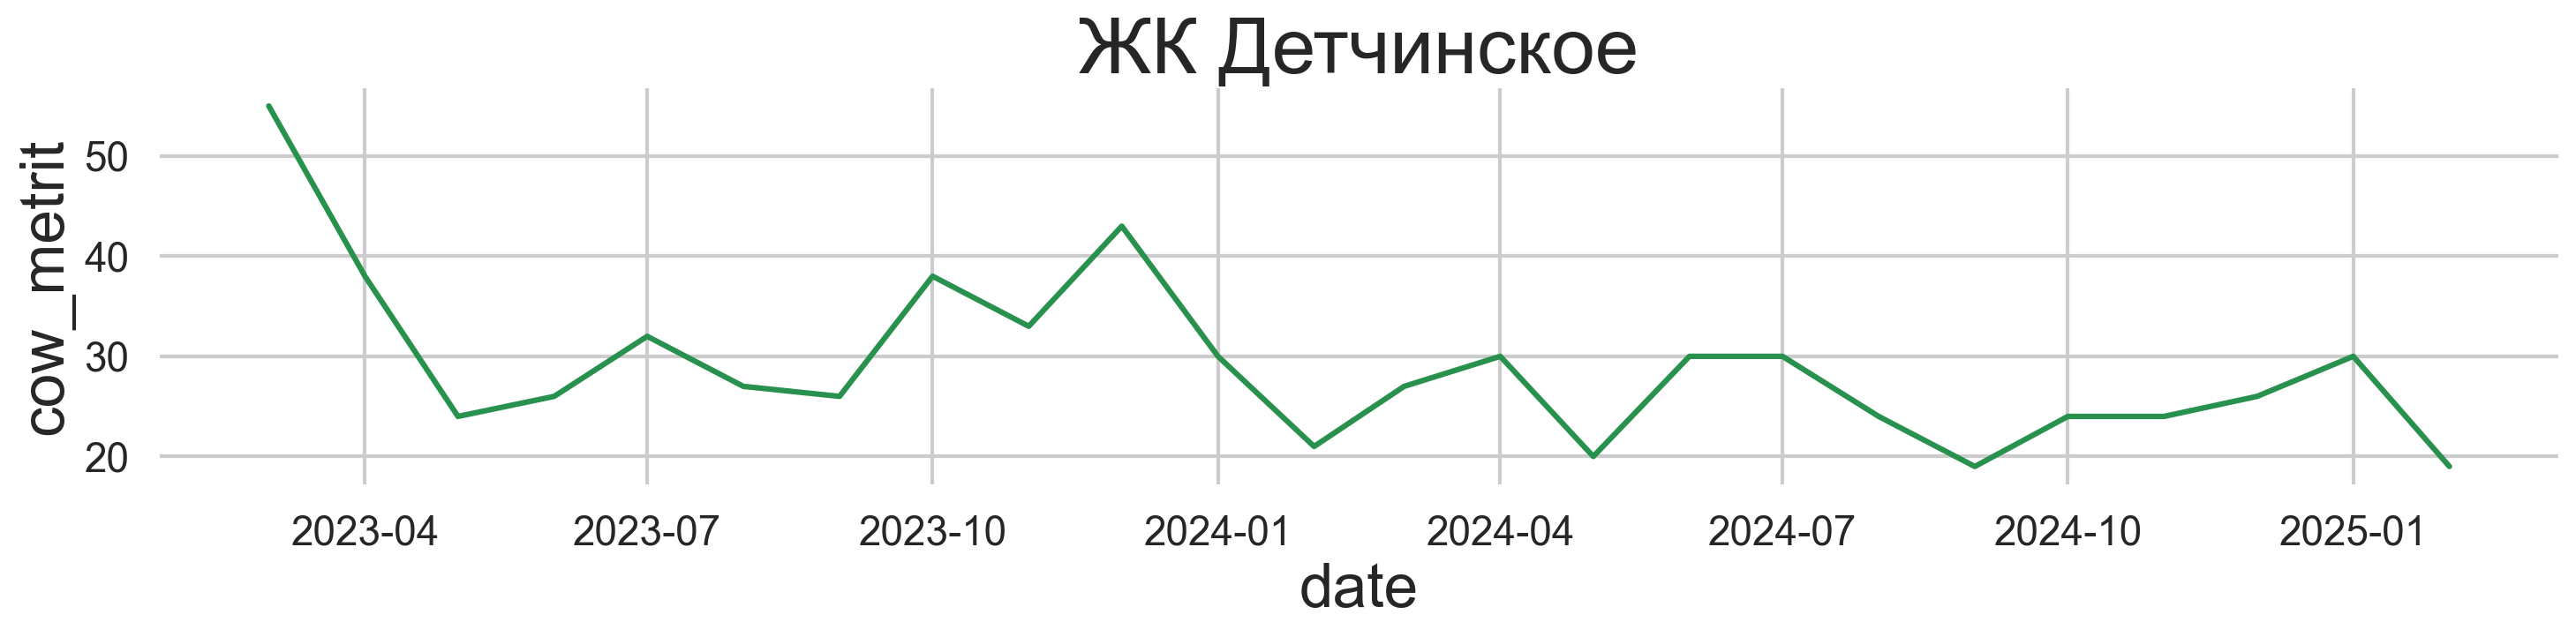

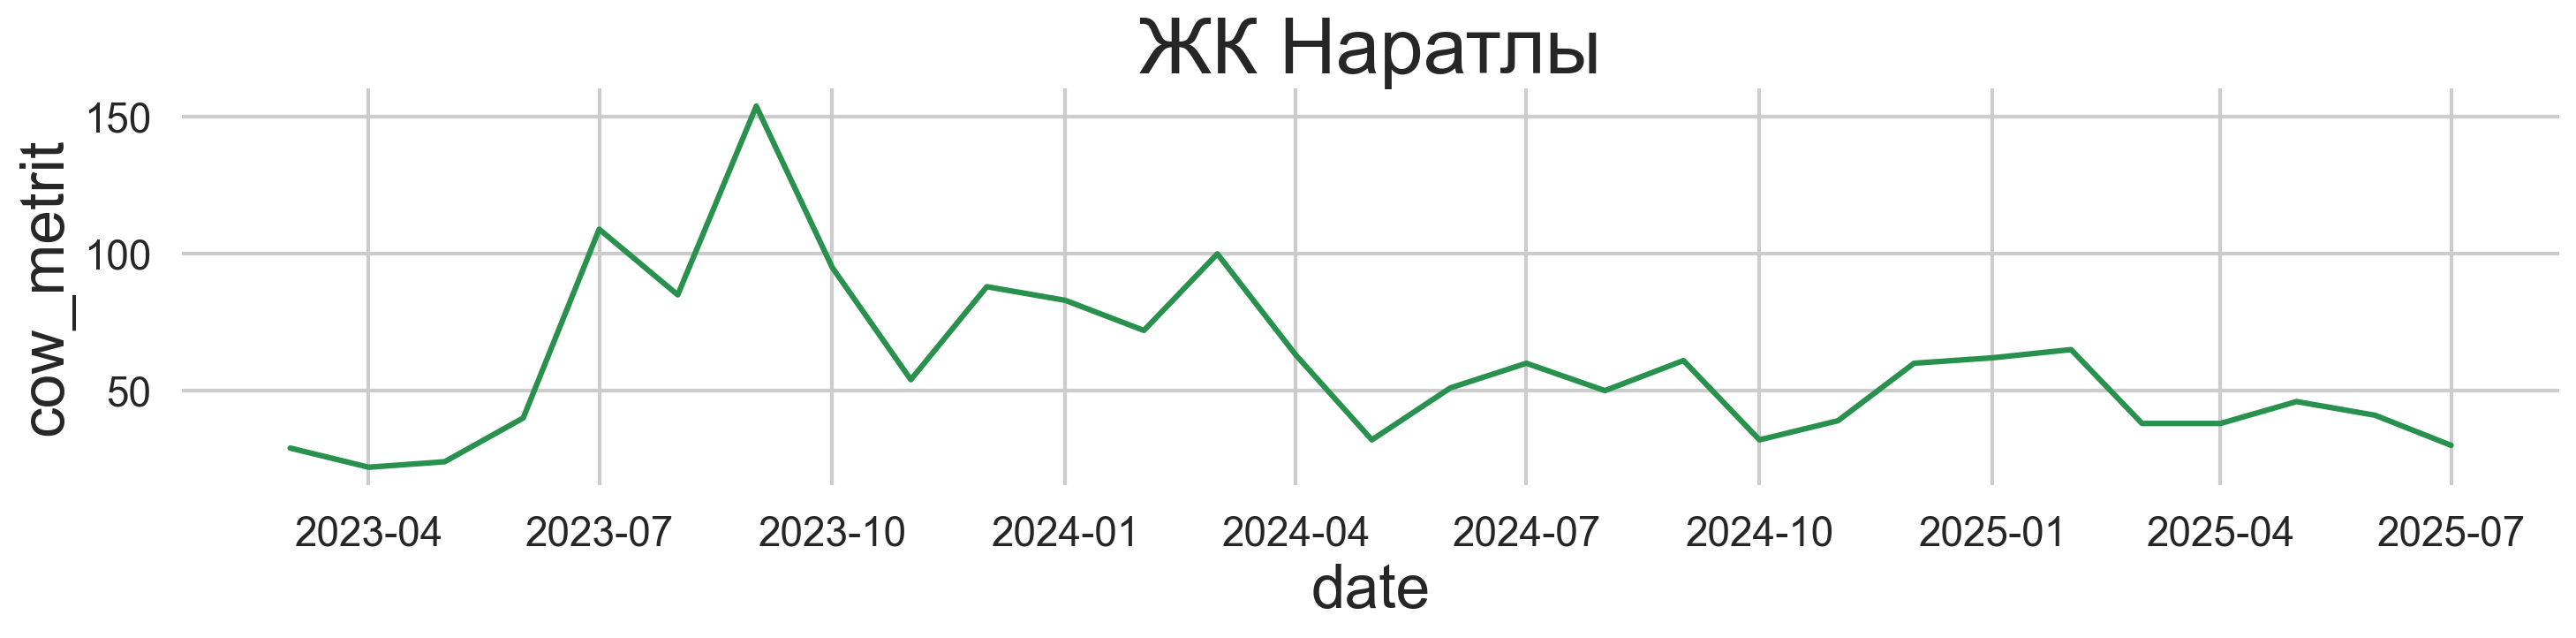

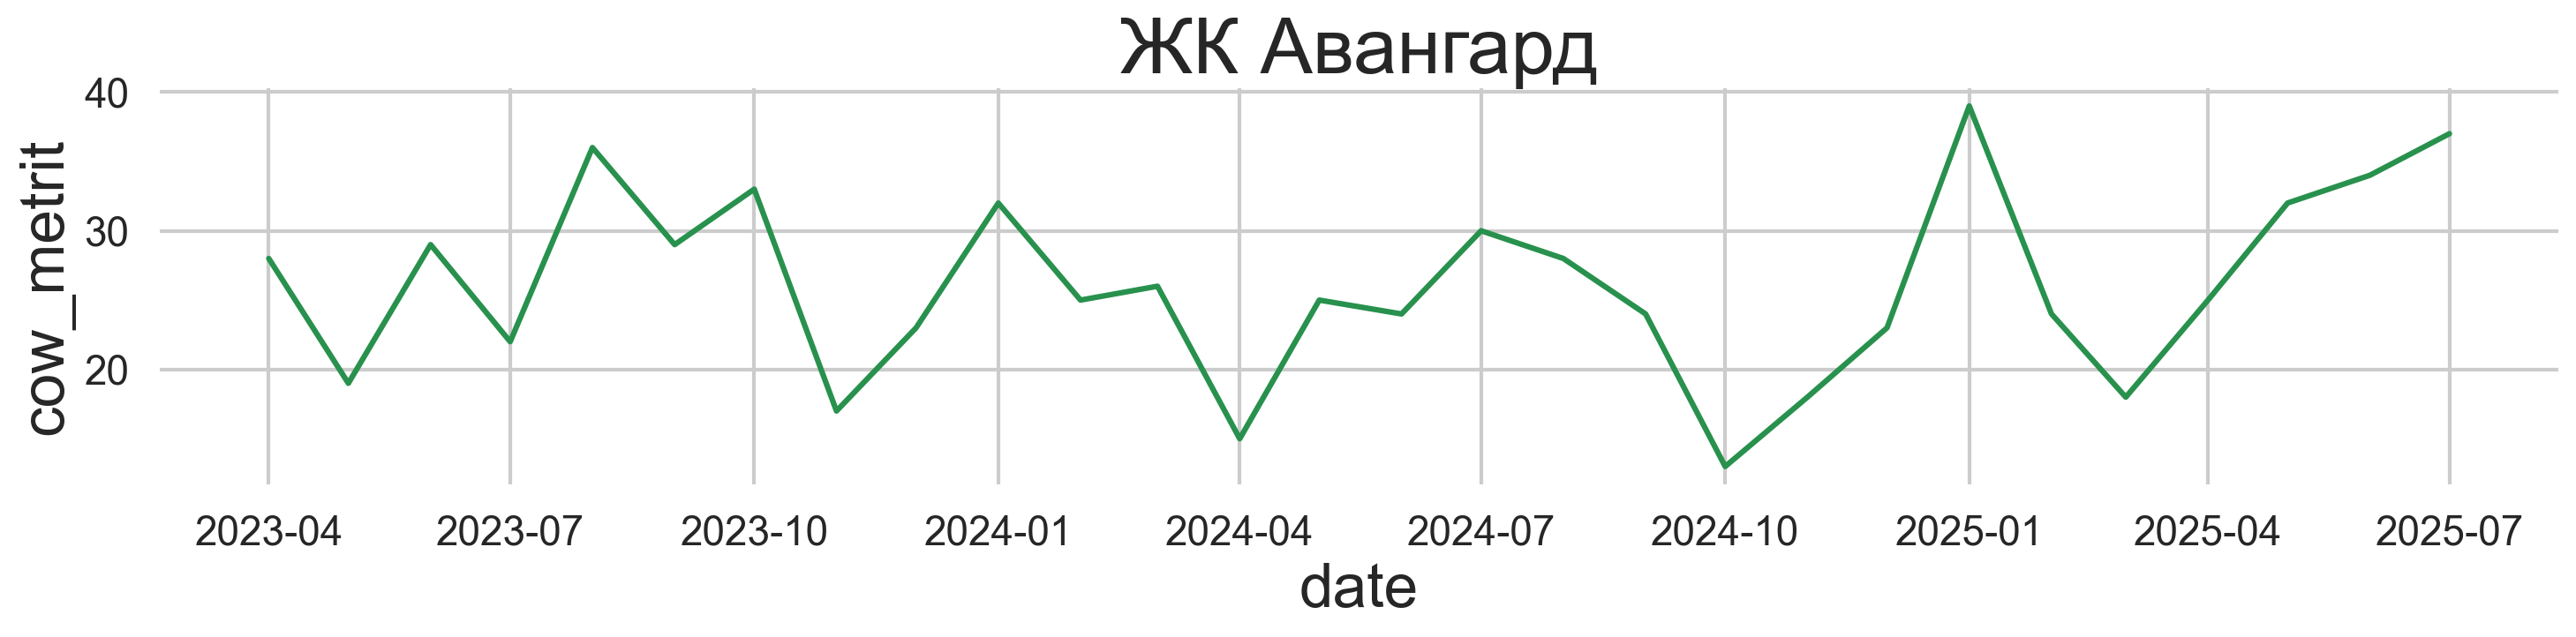

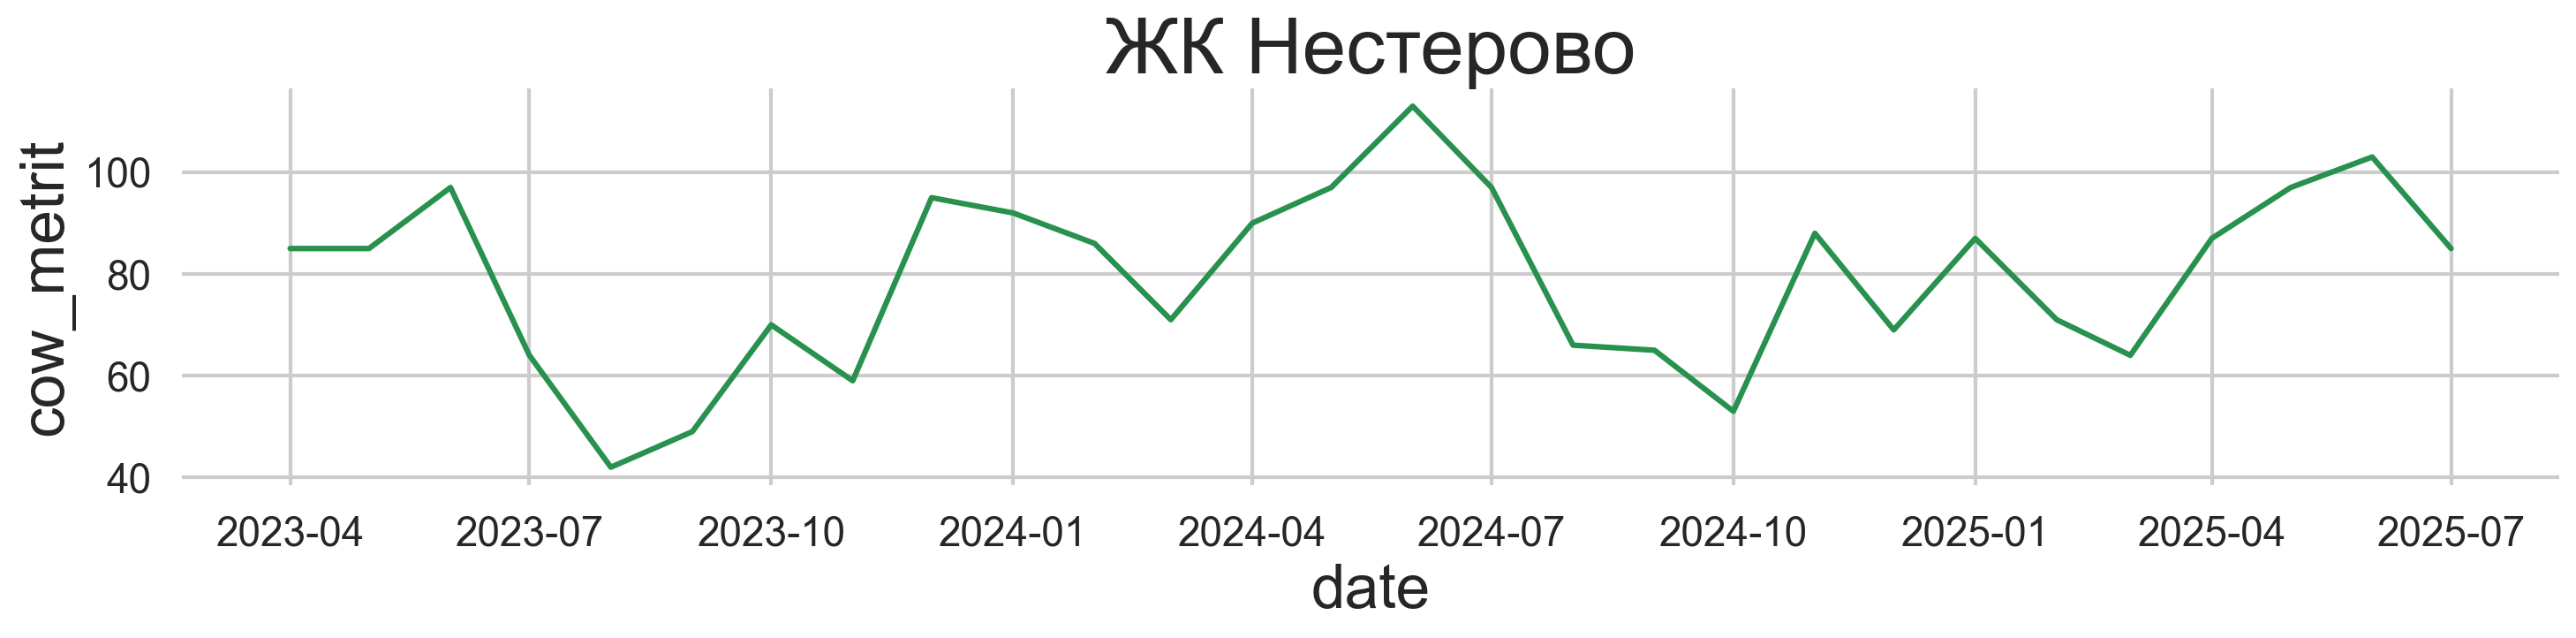

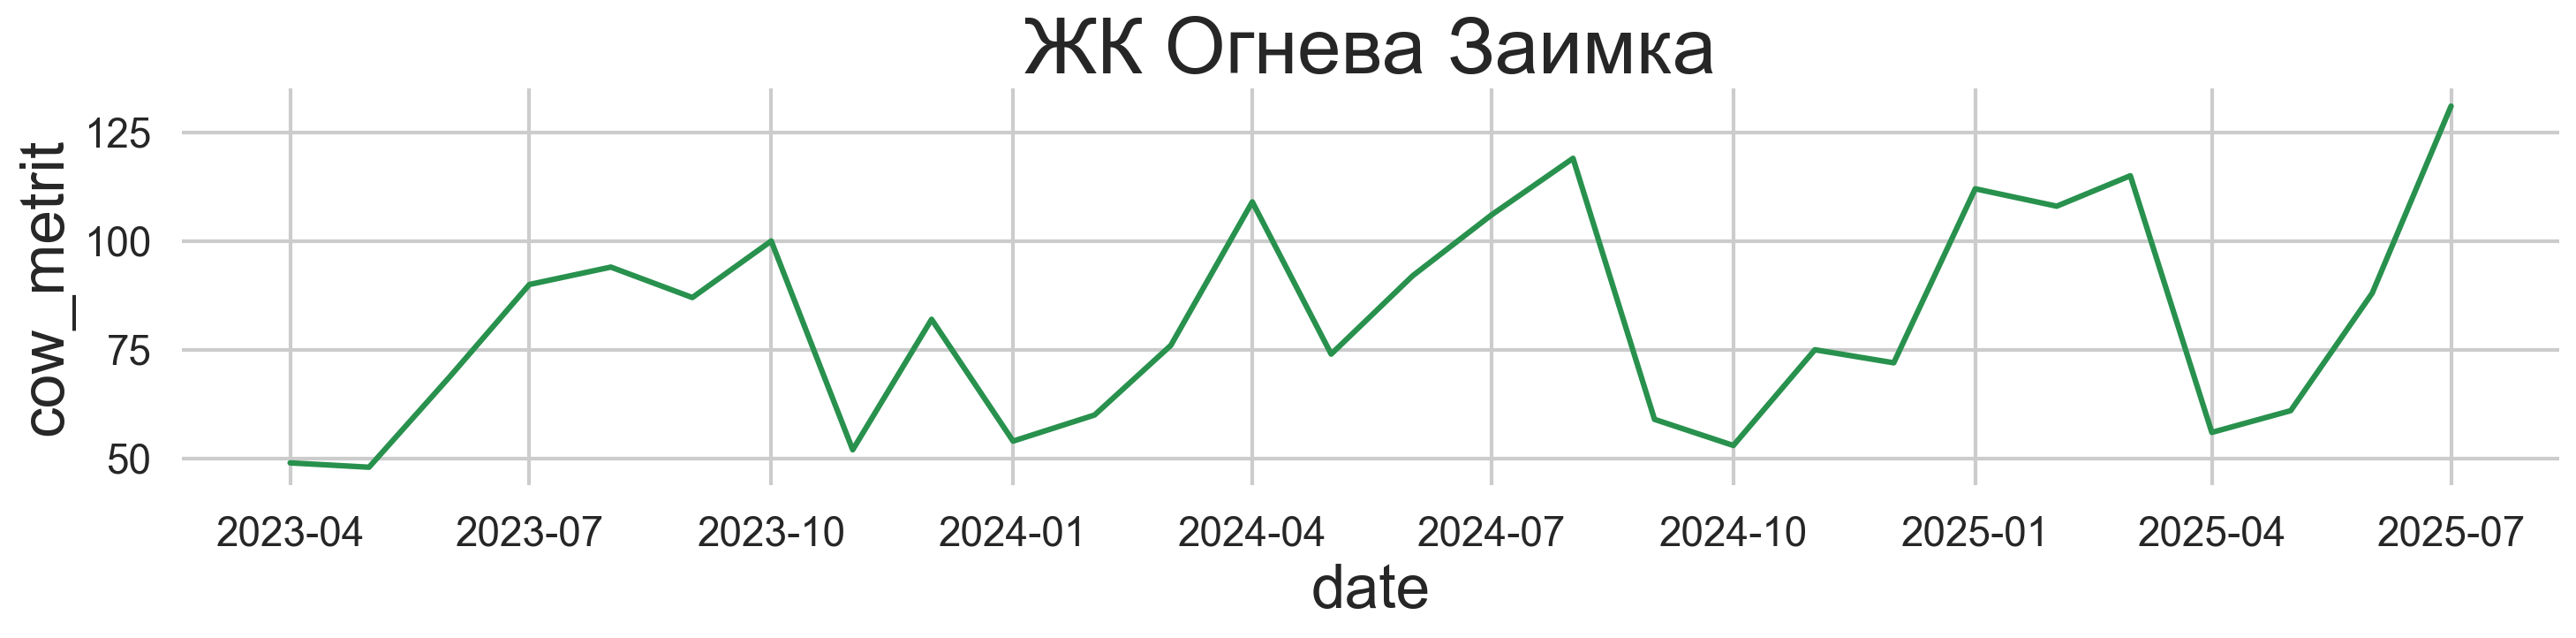

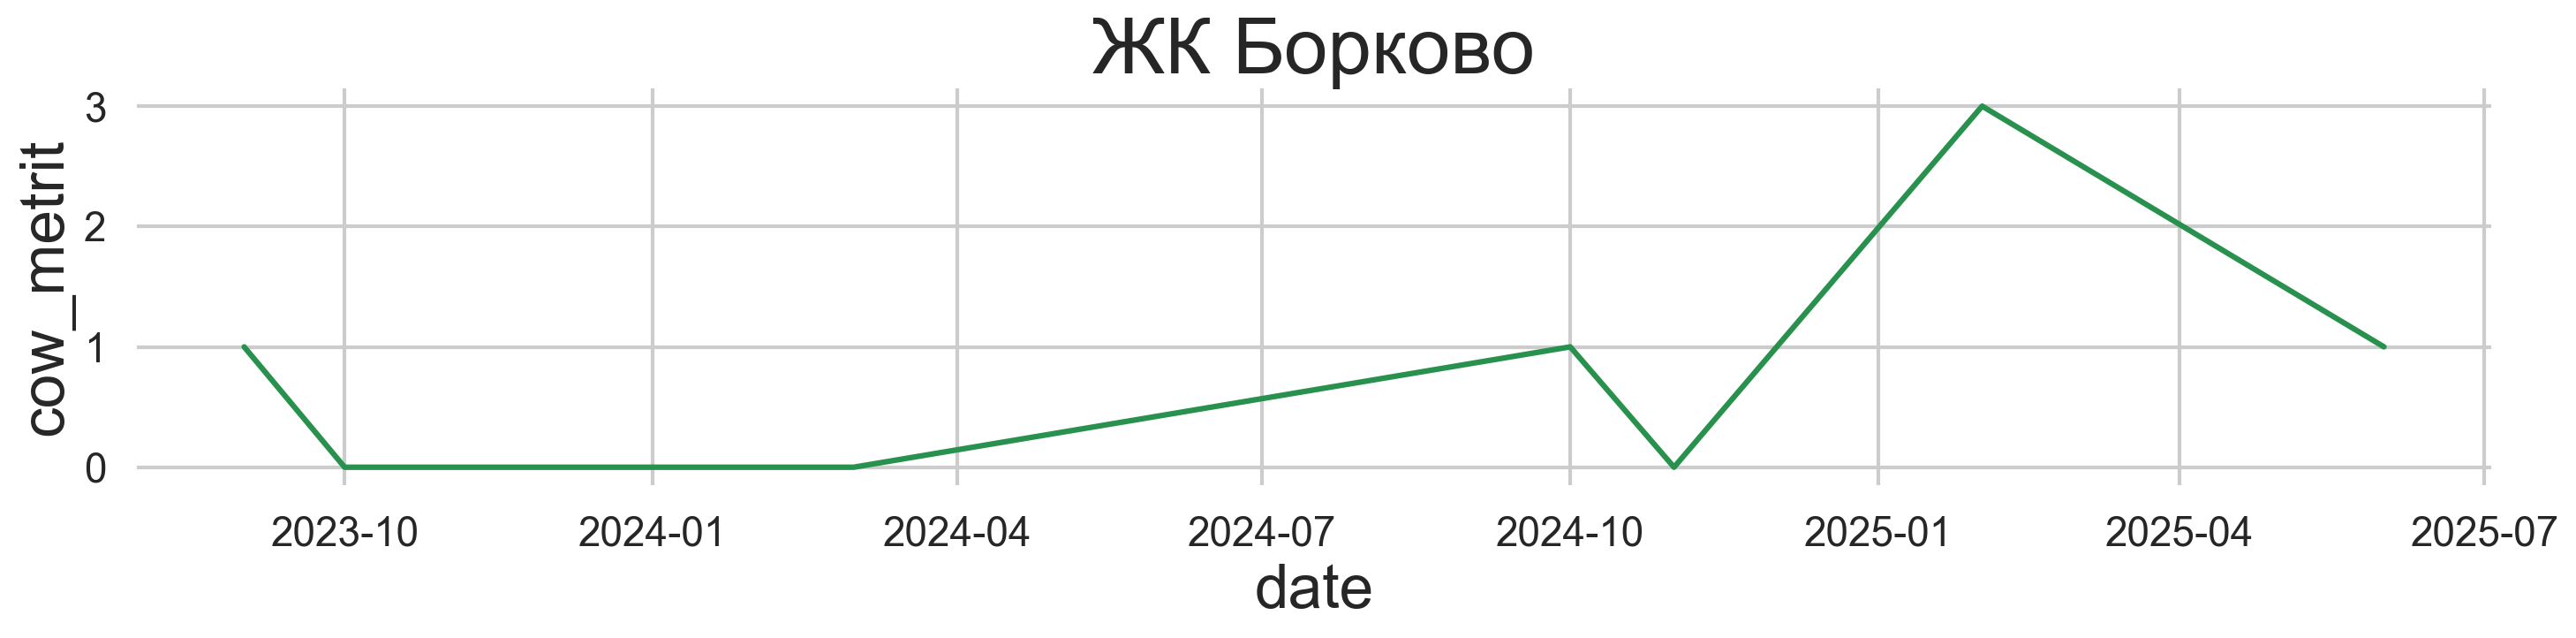

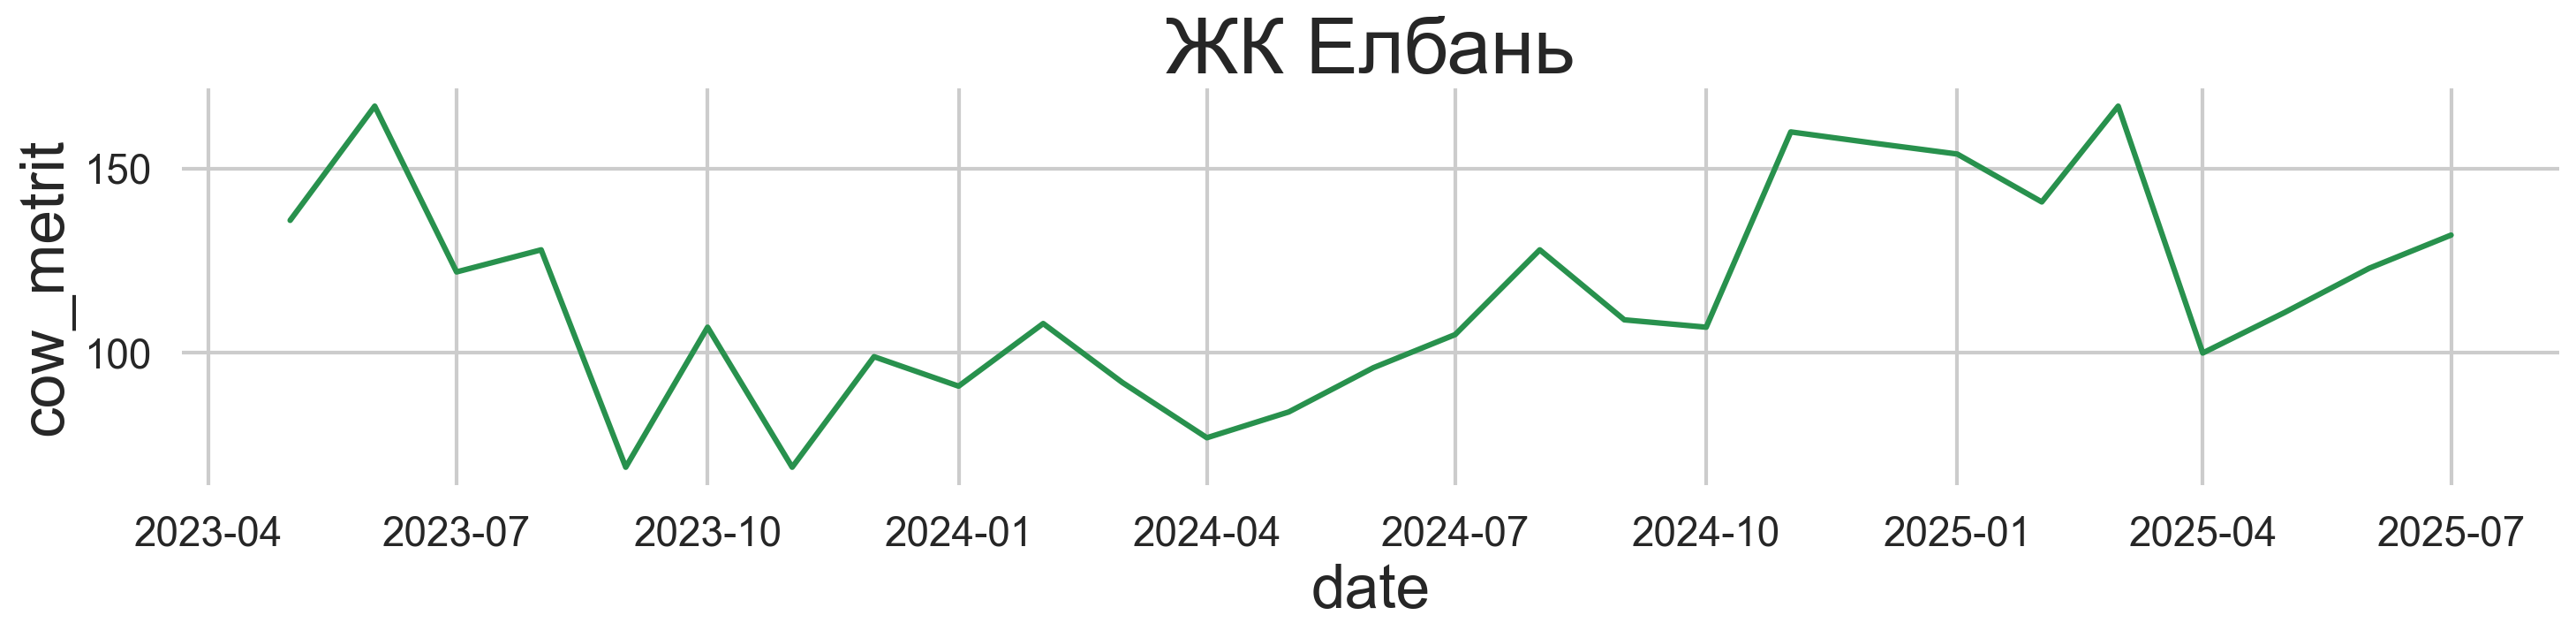

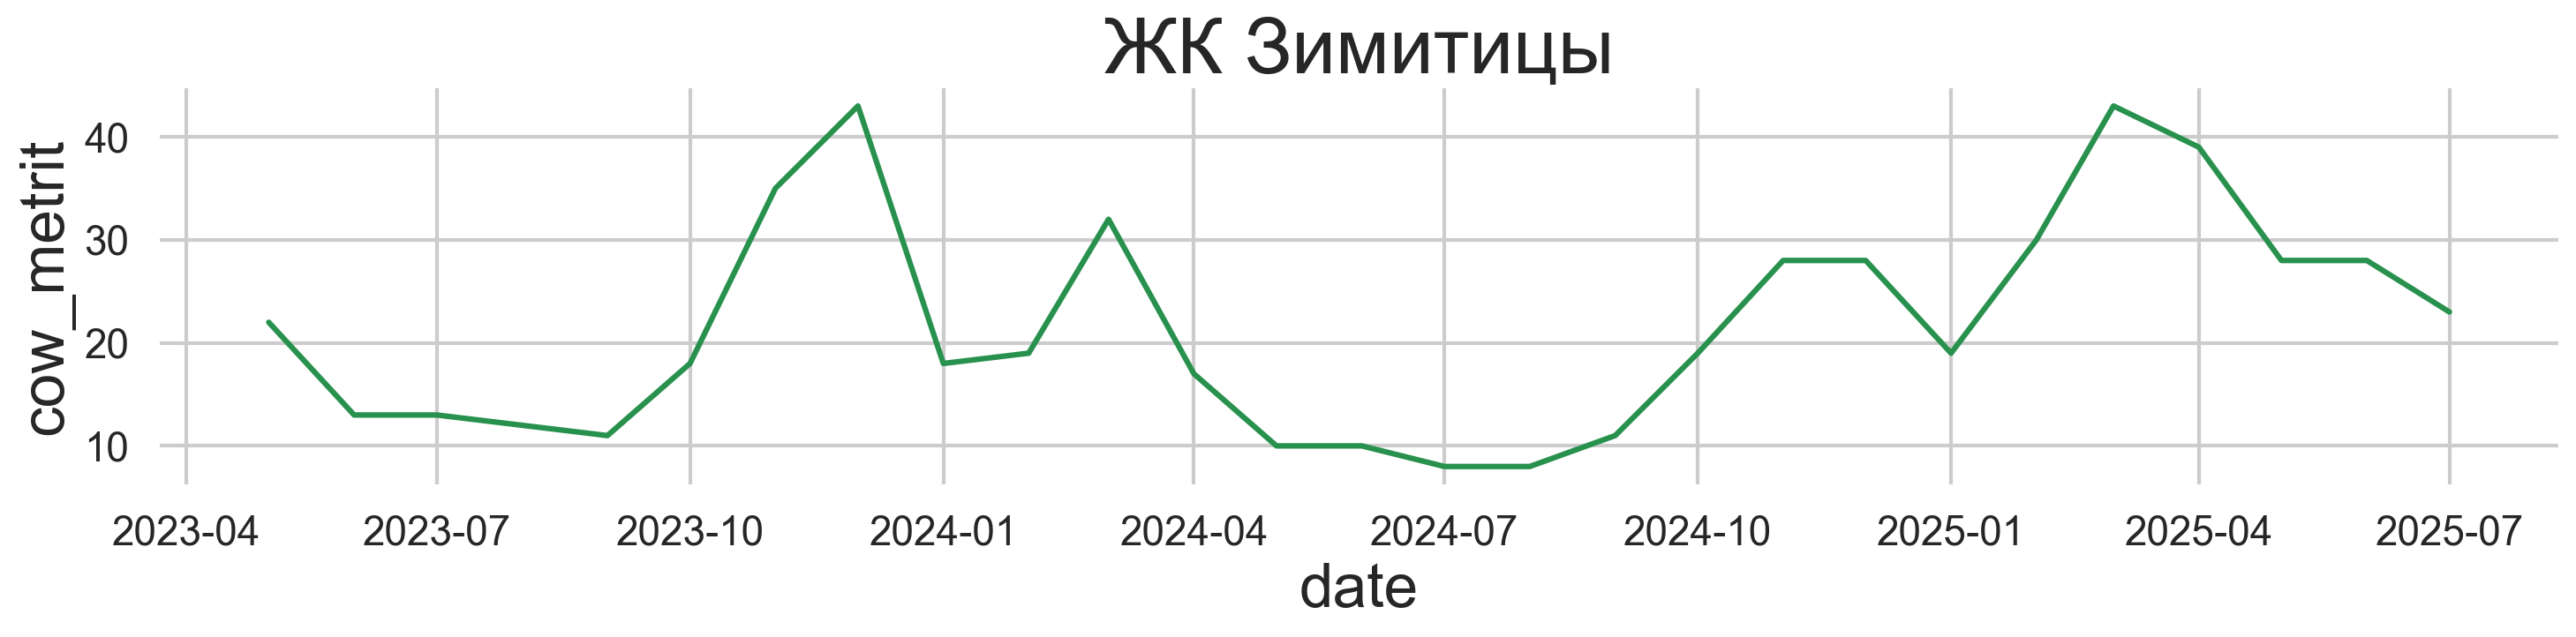

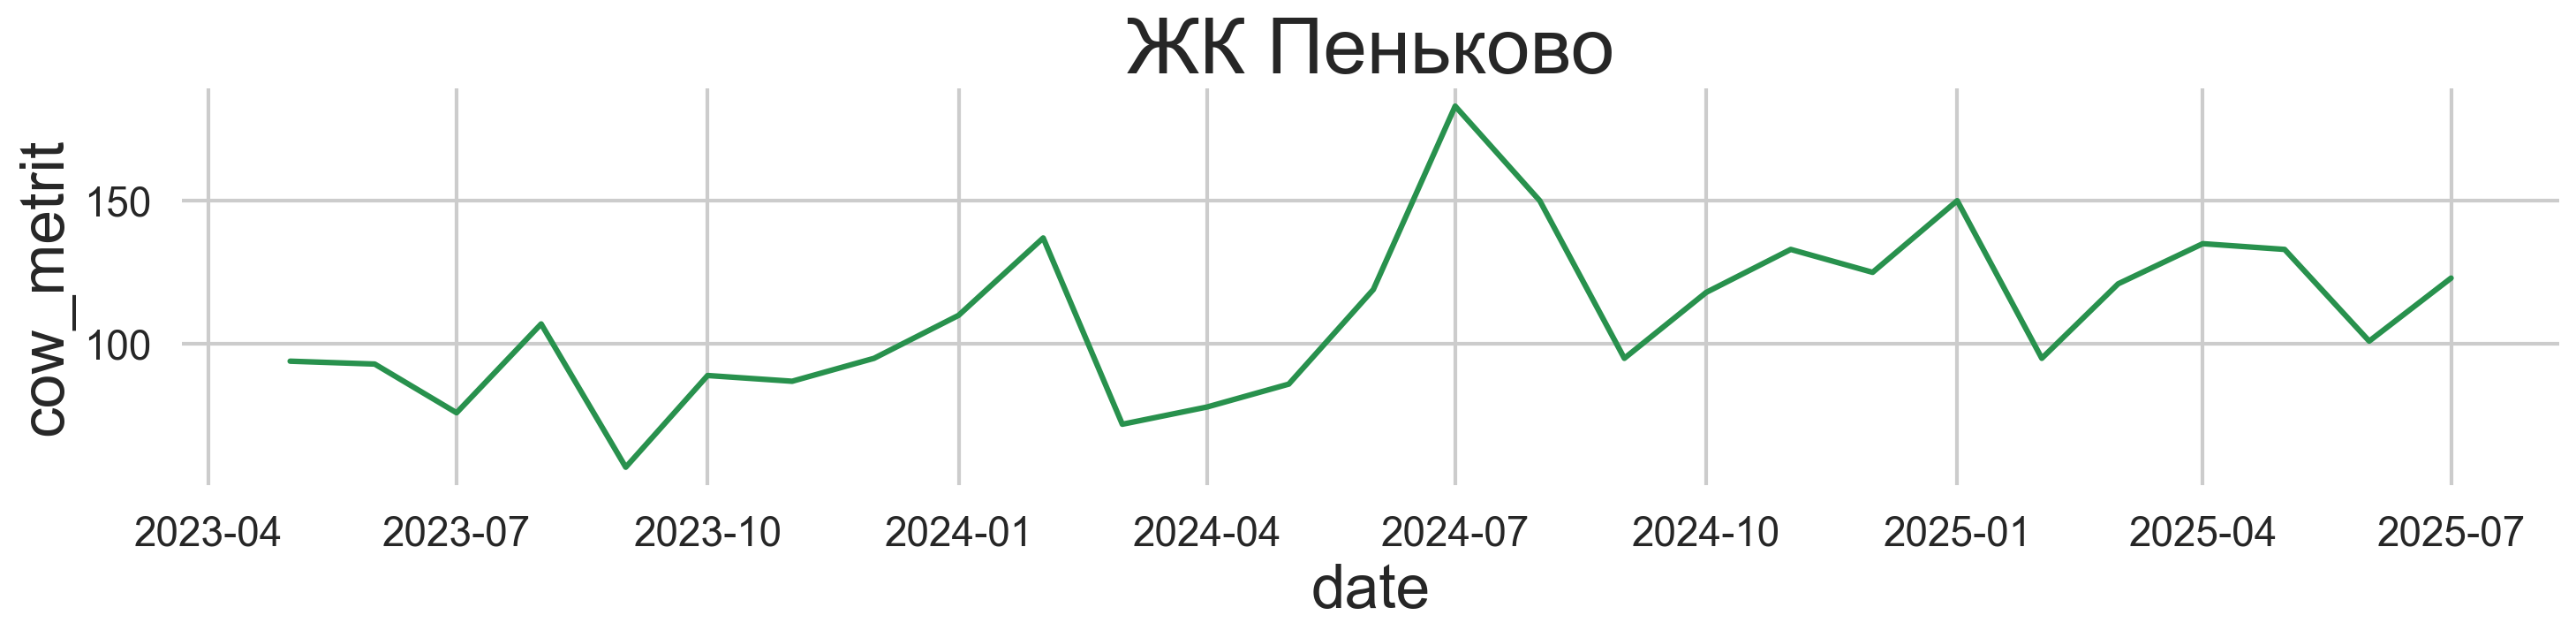

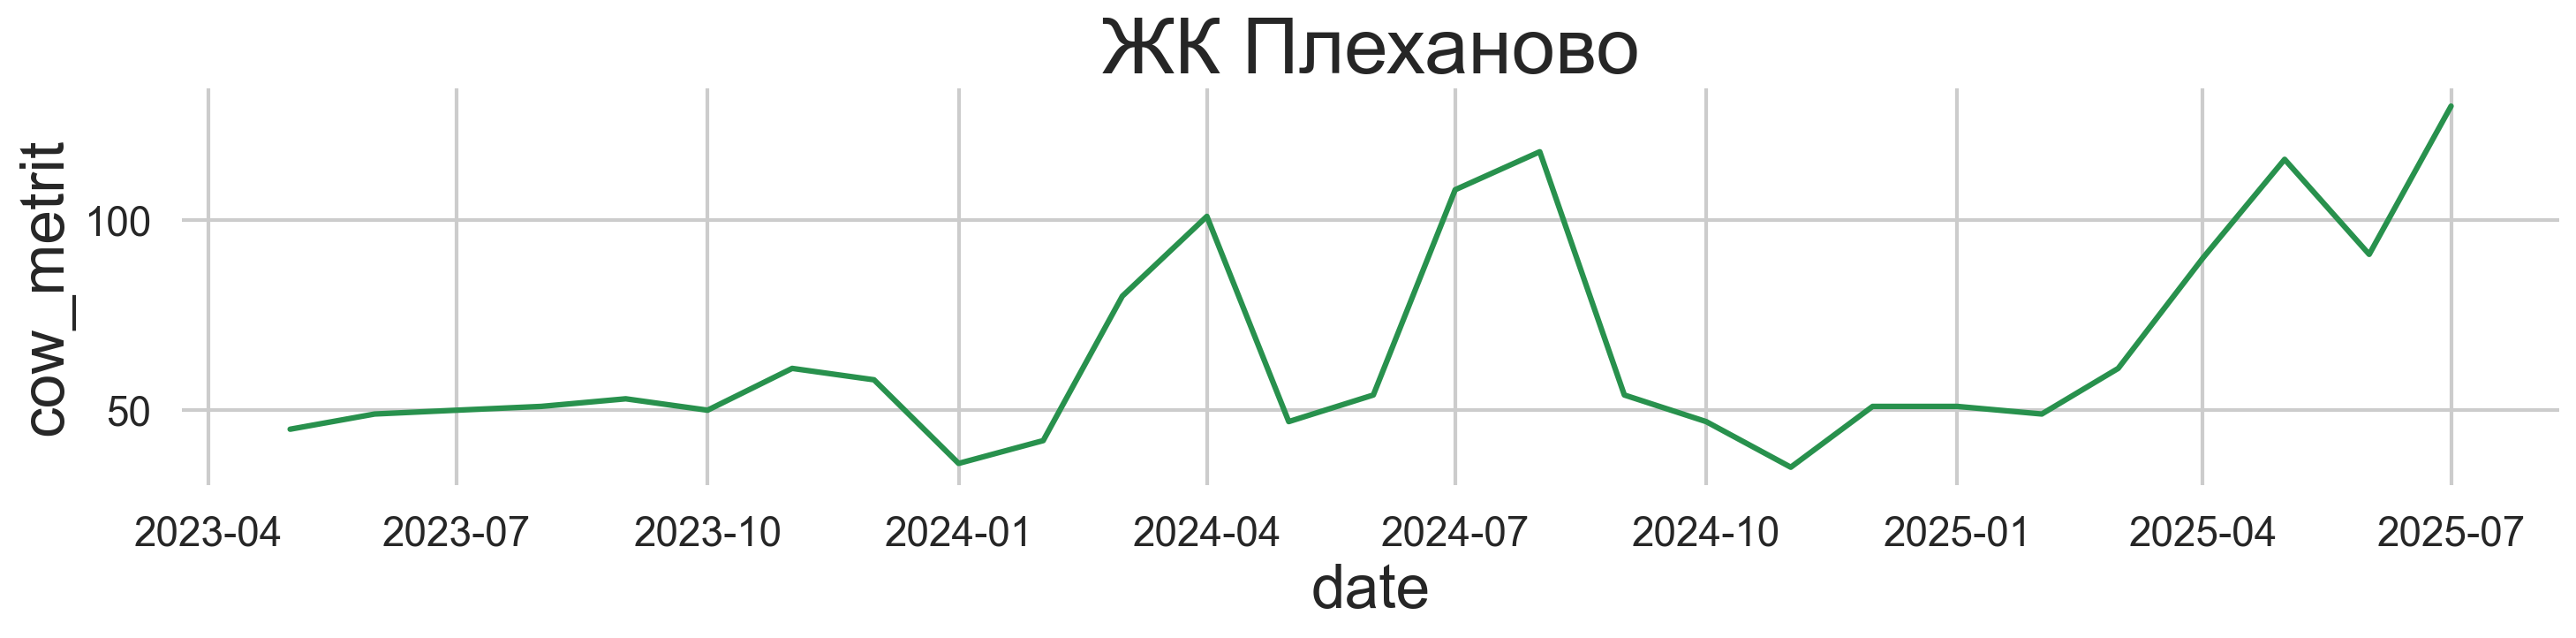

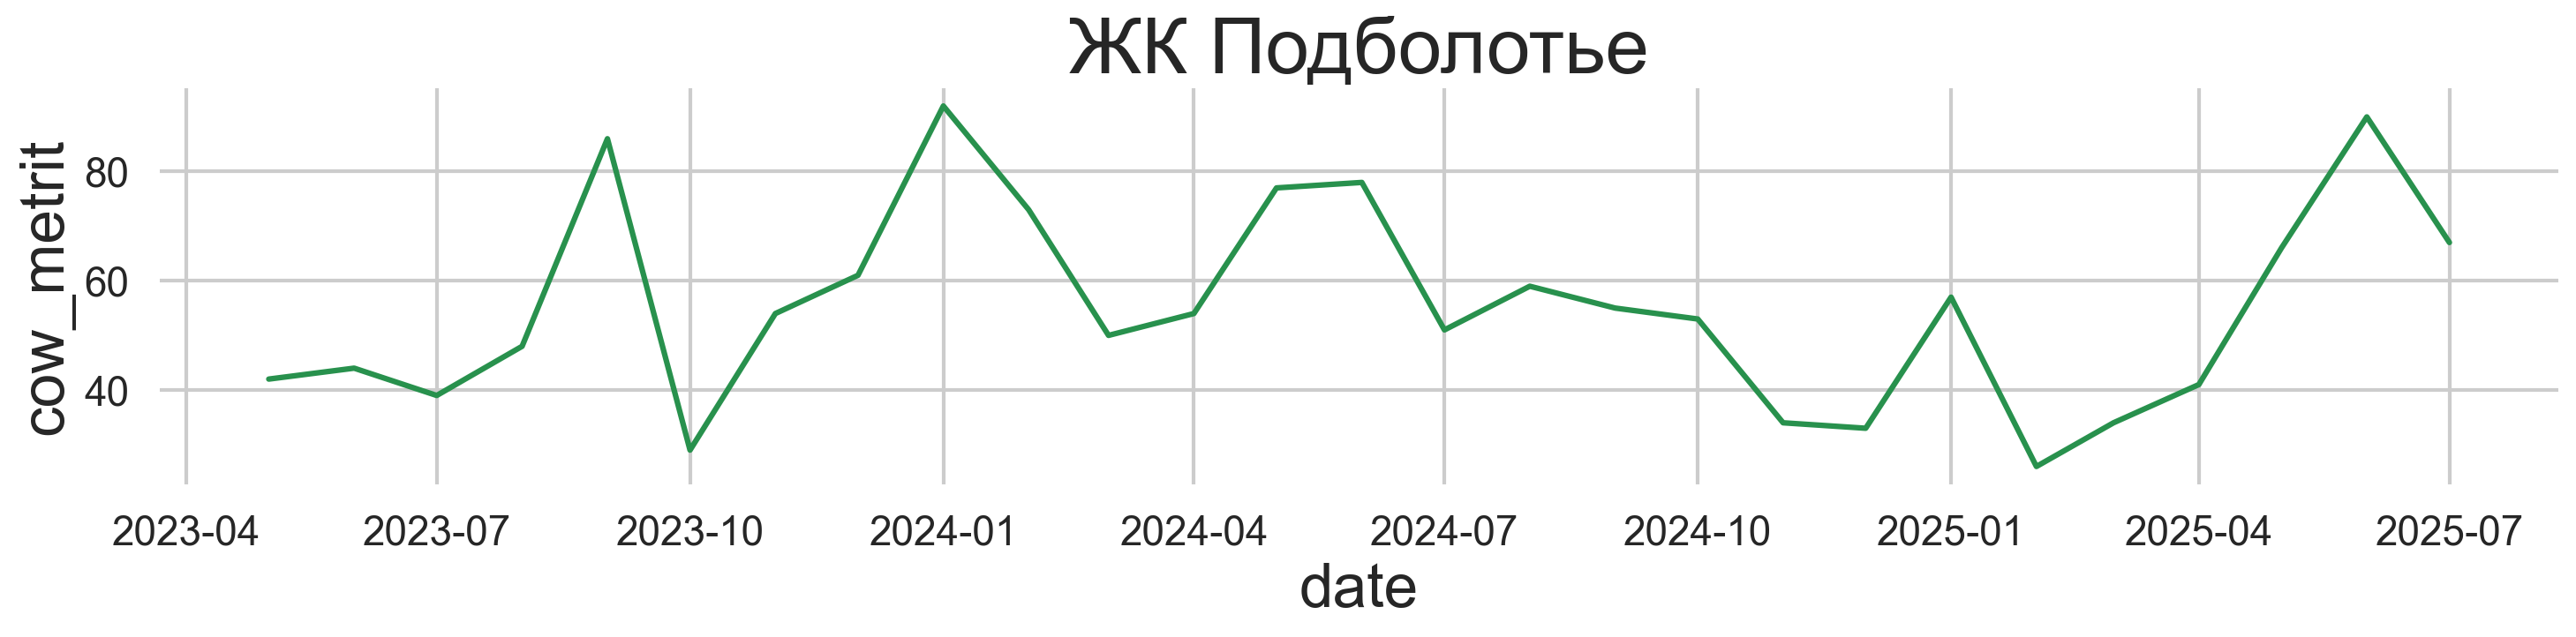

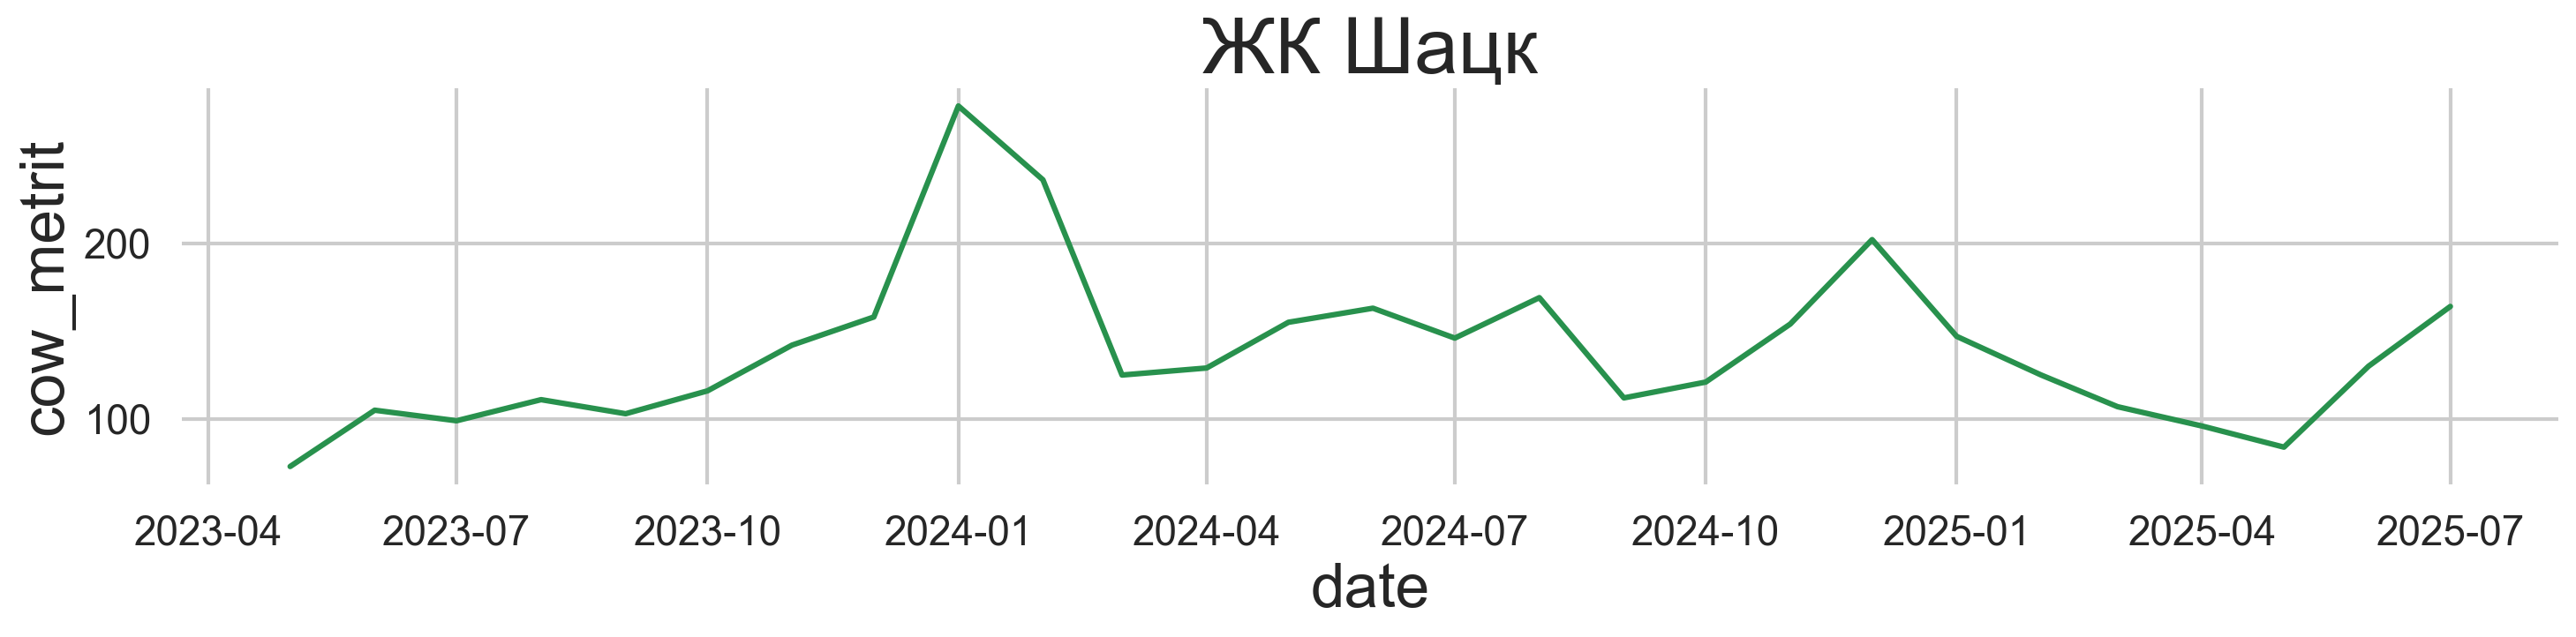

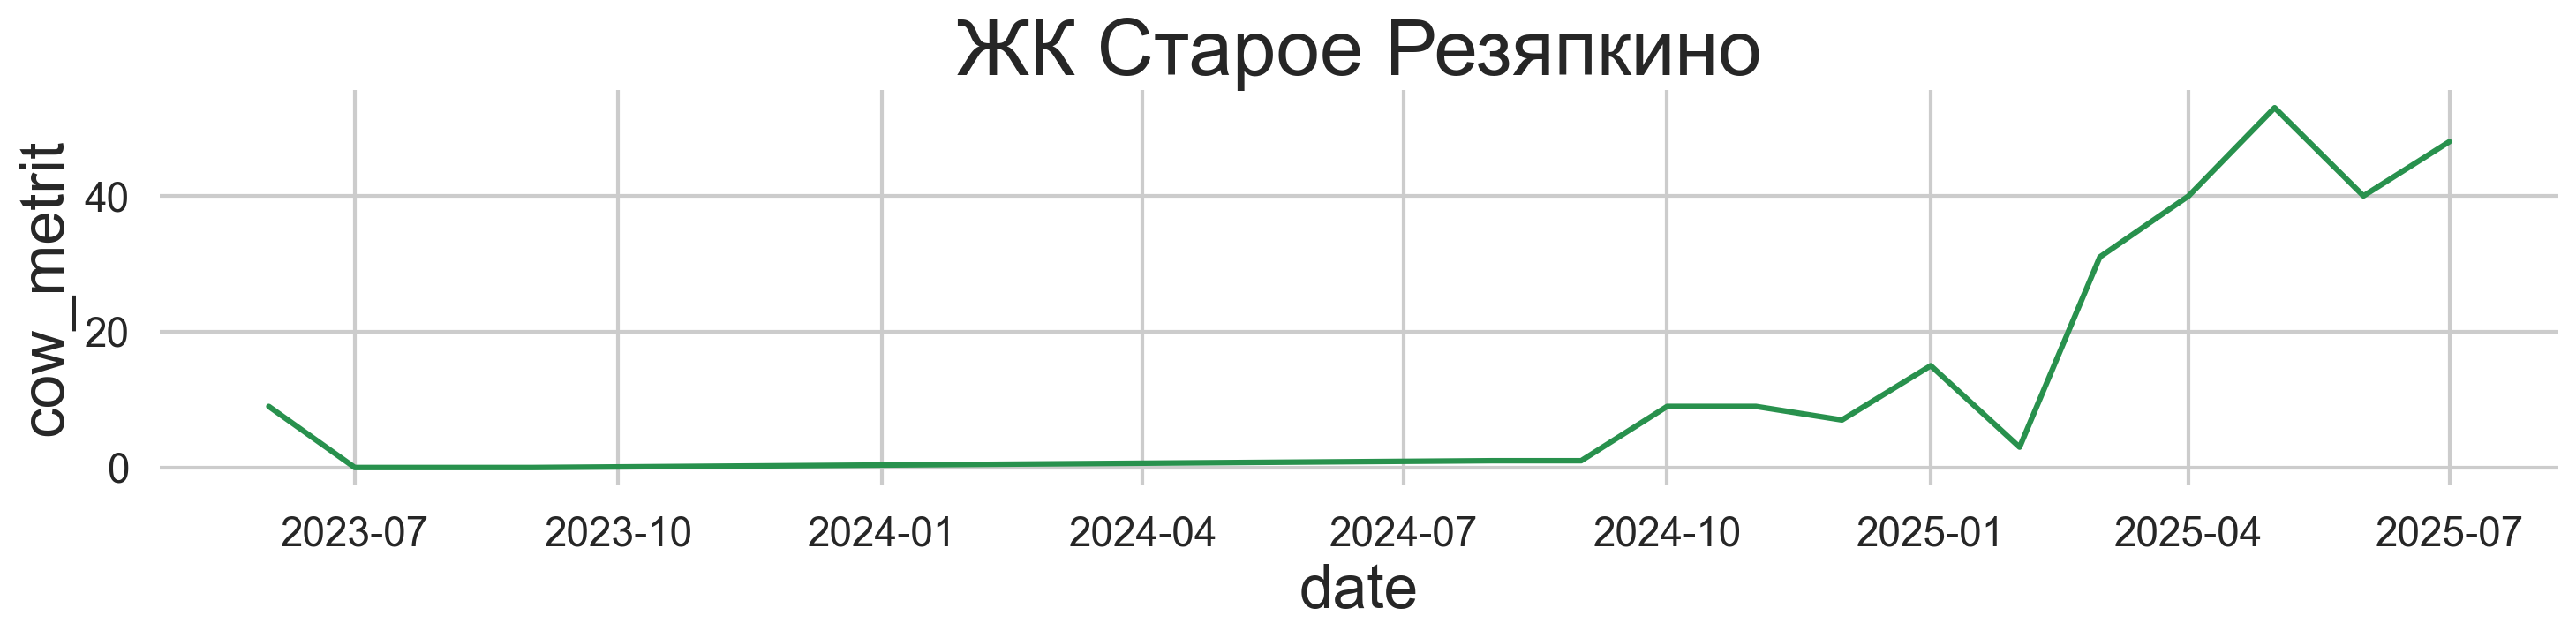

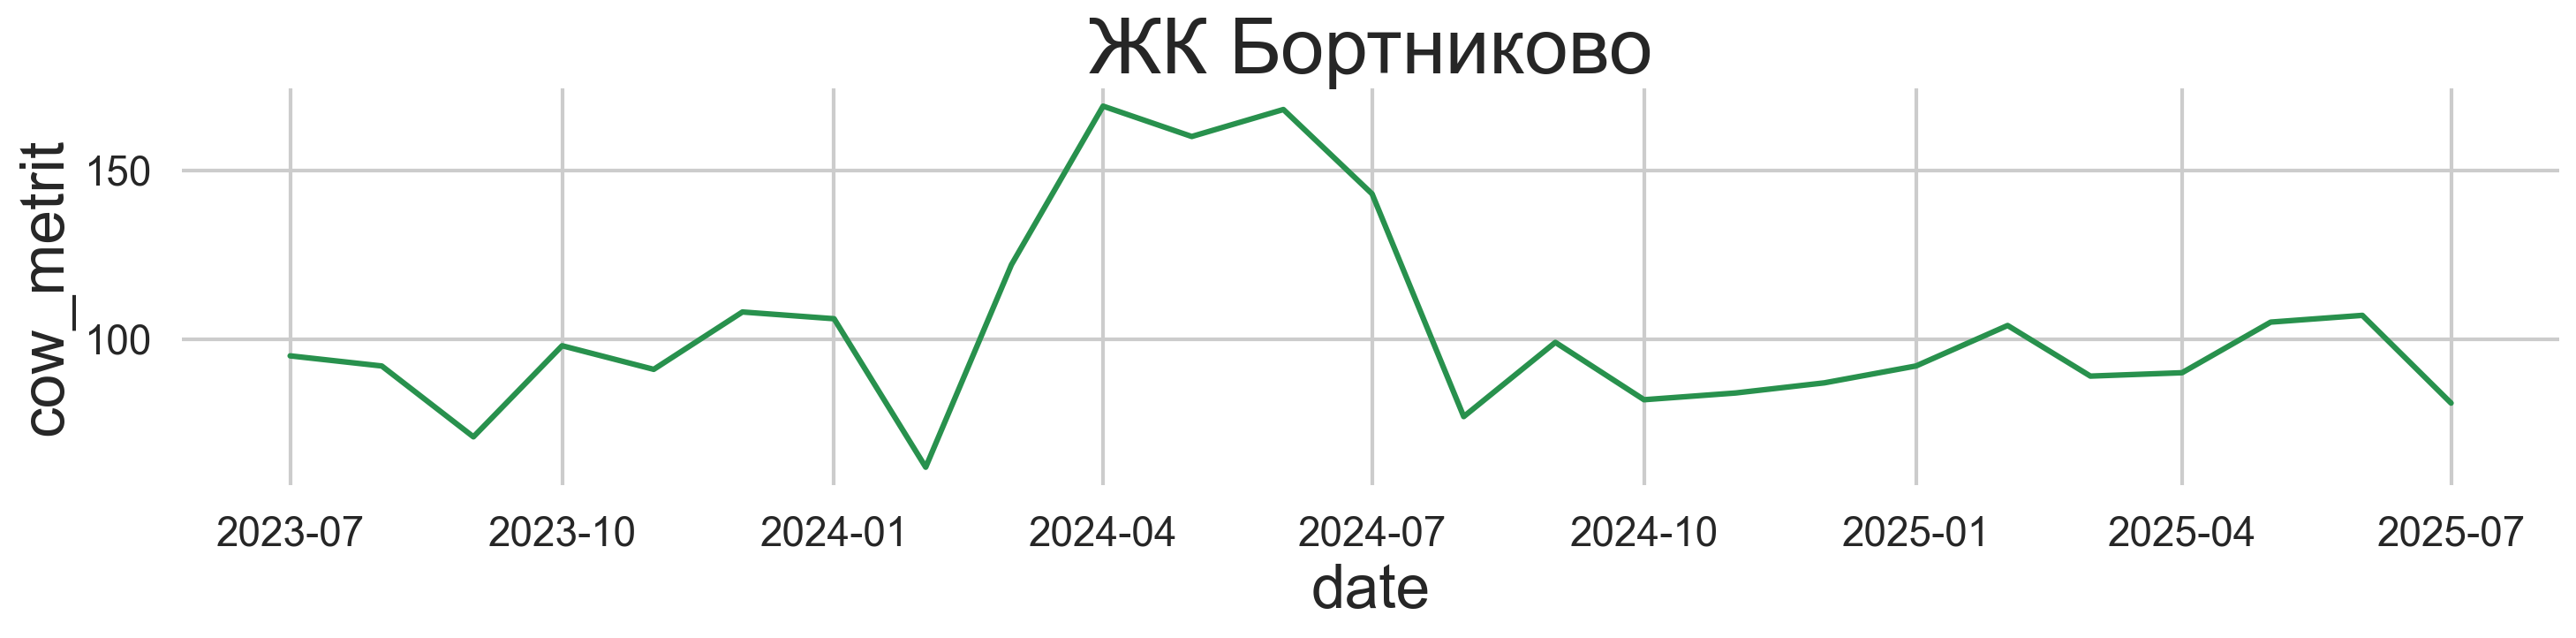

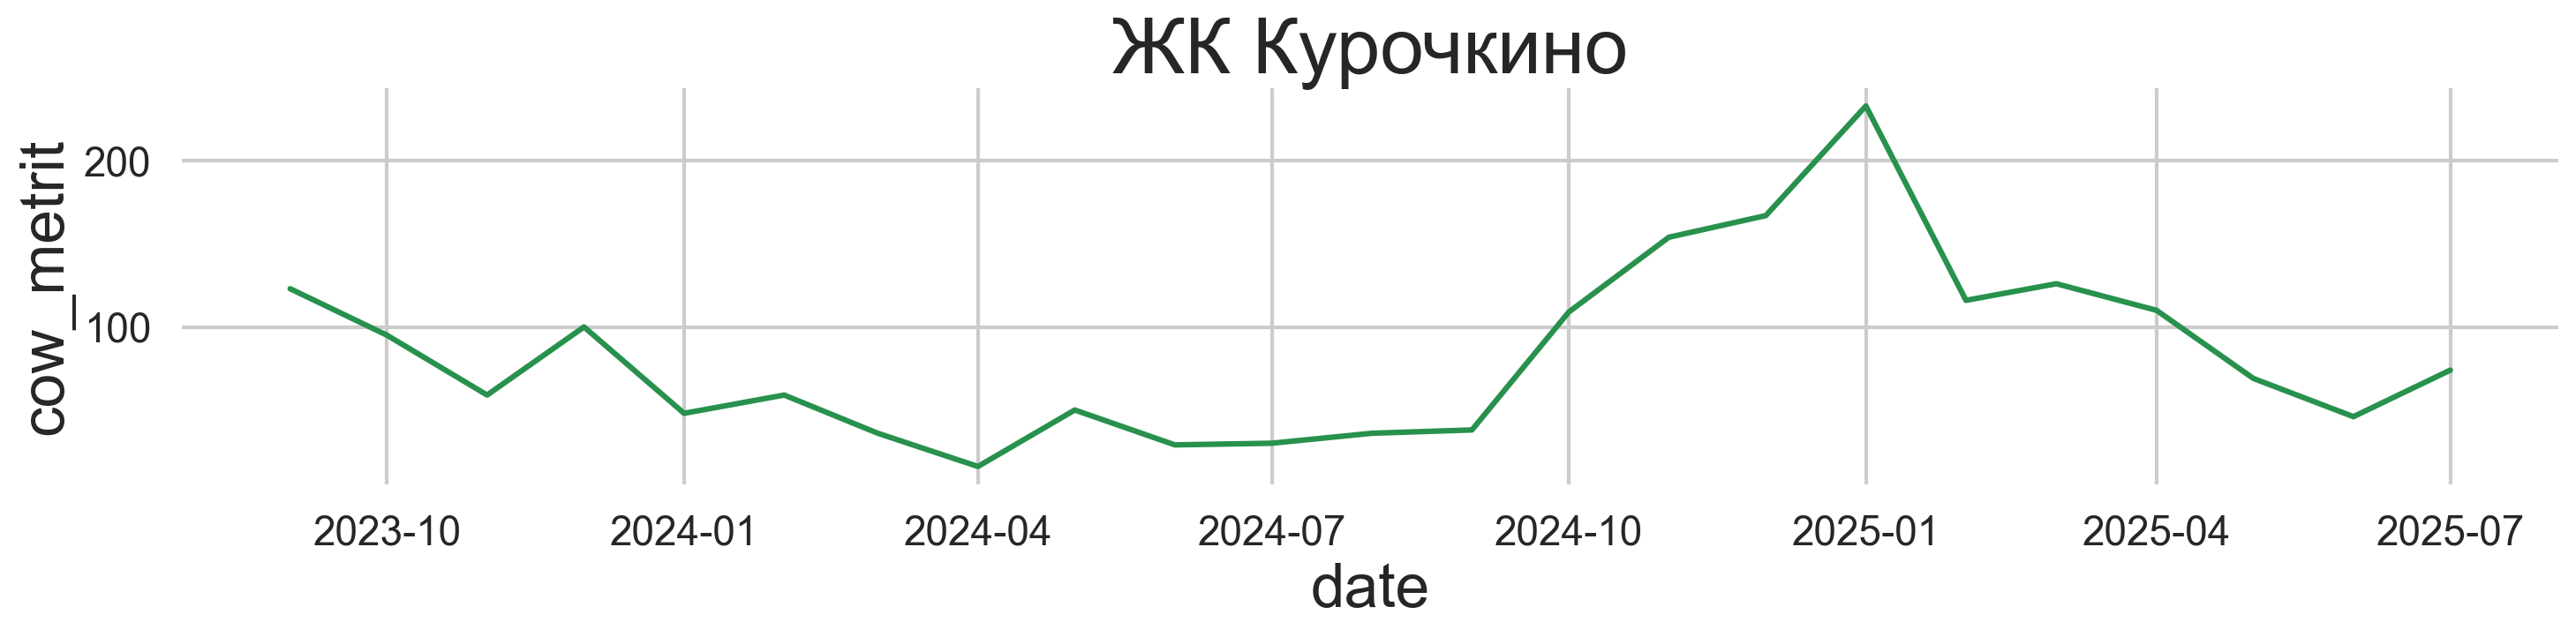

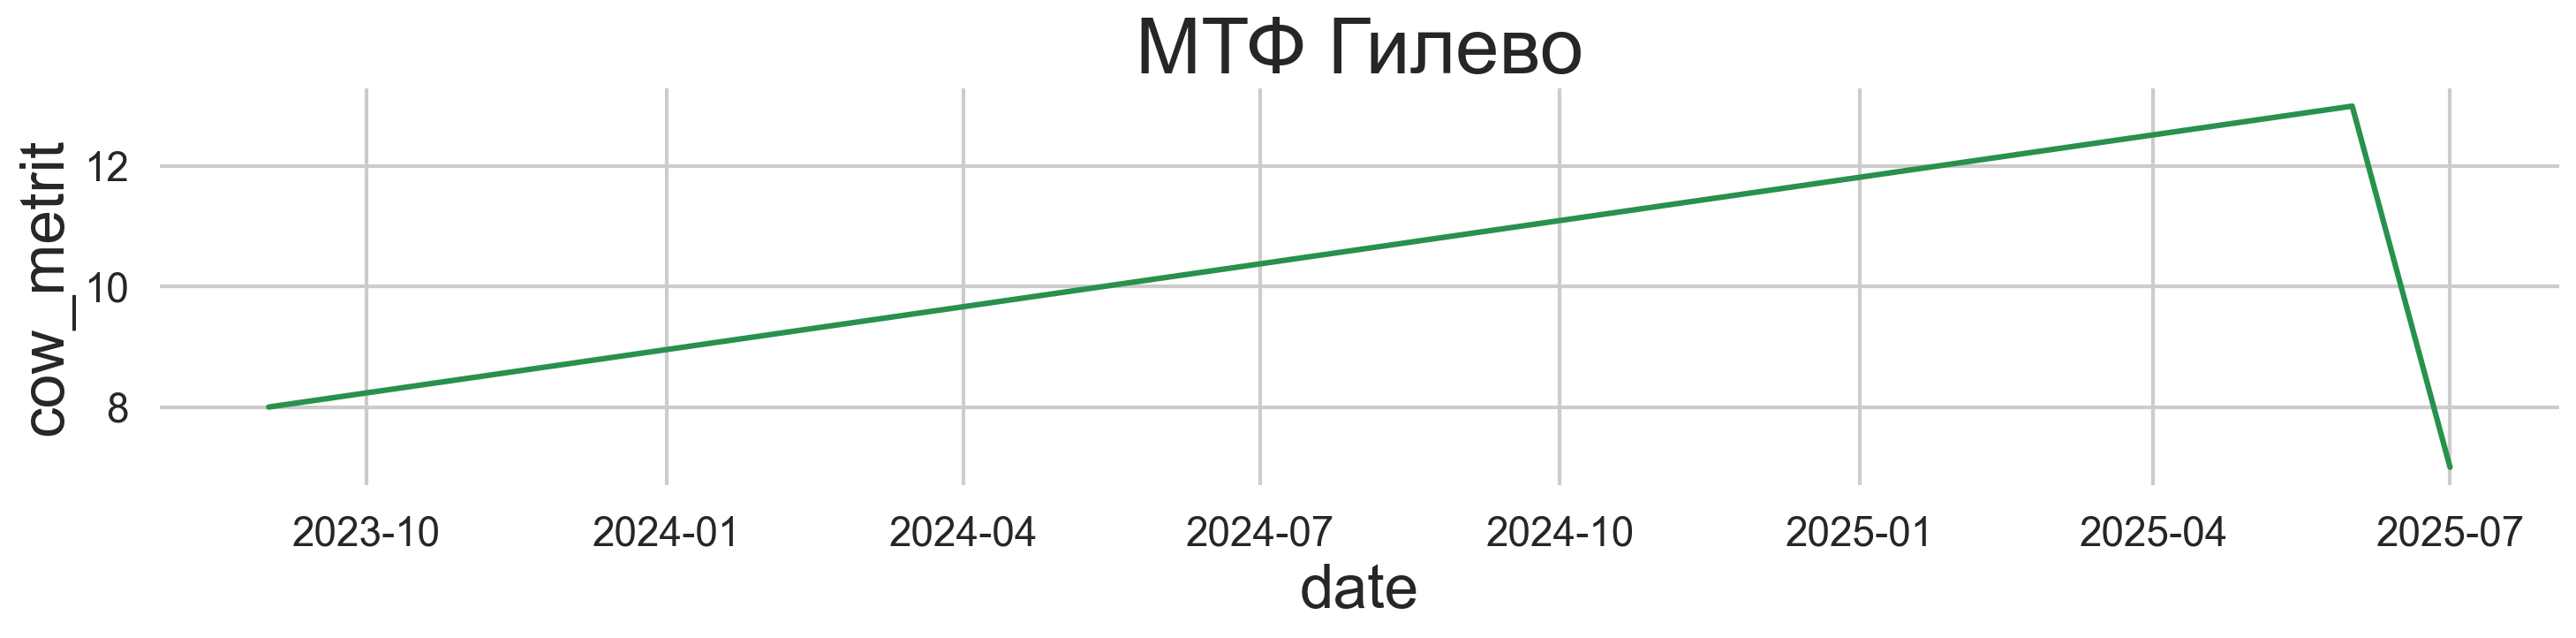

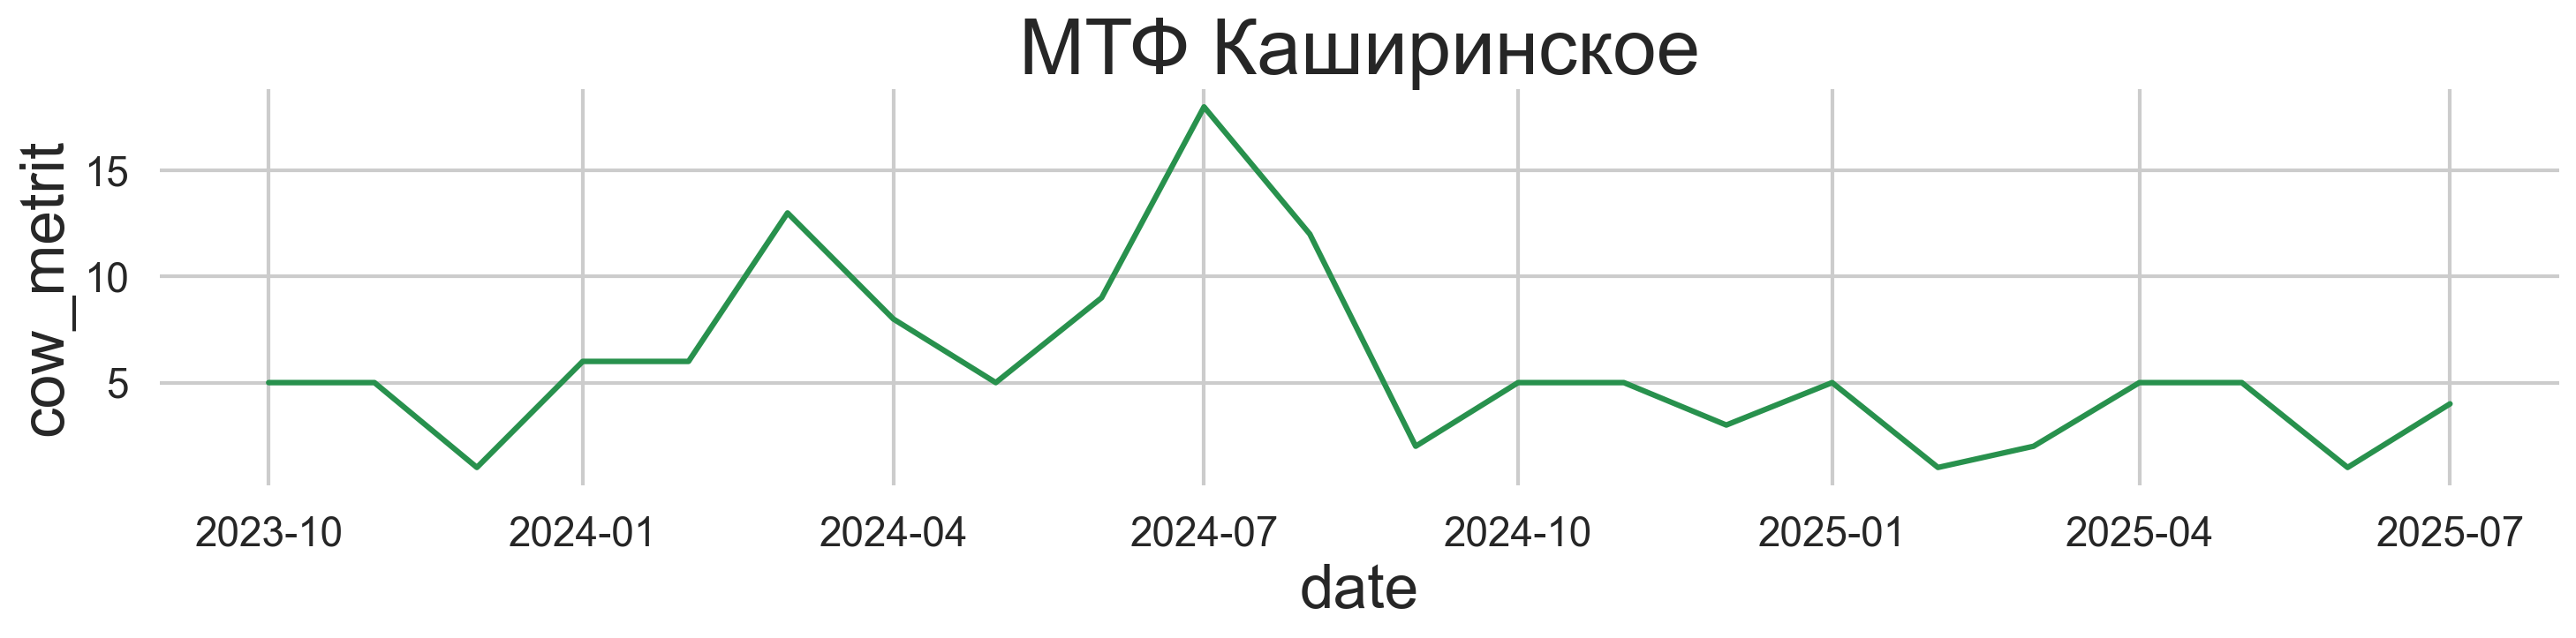

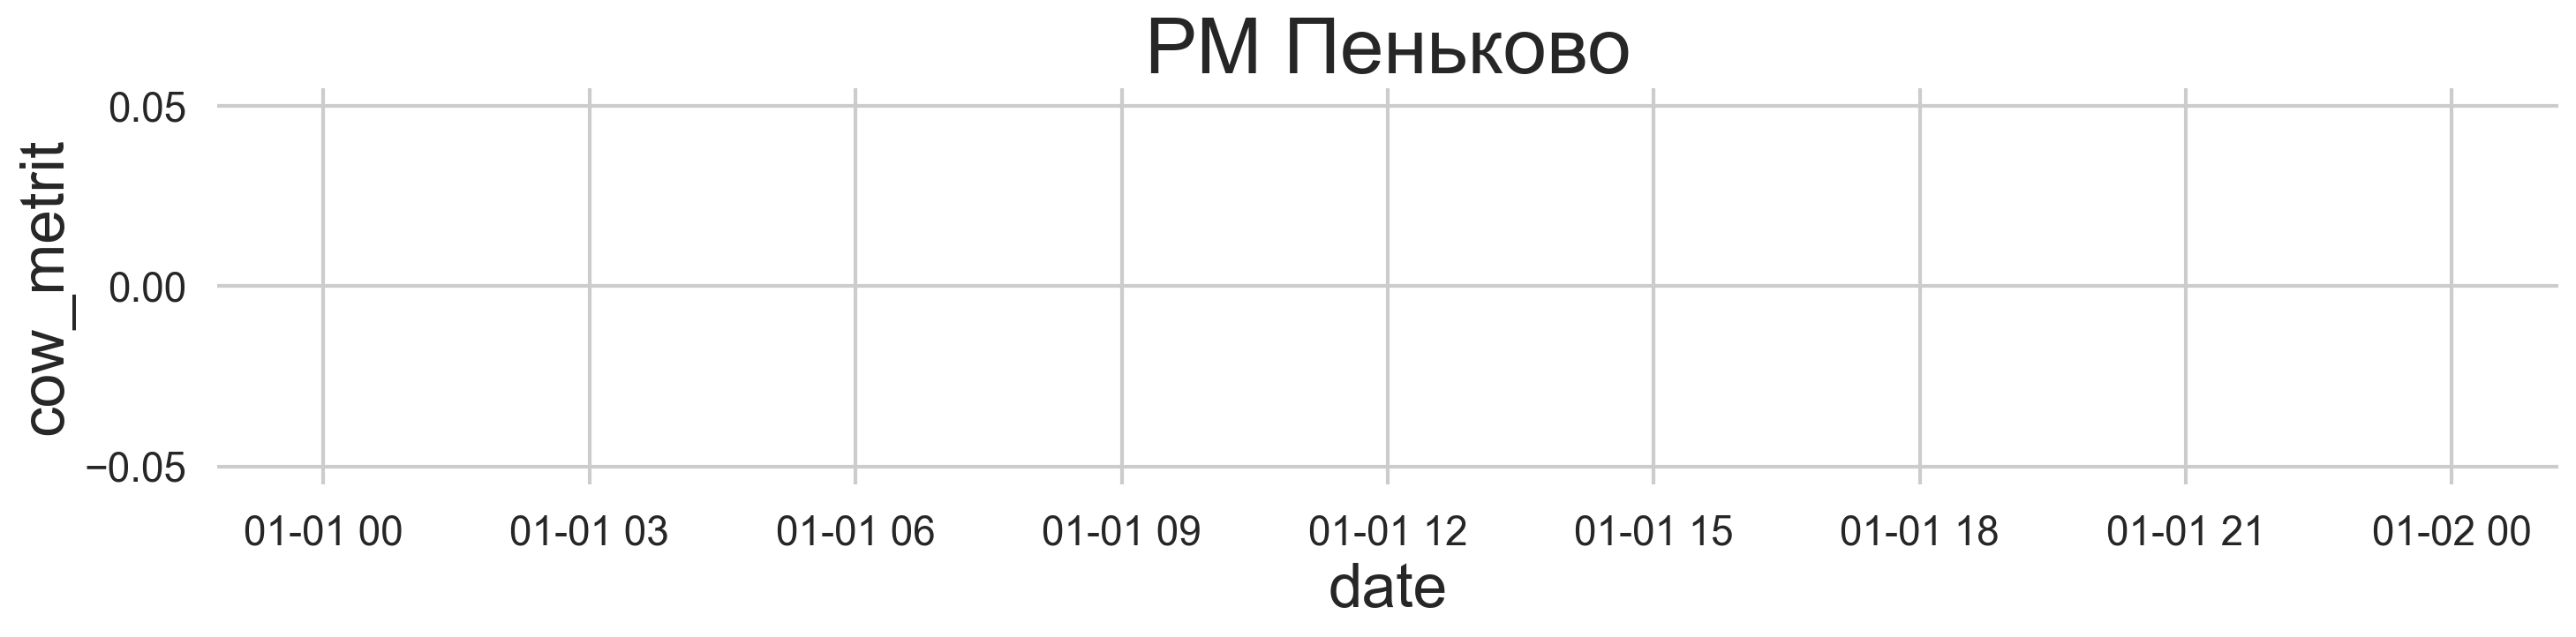

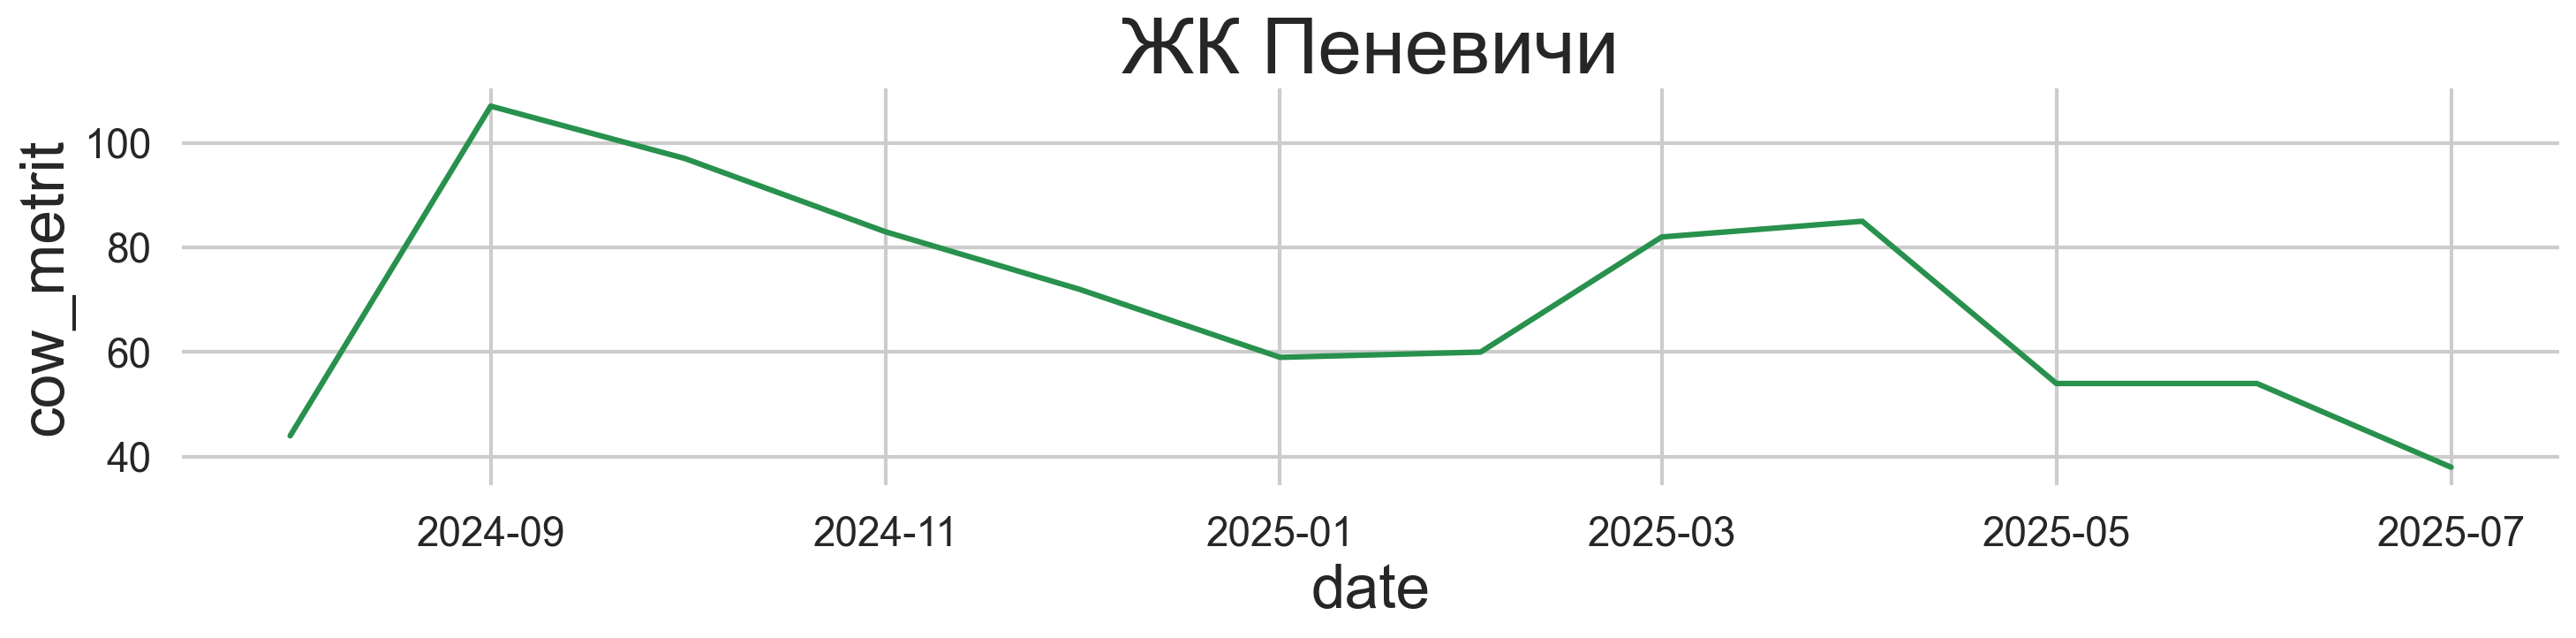

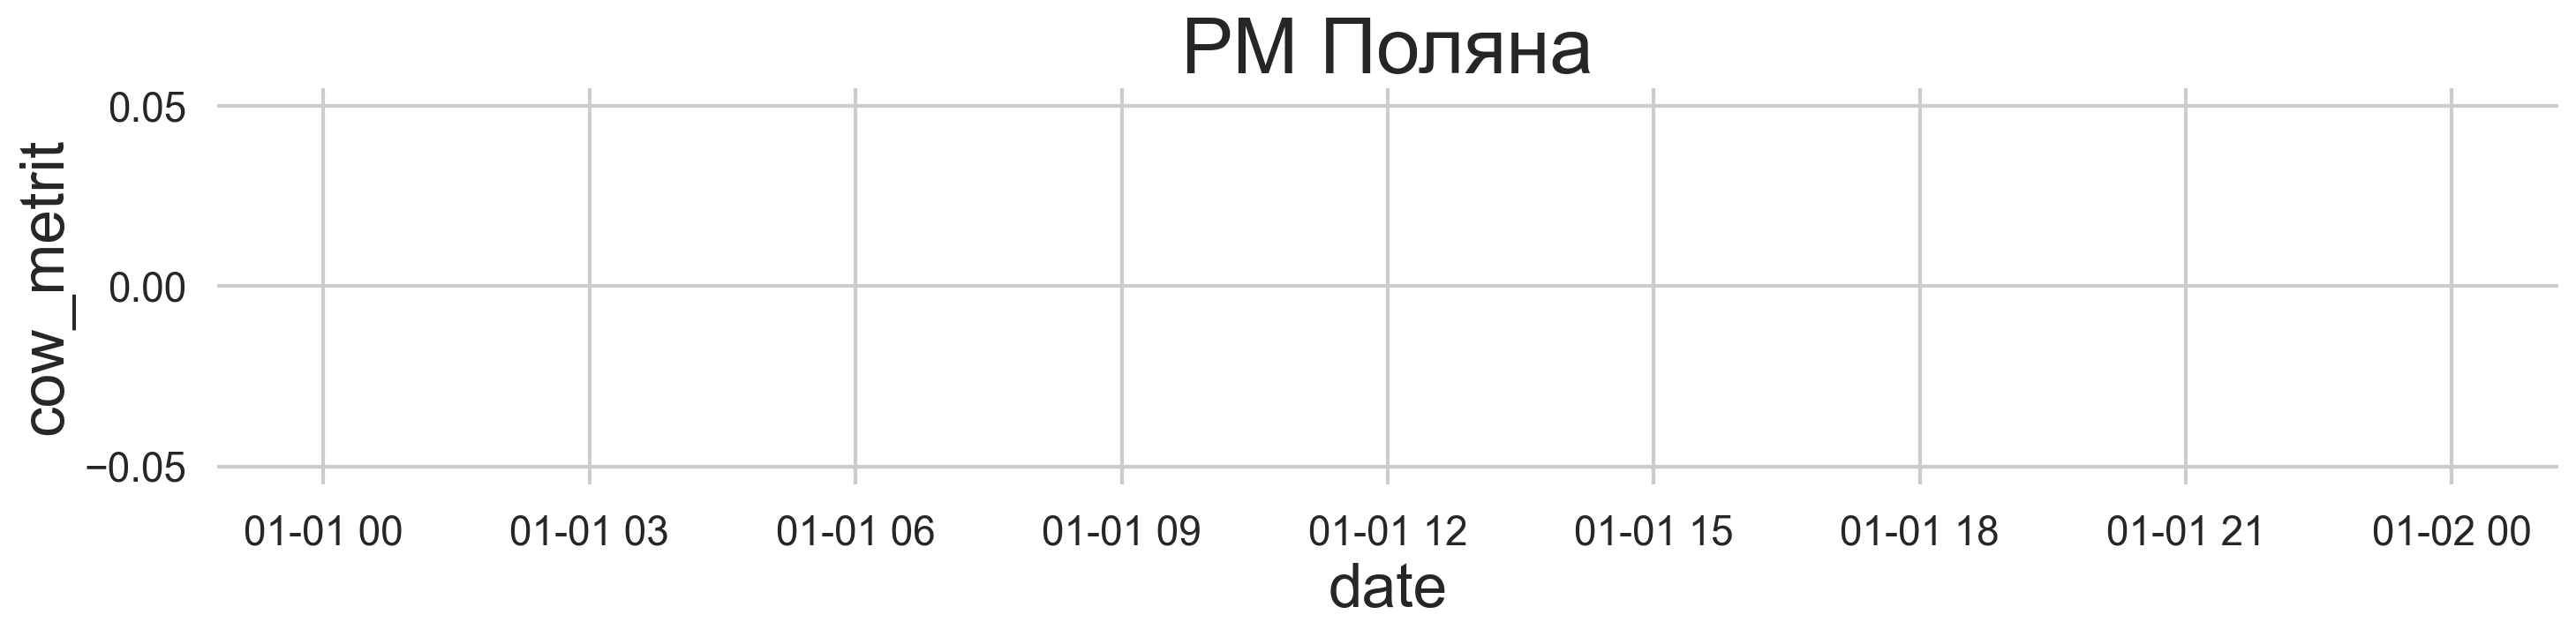

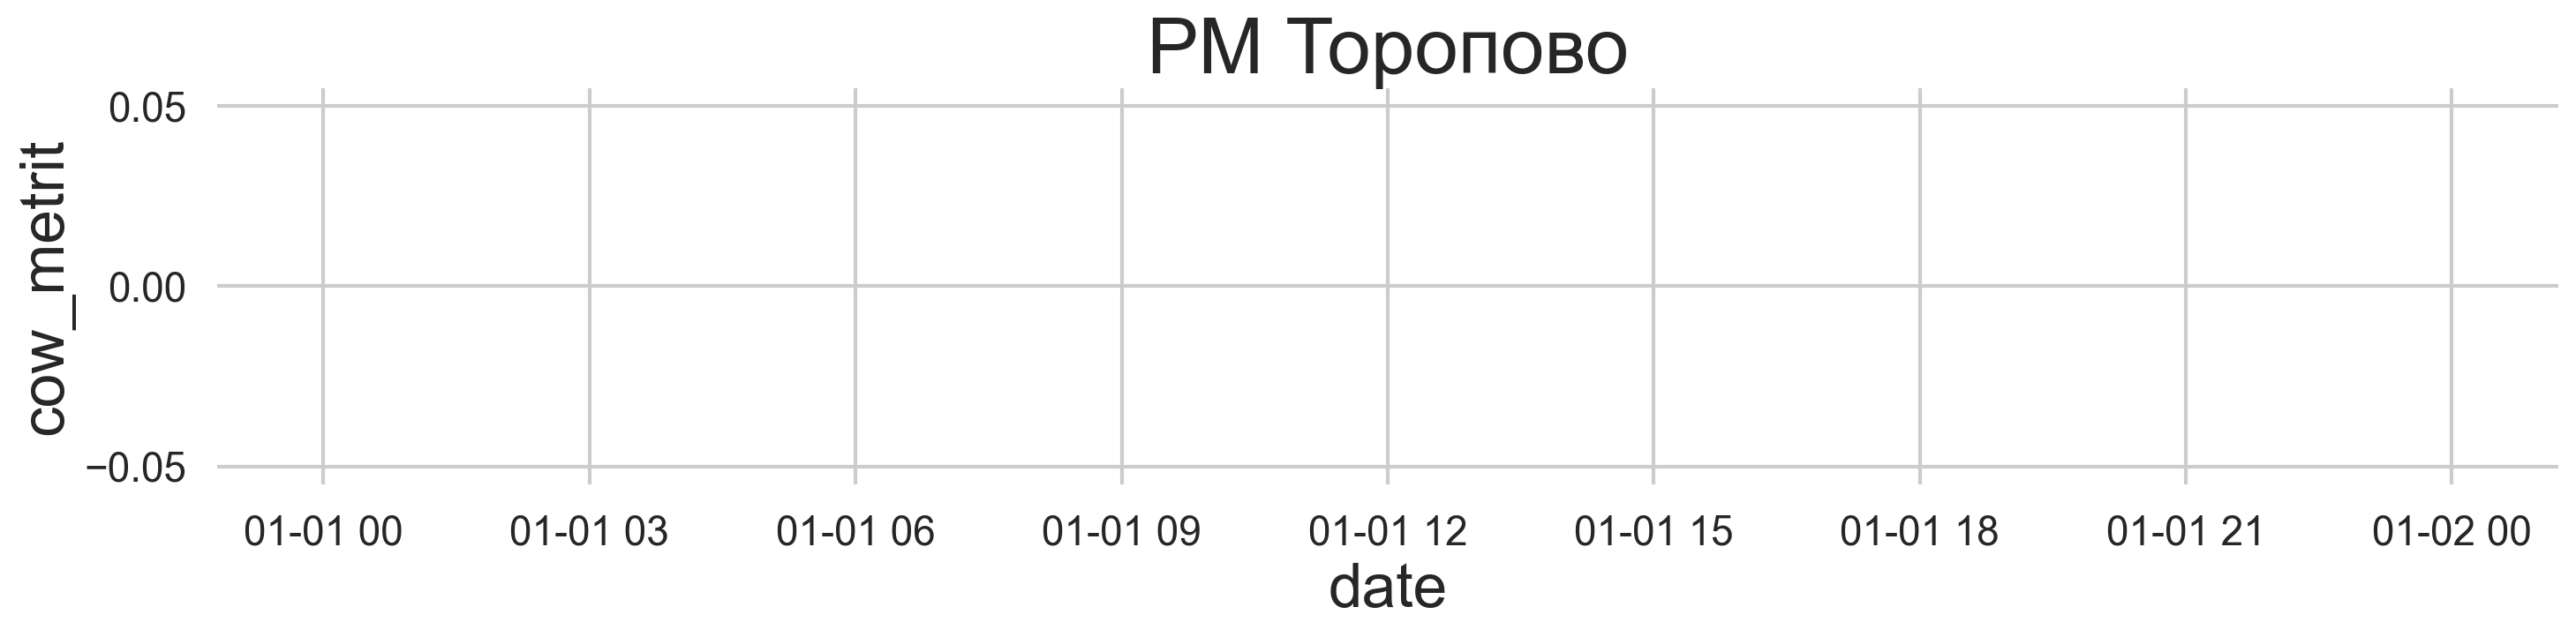

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

for farm in df["FarmName"].unique():
    sub = df[df["FarmName"] == farm]

    plt.figure(figsize=(15,4))
    sns.lineplot(data=sub, x="date", y="cow_metrit", ci=False)
    plt.title(farm)
    plt.tight_layout()
    plt.show()
